## **I. Business Problem Understanding**

#### **Context**

Sebuah perusahaan telekomunikasi ingin mengidentifikasi **pelanggan yang akan berhenti berlangganan (customer churn)**, dimana **Rata-rata churn rate tahunan** dalam industri telekomunikasi mencapai **30–35%**, yang menunjukkan potensi kerugian besar jika tidak dikelola dengan baik ([Lu, 2002](https://support.sas.com/resources/papers/proceedings/proceedings/sugi27/p114-27.pdf), [King & Rice, 2019](https://www.researchgate.net/publication/343015148_Analysis_of_Churn_in_Mobile_Telecommunications_Predicting_the_Timing_of_Customer_Churn))

Untuk itu, perusahaan perlu mengetahui pelanggan mana yang berisiko churn, agar dapat diberikan intervensi atau program retensi yang tepat. Strategi ini membantu mengurangi biaya, meningkatkan efisiensi, serta menyempurnakan kualitas layanan dan perencanaan produk. Informasi terkait data pelanggan telah tersedia di perusahaan.

Target:
- 0 : Tidak churn (tetap menjadi pelanggan)
- 1 : Churn (berhenti menjadi pelanggan)


#### **Problem Statement**

Perusahaan telekomunikasi menghadapi masalah utama terkait customer churn, di mana **biaya akuisisi untuk mendapatkan pelanggan baru dapat mencapai 5 hingga 25 kali lebih besar** dibandingkan dengan mempertahankan pelanggan yang sudah ada ([Saleh & Saha, 2023](https://www.researchgate.net/publication/370129330_Customer_Churn_Prediction_in_Telecom_Industry_Using_Machine_Learning)). Oleh karena itu, perusahaan berupaya **mengurangi biaya akuisisi** dengan meningkatkan retensi pelanggan, yaitu melalui identifikasi pelanggan yang berisiko melakukan churn agar dapat diberikan program retensi yang lebih tepat sasaran.

Namun, apabila program retensi diterapkan kepada seluruh pelanggan tanpa seleksi, maka biaya yang dikeluarkan justru akan menjadi tidak efisien karena juga mencakup pelanggan yang sudah loyal dan tidak berisiko churn.


#### **Goals**

Berdasarkan permasalahan tersebut, perusahaan ingin memiliki **kemampuan untuk memprediksi kemungkinan seorang pelanggan akan melakukan churn atau tidak**, sehingga perusahaan dapat **menghindari biaya akuisisi pelanggan baru yang sangat besar** melalui peningkatan efektivitas program retensi.

Selain itu, perusahaan juga ingin mengetahui **faktor-faktor atau variabel-variabel yang memengaruhi keputusan pelanggan untuk melakukan churn**, agar manajemen dapat menyusun strategi yang lebih tepat sasaran dalam mempertahankan pelanggan, sekaligus mengurangi kebutuhan akan akuisisi pelanggan baru.


#### **Analytic Approach**

Analisis data yang dilakukan untuk menemukan pola-pola yang membedakan pelanggan yang melakukan churn dan yang tidak (loyal).
Selanjutnya, akan dibangun model klasifikasi yang dapat membantu perusahaan memprediksi probabilitas seorang pelanggan akan melakukan churn (berhenti berlangganan) atau tidak (tetap loyal).

Oleh karena itu, proses pemodelan akan dilakukan menggunakan beberapa algoritma klasifikasi, seperti Logistic Regression, Decision Tree, K-Nearest Neighbors (KNN), Random Forest, XGBoost, dan LightGBM, guna membandingkan performa masing-masing model dan memilih yang paling optimal.


#### **Stakeholders yang terlibat**

Berikut adalah pihak-pihak yang memiliki peran penting dalam keberhasilan implementasi model prediksi churn pelanggan:

| **Stakeholder**                | **Peran dan Kepentingan**                                                                                     |
|--------------------------------|----------------------------------------------------------------------------------------------------------------|
| **Manajemen Eksekutif**        | Mengambil keputusan strategis berbasis data churn, seperti alokasi anggaran retensi atau pengembangan produk. |
| **Tim Pemasaran**              | Menggunakan hasil prediksi untuk membuat program retensi yang lebih terarah kepada pelanggan berisiko.        |


#### **Metric Evaluation**

<img src='MatrixChurn.png'>

- **True Positive (TP)** : Model memprediksi customer akan churn dan memang benar churn

- **True Negative (TN)** : Model memprediksi customer tidak akan churn dan memang tidak churn

- **Type 1 error (False Positive/FP)** : Model memprediksi customer akan churn, padahal sebenarnya tidak churn.
  - Konsekuensi : Perusahaan mengalokasikan biaya retensi (diskon, promo, insentif) kepada customer yang sebenarnya loyal. Ini menyebabkan pemborosan biaya karena strategi retensi diterapkan pada customer yang tetap akan bertahan tanpa insentif.

- **Type 2 error (False Negative/FN)** : Model memprediksi customer tidak akan churn, padahal sebenarnya churn
  - Konsekuensi : Customer yang benar-benar akan churn tidak mendapatkan perhatian atau intervensi, sehingga:
     - Customer benar-benar pergi tanpa upaya pencegahan.
     - Perusahaan kehilangan pendapatan dan harus mengeluarkan biaya akuisisi yang lebih besar untuk mencari customer baru.

Berdasarkan konsekuensinya, sebisa mungkin model yang dibangun harus dapat mengurangi biaya akuisisi (untuk mendapatkan pelanggan baru) perusahaan, namun tanpa mengorbankan jumlah pelanggan loyal yang ingin dipertahankan. Oleh karena itu, metric evaluation yang akan digunakan adalah Recall sebagai metric utama.



## **II. Data Understanding**

In [2]:
# Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data splitting
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Data Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from category_encoders import OrdinalEncoder, BinaryEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer

# ML algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Voting and Stacking
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Evaluation
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

In [3]:
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


In [4]:
#Load Dataset
print("Files in dataset directory:", os.listdir(path))
df = pd.read_csv(f"{path}/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

Files in dataset directory: ['WA_Fn-UseC_-Telco-Customer-Churn.csv']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


| Kolom              | Deskripsi                                                | Tipe Data Awal | Tipe Data Seharusnya |
| ------------------ | -------------------------------------------------------- | -------------- | -------------------- |
| `customerID`       | ID unik tiap pelanggan                                   | `object`       | `object` (string)    |
| `gender`           | Jenis kelamin pelanggan (`Male` / `Female`)              | `object`       | `category`           |
| `SeniorCitizen`    | Apakah pelanggan adalah warga senior (1 = ya, 0 = tidak) | `int64`        | **category**         |
| `Partner`          | Apakah pelanggan memiliki pasangan                       | `object`       | `category`           |
| `Dependents`       | Apakah pelanggan memiliki tanggungan                     | `object`       | `category`           |
| `tenure`           | Lama berlangganan (dalam bulan)                          | `int64`        | `int64`              |
| `PhoneService`     | Apakah pelanggan berlangganan layanan telepon            | `object`       | `category`           |
| `MultipleLines`    | Apakah pelanggan memiliki lebih dari satu jalur telepon  | `object`       | `category`           |
| `InternetService`  | Jenis layanan internet                                   | `object`       | `category`           |
| `OnlineSecurity`   | Layanan keamanan online                                  | `object`       | `category`           |
| `OnlineBackup`     | Layanan pencadangan online                               | `object`       | `category`           |
| `DeviceProtection` | Proteksi perangkat                                       | `object`       | `category`           |
| `TechSupport`      | Dukungan teknis                                          | `object`       | `category`           |
| `StreamingTV`      | Layanan streaming TV                                     | `object`       | `category`           |
| `StreamingMovies`  | Layanan streaming film                                   | `object`       | `category`           |
| `Contract`         | Jenis kontrak                                            | `object`       | `category`           |
| `PaperlessBilling` | Apakah pelanggan menggunakan tagihan tanpa kertas        | `object`       | `category`           |
| `PaymentMethod`    | Metode pembayaran                                        | `object`       | `category`           |
| `MonthlyCharges`   | Biaya bulanan                                            | `float64`      | `float64`            |
| `TotalCharges`     | Total biaya yang telah dibayarkan                        | `object`       | **float64**          |
| `Churn`            | Status churn                                             | `object`       | `category`           |


In [5]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### **Summary Dataset**

- Dataset terdiri dari **7.043 baris** dan **21 kolom fitur**.
- Terdapat **3 fitur numerik**:
  - `SeniorCitizen` (biner: 0 atau 1) -> akan diubah tipe data menjadi category pada data cleaning
  - `tenure` (lama berlangganan dalam bulan)
  - `MonthlyCharges` (jumlah tagihan bulanan pelanggan ($))
- Fitur `TotalCharges` bertipe *object*, meskipun semestinya numerik — akan dipastikan pada tahap data cleaning apakah ada nilai kosong atau non-numerik sebelum dikonversi.
- **18 fitur lainnya bertipe kategorik**, termasuk:
  - Identitas pelanggan: `customerID`
  - Informasi pribadi: `gender`, `Partner`, `Dependents`
  - Layanan yang digunakan: `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`
  - Informasi kontrak: `Contract`, `PaperlessBilling`, `PaymentMethod`
  - Target variabel: `Churn` (apakah pelanggan berhenti atau tidak)
- Dataset **didominasi oleh data kategorikal**, yang penting untuk dilakukan encoding sebelum proses pemodelan.
- Tidak terdapat **missing value** berdasarkan output `info()` — namun validasi akan dilakukan pada tahap data cleaning.

In [6]:
# Daftar kolom yang akan diubah ke tipe kategori
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Ubah kolom menjadi tipe data category
df[categorical_columns] = df[categorical_columns].astype('category')

# Ubah nilai pada kolom SeniorCitizen: 0 → 'No', 1 → 'Yes'
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'}).astype('category')


In [7]:
# Cek data setelah diubah tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

> - Terkait fitur/variabel yang **tipe data sebelumnya object** seperti 'gender', 'Partner', 'Dependents', 
'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
telah dilakukan perubahan menjadi tipe data **category**
> - Untuk fitur SeniorCitizen tipe datanya adalah Integer diubah menjadi Category

In [8]:
df.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


#### **Pengecekan Data Balance/Imbalance**

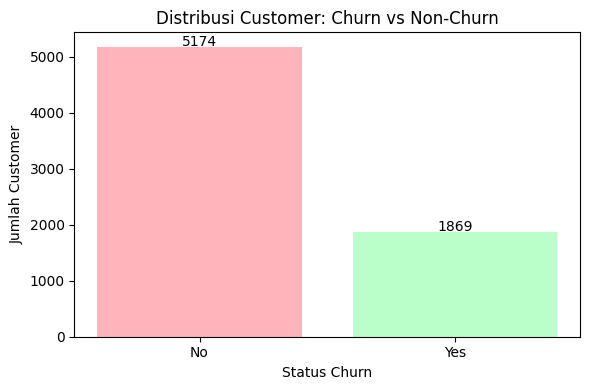

Jumlah customer Churn (Berhenti): 1869
Jumlah customer non Churn (Loyal): 5174
Persentase Churn: 26.54 %
Persentase non Churn: 73.46 %


C:\Users\User\AppData\Local\Temp\ipykernel_15288\1638043821.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yes = df[df['Churn'] == 'Yes'].count()[1]
C:\Users\User\AppData\Local\Temp\ipykernel_15288\1638043821.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  no = df[df['Churn'] == 'No'].count()[1]


In [9]:
# Hitung jumlah churn dan non-churn
churn_counts = df['Churn'].value_counts()

# Plot barchart dengan warna pastel
plt.figure(figsize=(6, 4))
plt.bar(churn_counts.index, churn_counts.values, color=['#ffb3ba', '#baffc9'])  # pastel pink & green
plt.title('Distribusi Customer: Churn vs Non-Churn')
plt.xlabel('Status Churn')
plt.ylabel('Jumlah Customer')

# Tambahkan label di atas bar
for i, val in enumerate(churn_counts.values):
    plt.text(i, val + 10, str(val), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Check Data Balance / Imbalance
yes = df[df['Churn'] == 'Yes'].count()[1]
print('Jumlah customer Churn (Berhenti):', yes)

no = df[df['Churn'] == 'No'].count()[1]
print('Jumlah customer non Churn (Loyal):', no)

# Cek persentase Churn yes dan no 
print('Persentase Churn:', round(yes / (yes + no) * 100, 2), '%')
print('Persentase non Churn:', round(no / (yes + no) * 100, 2), '%')

> Berdasarkan hasil analisis di atas, dapat disimpulkan bahwa **dataset bersifat imbalanced**, di mana proporsi kelas positif (customer yang churn atau berhenti) hanya sebesar 26.54%, sedangkan proporsi kelas negatif (customer yang non-churn atau loyal) mencapai 73.46%. Ketidakseimbangan ini menunjukkan bahwa jumlah customer yang tetap loyal jauh lebih besar dibandingkan dengan yang berhenti, sehingga perlu diperhatikan dalam pemodelan agar tidak terjadi bias terhadap kelas mayoritas.

## **III. Data Cleaning**

In [10]:
# Check unique in each variable
pd.set_option('display.max_colwidth', None)

item = []
for col in df.columns:
    unique_values = df[col].drop_duplicates()
    sample_size = min(5, len(unique_values))  # ambil maksimal 5 atau kurang jika tidak cukup
    sample_values = list(unique_values.sample(sample_size, replace=False).values)
    
    item.append([
        col,
        df[col].dtype,
        df[col].isna().sum(),
        round((df[col].isna().sum() / len(df)) * 100, 2),
        df[col].nunique(),
        sample_values
    ])

table_unique = pd.DataFrame(
    columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
    data=item
)

table_unique

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,customerID,object,0,0.0,7043,"[3643-AHCFP, 2988-QRAJY, 9917-KWRBE, 9469-WEJBT, 5474-LAMUQ]"
1,gender,category,0,0.0,2,"[Female, Male]"
2,SeniorCitizen,category,0,0.0,2,"[No, Yes]"
3,Partner,category,0,0.0,2,"[Yes, No]"
4,Dependents,category,0,0.0,2,"[No, Yes]"
5,tenure,int64,0,0.0,73,"[27, 43, 25, 31, 21]"
6,PhoneService,category,0,0.0,2,"[Yes, No]"
7,MultipleLines,category,0,0.0,3,"[Yes, No, No phone service]"
8,InternetService,category,0,0.0,3,"[DSL, Fiber optic, No]"
9,OnlineSecurity,category,0,0.0,3,"[Yes, No, No internet service]"


In [11]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,2,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,No,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,5901,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,NaN,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


#### **1. Pengecekan Data Duplikat**

In [12]:
print('Jumlah data yang memiliki duplikat:', df.duplicated().sum())

Jumlah data yang memiliki duplikat: 0


#### **2. Pengecekan Missing Values**

In [13]:
# null values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

> Tidak ada missing values pada dataset

#### **3. Pengecekan Tipe Data dan Invalid Data**

- **Pengecekan dan Handling Data pada Variable Tenure**

In [14]:
# Melihat Nilai Unique pada Tenure
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [15]:
# Menampilkan jumlah pelanggan yg memiliki tenure = 0
print((df['tenure'] == 0).sum())

11


Ditemukan 11 baris data dengan `tenure = 0`, yang dapat diinterpretasikan sebagai berikut:

1. `tenure = 0` menunjukkan bahwa pelanggan **baru saja mendaftar** (belum genap sebulan berlangganan).
2. Namun, jika `MonthlyCharges` sudah terisi, maka sistem kemungkinan telah **menetapkan biaya langganan**, walaupun pelanggan belum menyelesaikan bulan pertamanya.

Untuk memperkuat interpretasi tersebut, kita analisis beberapa variabel pendukung yaitu 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod'

In [16]:
# Menampilkan jumlah pelanggan yg memiliki tenure = 0
print((df['TotalCharges'] == 0).sum())

0


In [17]:
# Analisis beberapa variable pendukung
df[df['tenure'] == 0][['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod']]


,tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod
488,0,52.55,,Two year,Bank transfer (automatic)
753,0,20.25,,Two year,Mailed check
936,0,80.85,,Two year,Mailed check
1082,0,25.75,,Two year,Mailed check
1340,0,56.05,,Two year,Credit card (automatic)
3331,0,19.85,,Two year,Mailed check
3826,0,25.35,,Two year,Mailed check
4380,0,20.00,,Two year,Mailed check
5218,0,19.70,,One year,Mailed check
6670,0,73.35,,Two year,Mailed check


Ditemukan terdapat total charges yang bersisi spasi, maka perlu di analisis lebih mendalam.

In [18]:
# Analisis beberapa variable pendukung
df[df['TotalCharges'] == ' '][['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod']]

,tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod
488,0,52.55,,Two year,Bank transfer (automatic)
753,0,20.25,,Two year,Mailed check
936,0,80.85,,Two year,Mailed check
1082,0,25.75,,Two year,Mailed check
1340,0,56.05,,Two year,Credit card (automatic)
3331,0,19.85,,Two year,Mailed check
3826,0,25.35,,Two year,Mailed check
4380,0,20.00,,Two year,Mailed check
5218,0,19.70,,One year,Mailed check
6670,0,73.35,,Two year,Mailed check


Kesimpulan

Pelanggan dengan `tenure = 0` kemungkinan merupakan:
1. **Pelanggan baru** yang telah mendaftar dan melakukan pembayaran pertama.
2. Data `tenure` mungkin belum terbarui karena siklus tagihan pertama belum selesai.
3. Pada Tenure `0` diketahui TotalCharges berisis `spasi` sehingga pelanggan Totalcharges yang berisi spasi memiliki Tenure 0

Dalam konteks analisis **churn**, pelanggan dengan `tenure = 0` **belum memiliki riwayat perilaku yang cukup untuk dianalisis secara bermakna**.  
Karena jumlahnya hanya **11 pelanggan**, mereka akan **dikeluarkan dari analisis** guna menghasilkan model yang lebih representatif dan akurat.

In [19]:
# Menghapus 11 pelanggan yg memiliki tenure = 0
df = df[df['tenure'] != 0].copy()

In [20]:
# Menampilkan jumlah baris sesudah dihapus
df.shape

(7032, 21)

> Dataset awal terdiri dari 7043 baris, setelah 11 pelanggan dgn tenure 0 dihapus, maka saat ini berjumlah 7032 baris

- **Pengecekan dan Handling Data pada Variable TotalCharge**

Pada info dataset, untuk kolom TotalCharge seharusnya merupakan numerik berupa data float

In [21]:
# Menampilkan Nama Kolom
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
# Menampilkan tipe data TotalCharge
df['TotalCharges'].dtype

dtype('O')

Berarti kolom TotalCharges tidak berupa angka murni dan harus dikonversi dulu agar bisa dianalisis secara numerik.

In [23]:
# Ubah tipe data TotalCharges ke float, aman dari error string kosong
# errors='coerce': akan mengubah data yang tidak bisa dikonversi menjadi NaN (daripada error).
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [24]:
# Menampilkan tipe data TotalCharge setelah diconversi menjadi Numerik
df['TotalCharges'].dtype

dtype('float64')

In [25]:
# Menampilkan data TotalCharge
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [26]:
# Pencekan ulang null values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

> Tidak terdapat missing values pada TotalCharges

#### **5. Pengecekan Outliers**

In [27]:
# Pengecekan Distribusi Data pada Variable Numerik
kolom_numerik = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Melihat statistika deskriptive untuk variable numerik
df[kolom_numerik].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


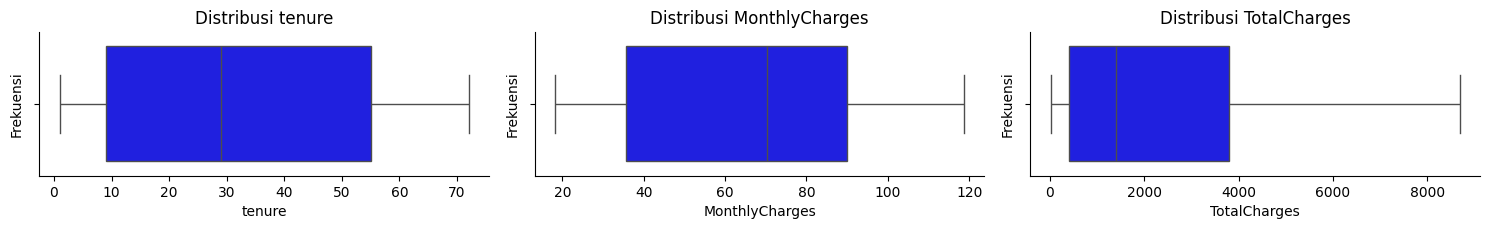

In [28]:
# Pengecekan Outliers
plt.figure(figsize=(15,6))
for i in range(len(kolom_numerik)) :
    plt.subplot(3,3,1+i)
    sns.boxplot(df[kolom_numerik[i]], orient='h', color='blue')
    sns.despine()
    plt.title(f'Distribusi {kolom_numerik[i]}')
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

In [29]:
# Pengecekan Outliers
for i in range(len(kolom_numerik)) :
    Q3 = df[kolom_numerik[i]].quantile(0.75)
    Q1 = df[kolom_numerik[i]].quantile(0.25)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    min_data = df[kolom_numerik[i]].min()
    max_data = df[kolom_numerik[i]].max()
    n_outlier = len(df[df[kolom_numerik[i]]>upper_bound]) + len(df[df[kolom_numerik[i]]<lower_bound])
    print(f'{i+1}.  Kolom : {kolom_numerik[i]}')
    print(f'    Jumlah Outlier = {n_outlier}')
    print(f'    Upper bound = {upper_bound:.2f} dan',f'Lower bound = {lower_bound:.2f}')

1.  Kolom : tenure
    Jumlah Outlier = 0
    Upper bound = 124.00 dan Lower bound = -60.00
2.  Kolom : MonthlyCharges
    Jumlah Outlier = 0
    Upper bound = 171.27 dan Lower bound = -45.82
3.  Kolom : TotalCharges
    Jumlah Outlier = 0
    Upper bound = 8884.67 dan Lower bound = -4688.48


SUMMARY

Berdasarkan hasil analisis boxplot terhadap ketiga variabel numerik `(tenure, MonthlyCharges, dan TotalCharges)`, **tidak ditemukan nilai yang berada di luar batas bawah dan batas atas (outlier)**. Nilai-nilai pada masing-masing variabel masih berada dalam **rentang yang wajar**, sehingga tidak diperlukan penanganan lanjutan terhadap outlier untuk data ini.

#### **6. Pengecekan Features** 
- MultipleLines

- OnlineSecurity

- OnlineBackup

- DeviceProtection

- TechSupport

- StreamingTV

- StreamingMovies

Pada fiture tersebut value pada setiap kolom bukan hanya terdapat `Yes` dan `No` tetapi terdapat value lain seperti `No Phone Service` dan `No Internet Service`, mari kita analisis perkolom apa hal tersebut relevan saat melakukan intrepertasi data, jika tidak mari kita ubah data menjadi hanya 2 value saja yaitu `Yes` dan `No`

##### **MultipleLines**

In [30]:
df['MultipleLines'].unique()

['No phone service', 'No', 'Yes']
Categories (3, object): ['No', 'No phone service', 'Yes']

Dalam konteks data telekomunikasi, untuk kolom dengan nilai:

```
[No phone service, Yes, No]
```

* **"No phone service"** secara eksplisit berarti pelanggan **tidak memiliki layanan telepon sama sekali**.
* Sementara **"No"** biasanya berarti **pelanggan memiliki layanan telepon, tapi tidak menggunakan fitur tertentu** (misalnya, tidak menggunakan layanan multi-line).
* **"Yes"** berarti fitur tersebut **digunakan**.

**Apakah "No phone service" bisa diganti dengan "No"?**

**Jawaban: Tidak.**
Mengganti "No phone service" menjadi "No" akan **mengaburkan makna sebenarnya** dan menyebabkan **loss of information**.

Kenapa tidak perlu diubah?

* Karena "No phone service" dan "No" mengandung **informasi yang berbeda**.
* Jika diubah ke "No", Anda menyamakan pelanggan **yang tidak punya layanan sama sekali** dengan pelanggan yang punya layanan tetapi **tidak mengaktifkan fitur tertentu**.
* Dalam analisis (misalnya prediksi churn), perbedaan ini bisa signifikan.

**Kesimpulan:**
**"No phone service" relevan dan sebaiknya tidak diganti menjadi "No"**, karena memiliki makna berbeda yang penting untuk analisis data dan model machine learning.

---


##### **OnlineSecurity**

In [31]:
df['OnlineSecurity'].unique()

['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

Dalam konteks kolom **`OnlineSecurity`** dengan nilai:

```
[No internet service, Yes, No]
```
*Mengganti "No internet service" menjadi "No" – Disarankan tidak perlu?**

Karena:

* **"No internet service" ≠ "No"**

  * "No" = tidak memakai OnlineSecurity **meskipun bisa.**
  * "No internet service" = **tidak bisa memakai** OnlineSecurity karena **tidak ada layanan internet.**
* Mengganti "No internet service" menjadi "No" akan menyebabkan **kehilangan konteks penting** yang mungkin **mempengaruhi hasil analisis atau model prediksi**.
* Misalnya, untuk prediksi churn, pelanggan tanpa internet mungkin memiliki perilaku berbeda dari pelanggan dengan internet tapi tidak pakai OnlineSecurity.

Kesimpulan:

**"No internet service" sangat relevan** dan **disarankan tidak diganti menjadi "No"**, karena:

* Memiliki **makna yang berbeda**.
* Memberikan **informasi penting** tentang akses pelanggan terhadap fitur digital.
* Membantu model prediktif membedakan perilaku berdasarkan ketersediaan layanan internet.
---


##### **TechSupport**

In [32]:
df['TechSupport'].unique()

['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

pada kolom **`TechSupport`** dengan nilai:

```
[No internet service, Yes, No]
```

Mari kita bahas secara spesifik apakah nilai **"No internet service"** ini **relevan**, dan **kenapa tidak boleh diganti menjadi "No"**.

---
**Kenapa Tidak Boleh Ubah "No internet service" Menjadi "No"?**

Karena:

* **Maknanya sangat berbeda**:

  * **"No"** → pelanggan **punya internet**, tapi **memilih tidak menggunakan** TechSupport.
  * **"No internet service"** → pelanggan **tidak punya internet sama sekali**, jadi **tidak mungkin** pakai TechSupport.
* Menggabungkannya akan menyebabkan **hilangnya informasi penting** tentang ketersediaan layanan.
* Dalam **machine learning** atau **analisis churn**, pelanggan tanpa internet mungkin punya perilaku yang berbeda (misalnya: lebih kecil kemungkinan churn karena sudah sangat terbatas dalam layanan).

Kesimpulan:

> **"No internet service" pada kolom `TechSupport` adalah nilai yang relevan dan TIDAK boleh disamakan dengan "No".**

* Artinya berbeda secara **logis** dan **fungsional**.
* Memberikan **informasi penting untuk analisis dan pemodelan**.
* Sebaiknya dibiarkan sebagai kategori terpisah saat encoding.
---


##### **DeviceProtection**

In [33]:
df['DeviceProtection'].unique()

['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

Dalam kolom **`DeviceProtection`** dengan isi nilai:

```
[No internet service, Yes, No]
```

Anda ingin tahu apakah nilai **"No internet service"** itu **relevan**, dan **kenapa tidak boleh diubah menjadi "No"**.

**Kenapa Tidak Boleh Mengubah "No internet service" Menjadi "No"?**

1. **Maknanya berbeda:**

   * "No" → pelanggan **bisa pakai layanan** DeviceProtection, tapi **memilih tidak**.
   * "No internet service" → pelanggan **tidak punya internet**, jadi **tidak bisa pakai layanan** itu.

2. **Informasi penting bisa hilang:**

   * Dengan mengubahnya menjadi "No", Anda akan **menyamakan dua kelompok berbeda** — yang tidak bisa akses layanan dan yang menolak layanan — padahal ini penting untuk analisis.

3. **Berpengaruh pada analisis dan model:**

   * Dalam prediksi **churn**, pelanggan yang tidak memiliki internet bisa jadi memiliki **perilaku yang sangat berbeda** dibanding yang punya internet tapi tidak pakai DeviceProtection.

**Kesimpulan:**

> **"No internet service" adalah nilai yang relevan dalam kolom `DeviceProtection` dan tidak boleh diganti menjadi "No".**

Karena:

* Artinya berbeda secara konteks dan logika.
* Penting untuk analisis perilaku dan model prediktif.
* Menggabungkan nilai ini dengan "No" akan menurunkan kualitas informasi dalam data.
---


##### **StreamingTV**

In [34]:
df['StreamingTV'].unique()

['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

Pada kolom **`StreamingTV`** dengan nilai:

```
[No internet service, Yes, No]
```

Mari kita bahas apakah nilai **"No internet service"** relevan, dan kenapa **tidak boleh Anda ubah menjadi "No"**.

**Kenapa Tidak Boleh Mengganti "No internet service" Menjadi "No"?**

1. **Maknanya BEDA**:

   * `"No"` berarti pelanggan **punya akses**, tapi **tidak menggunakan layanan**.
   * `"No internet service"` berarti **tidak ada akses sama sekali**, jadi **tidak mungkin pakai** layanan Streaming TV.

2. **Menghapus informasi penting**:

   * Dengan mengubah ke "No", Anda **menyamakan dua kondisi yang sangat berbeda**:

     * pelanggan yang **bisa tapi tidak pakai**, dan
     * pelanggan yang **tidak bisa sama sekali**.

3. **Berpengaruh besar dalam analisis & machine learning**:

   * Misalnya, jika Anda ingin tahu apa yang membuat pelanggan churn:

     * Pelanggan tanpa internet **tidak akan mempertimbangkan** layanan seperti StreamingTV.
     * Pelanggan dengan internet yang tidak memakai StreamingTV bisa jadi **target promosi**.

**Kesimpulan:**

> **"No internet service" pada kolom `StreamingTV` adalah nilai yang relevan dan tidak boleh diubah menjadi "No".**

* Artinya sangat berbeda dan berpengaruh pada kualitas analisis.
* Mengganti nilai ini akan menyebabkan **loss of information** dan bisa **membingungkan model prediktif**.

---


##### **StreamingMovies**

In [35]:
df['StreamingMovies'].unique()

['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

Anda ingin tahu apakah **"No internet service"** itu **relevan**, dan **mengapa tidak seharusnya diubah menjadi "No"**. Mari kita analisis secara logis dan teknis.
**Kenapa TIDAK BOLEH Mengubah "No internet service" Menjadi "No"?**

1. **Maknanya berbeda total:**

   * `"No"` artinya pelanggan **punya internet tapi tidak pakai** layanan StreamingMovies.
   * `"No internet service"` artinya pelanggan **tidak punya akses internet**, sehingga **tidak bisa pakai layanan itu**.

2. **Akan menyebabkan data menjadi bias atau salah tafsir:**

   * Jika Anda ubah semuanya ke `"No"`, Anda akan **kehilangan informasi penting tentang keterbatasan akses pelanggan**.
   * Ini bisa menyebabkan model prediksi churn atau analitik menjadi **tidak akurat**, karena semua pelanggan seolah-olah punya akses internet.

3. **Mengurangi kemampuan model memahami konteks pelanggan:**

   * Pelanggan yang **tidak punya internet** kemungkinan memiliki perilaku sangat berbeda dibanding yang **punya internet tapi tidak memakai layanan tertentu**.
   * Model perlu tahu perbedaan ini agar bisa belajar dengan benar.
**Kesimpulan Akhir:**

> **"No internet service" adalah nilai yang relevan dalam kolom `StreamingMovies`, dan tidak boleh Anda ubah menjadi "No".**

Karena:

* Maknanya sangat berbeda.
* Penting untuk akurasi analisis dan machine learning.
* Menyediakan informasi penting tentang kondisi pelanggan yang **tidak bisa mengakses layanan**, bukan hanya tidak menggunakannya.
---

## **IV. Data Analysis**

#### **1. Pengecekan Korelasi Seluruh Fiture**

##### **Pengecekan Korelasi Numerikal Fiture dengan heatmap correlation**

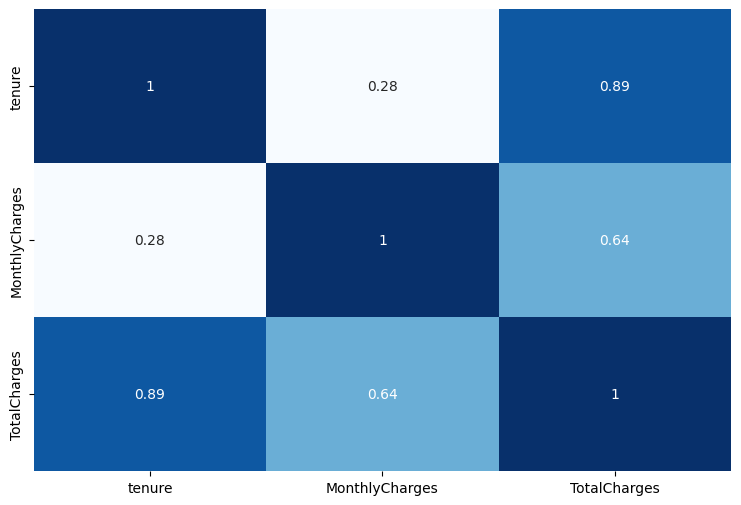

In [36]:
# Visualisasi Heatmap untuk Numerikal Fitur
plt.figure(figsize=(9,6))
sns.heatmap(df[kolom_numerik].corr(method='spearman'), annot=True, cbar=False, cmap='Blues')
plt.show()

SUMMARY

- Variabel numerik `tenure, MonthlyCharges, dan TotalCharges` menunjukkan hubungan **korelasi positif** satu sama lain.
- Korelasi antara `tenure` dan `TotalCharges` **sangat kuat**, dengan nilai sebesar 0.89.
- `MonthlyCharges` memiliki **korelasi sedang** terhadap `TotalCharges` (0.64) dan **korelasi rendah** terhadap `tenure` (0.28).

##### **Pengecekan Korelasi Numerikal Fiture dengan VIF**

> **VIF (Variance Inflation Factor)** mengukur seberapa besar **varians** dari koefisien regresi suatu fitur meningkat karena **adanya korelasi dengan fitur lainnya**.
>   - Semakin tinggi nilai VIF, semakin besar risiko **multikolinearitas**.
>   - Multikolinearitas bisa membuat model (terutama model linear seperti **logistic regression**) menjadi **tidak stabil dan sulit diinterpretasikan**.

In [37]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [38]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# feature
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
X = sm.add_constant(X)

# target
y = df['Churn']

In [39]:
# Membuat fungsi VIF 
def vif_calc(X):
    vif = pd.DataFrame()
    vif['feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X, kolom) for kolom in range (len(X.columns))]

    return vif

# Menjalankan fungsi VIF
vif_calc(X.drop(columns = 'const'))

,feature,VIF
0,tenure,6.332432
1,MonthlyCharges,3.361075
2,TotalCharges,8.079181


> **KESIMPULAN:** Meskipun **korelasi Spearman** membantu mengidentifikasi **hubungan antar fitur secara individual**, **VIF memberikan informasi tambahan terkait multikolinearitas secara keseluruhan di dalam model**. Dalam hal ini, **keduanya menunjukkan indikasi adanya keterkaitan kuat** antara variabel tenure, MonthlyCharges, dan TotalCharges.”

**Pengecekan Korelasi Kategorikal Fiture dengan VIF**

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 non-nu

In [41]:
# Data kategorik akan dilakukan encoding terlebih dahulu untuk selanjutnya dilakukan pengecekan VIF
# Using one hot encoding dan drop_first untuk data kategorik
cols = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]
X_dummy = pd.get_dummies(cols, drop_first=True, dtype=int)
X_dummy.head(3)

,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [42]:
# Tambahkan kolom numerik 
X_dummy['tenure'] = df['tenure']
X_dummy['MonthlyCharges'] = df['MonthlyCharges']
X_dummy['TotalCharges'] = df['TotalCharges']

In [43]:
# Melihat data yang siap untuk pengecekan korelasi
X_dummy.head(3)

,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,29.85,29.85
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,34,56.95,1889.50
2,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,2,53.85,108.15


In [44]:
X_dummy.columns

Index(['gender_Male', 'SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes', 'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [45]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# feature
X = X_dummy.drop(columns = 'Churn_Yes')
X = sm.add_constant(X)

# target
y = X_dummy['Churn_Yes']

In [46]:
# Membuat fungsi VIF 
def vif_calc(X):
    vif = pd.DataFrame()
    vif['feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X, kolom) for kolom in range (len(X.columns))]

    return vif

# Menjalankan fungsi VIF
vif_calc(X.drop(columns = 'const'))

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,gender_Male,1.002106
1,SeniorCitizen_Yes,1.153220
2,Partner_Yes,1.462988
3,Dependents_Yes,1.381598
4,PhoneService_Yes,1773.528816
5,MultipleLines_No phone service,60.842267
6,MultipleLines_Yes,7.289761
7,InternetService_Fiber optic,148.500814
8,InternetService_No,inf
9,OnlineSecurity_No internet service,inf


**Interpretasi Nilai VIF**

| VIF Value | Interpretasi                                                                                  |
| --------- | --------------------------------------------------------------------------------------------- |
| 1 – 2     | Tidak ada multikolinearitas yang berarti                                                      |
| 2 – 5     | Ada korelasi moderat, mungkin masih bisa diterima                                             |
| 5 – 10    | Multikolinearitas kuat, sebaiknya dipertimbangkan untuk dihapus                               |
| > 10      | Multikolinearitas **sangat tinggi** – sebaiknya dihapus atau ditangani                        |
| **inf**   | Fitur tersebut **sangat sempurna dikorelasikan** dengan fitur lain — ini **bermasalah berat** |


**SUMMARY**

Dari hasil VIF diatas, berikut hasil analisis:
- Terdapat keterkaitan kuat pada fitur MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, dengan alasan sbb:

| Kolom               | Keterkaitan                                                                                                   |
|---------------------|---------------------------------------------------------------------------------------------------------------|
| `MultipleLines`     | Bergantung pada apakah **`PhoneService = Yes`**                                                               |
| `OnlineSecurity`    | Hanya tersedia jika pelanggan punya **`InternetService`**. Jika tidak punya, nilainya `"No internet service"` |
| `OnlineBackup`      | Sama seperti `OnlineSecurity`                                                                                 |
| `DeviceProtection`  | Sama seperti `OnlineSecurity`                                                                                 |
| `TechSupport`       | Sama seperti `OnlineSecurity`                                                                                 |
| `StreamingTV`       | Sama seperti `OnlineSecurity`                                                                                 |
| `StreamingMovies`   | Sama seperti `OnlineSecurity`                                                                                 |

- Contoh Keterkaitan:
  - Jika InternetService = No, maka:
    - OnlineSecurity, OnlineBackup, dll akan bernilai **“No internet service”**.
  - Jika PhoneService = No, maka:
    - MultipleLines = **“No phone service”**

- Hasil VIF menunjukan:
    - Fitur seperti OnlineSecurity_No internet service, OnlineBackup_No internet service, dll punya korelasi hampir sempurna karena semuanya bergantung pada InternetService.
    - Hasil VIF juga menunjukkan multikolinearitas ekstrem (inf) di antara fitur-fitur ini → indikasi keterkaitan tinggi.

> Berdasarkan hasil analisis awal menggunakan VIF, ditemukan nilai yang sangat tinggi hingga mencapai tak hingga (∞), terutama pada fitur-fitur kategorikal yang memiliki keterkaitan struktural, seperti fitur layanan yang hanya tersedia jika pelanggan memiliki layanan internet atau telepon. Hal ini menimbulkan kekhawatiran bahwa penggunaan **VIF kurang tepat untuk mengevaluasi keterkaitan antar fitur kategorikal secara akurat.**

> Untuk itu, dilakukan v**alidasi lebih lanjut menggunakan metode Chi-Square Test of Independence**, yang lebih sesuai dalam mengukur hubungan antar variabel kategorikal.

**Pengecekan ulang Multikolinearitas dengan Chi Square**

Konsep Chi-Square untuk Deteksi Multikolinearitas pada Fitur Kategorikal
Multikolinearitas biasanya dibahas dalam konteks variabel numerik, tapi untuk fitur kategorikal, kita bisa mengecek hubungan antar variabel menggunakan:

✅ Chi-Square Test of Independence

Tujuannya:
Untuk mengecek apakah dua variabel kategorikal saling bergantung atau independen.
- Jika Hasil Chi-Square signifikan (p-value < 0.05) → artinya kedua fitur berhubungan, alias ada potensi redundansi atau kolinearitas.
- Jika tidak signifikan → fitur cenderung independen satu sama lain (tidak redundant).

HIPOTESIS
- Hipotesis Nol (H0): Tidak ada hubungan (variabel independen).
- Hipotesis Alternatif (H1): Ada hubungan (variabel tidak independen).

`p-value` < 0.05 artinya Tolak H0
- Jika p-value < 0.05 → Tolak H0 → Ada hubungan → Bisa terjadi redundansi atau indikasi multikolinearitas kategorikal.
- Jika p-value ≥ 0.05 → Gagal tolak H0 → Tidak ada hubungan → Variabel bebas satu sama lain.

In [47]:
# Cek data yang bertipe category
df.select_dtypes(include='category').columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [48]:
from scipy.stats import chi2_contingency
import pandas as pd
from itertools import combinations

# Ambil kolom kategorikal
cat_cols = df.select_dtypes(include='category').columns
cat_cols = cat_cols.drop('Churn')

# Simpan hasil uji
chi2_results = []

# Lakukan Chi-Square untuk semua pasangan kombinasi kolom kategorikal
for col1, col2 in combinations(cat_cols, 2):
    # Buat tabel kontingensi
    contingency_table = pd.crosstab(df[col1], df[col2])
    
    # Uji chi-square
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    chi2_results.append({
        'Feature 1': col1,
        'Feature 2': col2,
        'p-value': round(p, 4),
        'Chi2': round(chi2, 2)
    })

# Hasil sebagai DataFrame
chi2_df = pd.DataFrame(chi2_results)

# Tampilkan seluruh hasil
pd.set_option('display.max_rows', None)  # supaya semua baris tampil
chi2_df


,Feature 1,Feature 2,p-value,Chi2
0,gender,SeniorCitizen,0.9043,0.01
1,gender,Partner,0.9269,0.01
2,gender,Dependents,0.3999,0.71
3,gender,PhoneService,0.5553,0.35
4,gender,MultipleLines,0.6880,0.75
5,gender,InternetService,0.6433,0.88
6,gender,OnlineSecurity,0.3909,1.88
7,gender,OnlineBackup,0.5472,1.21
8,gender,DeviceProtection,0.9201,0.17
9,gender,TechSupport,0.7644,0.54


- Fokus pada p-value < 0.05 → artinya ada potensi multikolinearitas kategorikal.
- Cek Chi2 score besar untuk tahu mana yang benar-benar sangat mirip / redundant.

In [49]:
# Tampilkan hanya yang signifikan
significant = chi2_df[chi2_df['p-value'] < 0.05]

print("Pasangan fitur kategorikal yang saling berhubungan (p < 0.05):")
significant.sort_values('p-value')

Pasangan fitur kategorikal yang saling berhubungan (p < 0.05):


,Feature 1,Feature 2,p-value,Chi2
16,SeniorCitizen,Dependents,0.0,310.49
18,SeniorCitizen,MultipleLines,0.0,151.40
19,SeniorCitizen,InternetService,0.0,493.52
20,SeniorCitizen,OnlineSecurity,0.0,312.26
21,SeniorCitizen,OnlineBackup,0.0,234.33
22,SeniorCitizen,DeviceProtection,0.0,235.06
23,SeniorCitizen,TechSupport,0.0,351.92
24,SeniorCitizen,StreamingTV,0.0,241.76
25,SeniorCitizen,StreamingMovies,0.0,250.37
26,SeniorCitizen,Contract,0.0,144.13


**Validasi Hasil Chi-Square terhadap VIF**

Berdasarkan perbandingan hasil uji **Chi-Square** dengan analisis **VIF**, terdapat bukti kuat bahwa fitur-fitur berikut menunjukkan hubungan yang sangat erat, baik secara **logika bisnis** maupun **data statistik**:

| Fitur              | Keterkaitan Logis                 | Chi-Square Signifikan | VIF Tinggi |
| ------------------ | --------------------------------- | --------------------- | ---------- |
| `OnlineSecurity`   | Bergantung pada `InternetService` | ✅ Ya (baris ke-75)    | ✅ Ya       |
| `OnlineBackup`     | Bergantung pada `InternetService` | ✅ Ya (baris ke-76)    | ✅ Ya       |
| `DeviceProtection` | Bergantung pada `InternetService` | ✅ Ya (baris ke-77)    | ✅ Ya       |
| `TechSupport`      | Bergantung pada `InternetService` | ✅ Ya (baris ke-78)    | ✅ Ya       |
| `StreamingTV`      | Bergantung pada `InternetService` | ✅ Ya (baris ke-79)    | ✅ Ya       |
| `StreamingMovies`  | Bergantung pada `InternetService` | ✅ Ya (baris ke-80)    | ✅ Ya       |
| `MultipleLines`    | Bergantung pada `PhoneService`    | ✅ Ya (baris ke-54)    | ✅ Ya       |

**Kesimpulan**

* Nilai **p-value = 0.0** dari hasil Chi-Square menunjukkan adanya keterkaitan **sangat kuat** antar fitur-fitur tersebut.
* Hal ini selaras dengan hasil VIF yang menunjukkan **multikolinearitas ekstrem**.
* Maka, dapat disimpulkan bahwa:

  > ✅ Hasil **Chi-Square** sangat mendukung temuan dari analisis **VIF**
  
  > 🔄 Terdapat **dua validasi** — yaitu dari sisi asosiasi (Chi-Square) dan multikolinearitas (VIF) — yang memperkuat keputusan untuk melakukan penggabungan atau penghapusan fitur yang redundan.


**TAHAPAN PERBAIKAN**
1. Menambah fitur baru dengan:
    - Menyederhanakan MultipleLines, fitur turunan Internet
    - Menambahkan flag HasPhone dan HasInternet
    - Menghapus PhoneService dan InternetService
    - Ubah 'No internet service' menjadi 'No' agar hanya dua kategori: Yes / No

2. Hapus satu dari pasangan yang berkorelasi tinggi, contoh:
    - Antara MonthlyCharges dan TotalCharges, pilih salah satu.

In [50]:
def feature_engineering(X_dummy):
    X_dummy = df.copy()

    # --- Ubah tipe semua kolom layanan ke string untuk menghindari future warning ---
    service_cols = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    X_dummy[service_cols] = X_dummy[service_cols].astype(str)

    # --- Buat flag HasPhoneSrv ---
    X_dummy['HasPhoneSrv'] = (X_dummy['PhoneService'] == 'Yes').astype(int)

    # --- Ubah 'No phone service' di MultipleLines menjadi 'No' ---
    X_dummy['MultipleLines'] = X_dummy['MultipleLines'].replace('No phone service', 'No')

    # --- Buat flag HasInternetSrv berdasarkan kolom layanan internet ---
    internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                     'TechSupport', 'StreamingTV', 'StreamingMovies']
    X_dummy['HasInternetSrv'] = (X_dummy[internet_cols] != 'No internet service').any(axis=1).astype(int)

    # --- Ubah 'No internet service' menjadi 'No' agar hanya dua kategori: Yes / No ---
    for col in internet_cols:
        X_dummy[col] = X_dummy[col].replace('No internet service', 'No')

    # --- Fitur jumlah layanan internet aktif ---
    X_dummy['num_internetsrv'] = (X_dummy[internet_cols] == 'Yes').sum(axis=1)

    # --- Fitur jumlah layanan telepon aktif ---
    X_dummy['num_phonesrv'] = (X_dummy['PhoneService'] == 'Yes').astype(int) + \
                          (X_dummy['MultipleLines'] == 'Yes').astype(int)

    return X_dummy


In [51]:
def feature_engineering(df):
    """
    Melakukan feature engineering pada fitur layanan:
    - Menyederhanakan MultipleLines, fitur turunan Internet
    - Menambahkan flag HasPhone dan HasInternet
    - Menghapus PhoneService dan InternetService

    Args:
        df (pd.DataFrame): Dataframe asli.

    Returns:
        pd.DataFrame: Dataframe yang telah dibersihkan.
    """

    df = df.copy()

    # --- Buat flag HasPhoneSrv ---
    df['HasPhoneSrv'] = (df['PhoneService'] == 'Yes').astype(int)

    # --- Ubah nilai 'No phone service' di MultipleLines menjadi 'No' ---
    df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

    # --- Buat flag HasInternet berdasarkan semua layanan internet ---
    internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                     'TechSupport', 'StreamingTV', 'StreamingMovies']
    df['HasInternetSrv'] = (df[internet_cols] != 'No internet service').any(axis=1).astype(int)

    # --- Ubah 'No internet service' menjadi 'No' agar hanya dua kategori: Yes / No ---
    for col in internet_cols:
        df[col] = df[col].replace('No internet service', 'No')

    # # --- Drop PhoneService karena sudah diganti dengan HasPhone ---
    # df = df.drop(columns='PhoneService')

    return df


In [52]:
df_cleaned = feature_engineering(df)
df_cleaned.sample(5)

C:\Users\User\AppData\Local\Temp\ipykernel_15288\400443098.py:21: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
C:\Users\User\AppData\Local\Temp\ipykernel_15288\400443098.py:30: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col].replace('No internet service', 'No')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,HasPhoneSrv,HasInternetSrv
2461,7706-YLMQA,Female,No,No,No,70,Yes,No,No,No,...,No,No,One year,No,Bank transfer (automatic),19.70,1341.50,No,1,0
6200,7328-ZJAJO,Female,No,Yes,Yes,59,Yes,No,No,No,...,No,No,Two year,No,Credit card (automatic),19.50,1222.65,No,1,0
3643,9451-WLYRI,Female,No,Yes,No,53,Yes,No,No,No,...,No,No,One year,No,Credit card (automatic),19.05,990.45,No,1,0
3784,4958-XCBDQ,Male,Yes,No,No,35,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,101.40,3496.30,Yes,1,1
1547,2886-KEFUM,Female,No,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Electronic check,107.50,6873.75,Yes,1,1


In [53]:
# --- Mulai dari data yang sudah di-OneHot dan drop_first ---
cols = df_cleaned[['gender', 'Partner', 'Dependents', 'MultipleLines', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport',
           'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
           'PaymentMethod', 'Churn']]
X_dummy = pd.get_dummies(cols, drop_first=True, dtype=int)

In [54]:
X_dummy.head(3)

,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1


In [55]:
# --- Tambahkan kolom numerik ---
X_dummy['tenure'] = df_cleaned['tenure']
X_dummy['MonthlyCharges'] =  df_cleaned['MonthlyCharges']


# Tambahkan fitur baru HasPhoneSrv dan HasInternetSrv pada dummy
X_dummy['HasPhoneSrv'] = df_cleaned['HasPhoneSrv']
X_dummy['HasInternetSrv'] = df_cleaned['HasInternetSrv']

# --- Scaling kolom numerik ---
num_cols = ['tenure', 'MonthlyCharges']
scaler = RobustScaler()
X_dummy[num_cols] = scaler.fit_transform(X_dummy[num_cols])

In [56]:
X_dummy.head(5)

,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure,MonthlyCharges,HasPhoneSrv,HasInternetSrv
0,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,-0.608696,-0.746200,0,1
1,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0.108696,-0.246891,1,1
2,1,0,0,0,1,1,0,0,0,0,...,0,1,0,0,1,1,-0.586957,-0.304007,1,1
3,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0.347826,-0.516813,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,-0.586957,0.006449,1,1


In [57]:
# Melihat hasil VIF setelah dilakukan tahapan perbaikan
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
vif_df['feature'] = X_dummy.columns
vif_df['VIF'] = [variance_inflation_factor(X_dummy.values, i) for i in range(X_dummy.shape[1])]
print(vif_df.sort_values(by='VIF', ascending=False))


                                  feature       VIF
20                         HasInternetSrv  8.862592
19                            HasPhoneSrv  6.909976
11                      Contract_Two year  3.427599
18                         MonthlyCharges  3.068010
17                                 tenure  2.967149
12                   PaperlessBilling_Yes  2.899700
9                     StreamingMovies_Yes  2.865722
8                         StreamingTV_Yes  2.860493
14         PaymentMethod_Electronic check  2.858585
1                             Partner_Yes  2.778849
3                       MultipleLines_Yes  2.578689
15             PaymentMethod_Mailed check  2.329844
6                    DeviceProtection_Yes  2.300517
5                        OnlineBackup_Yes  2.144360
7                         TechSupport_Yes  2.058141
10                      Contract_One year  2.054844
0                             gender_Male  2.006474
4                      OnlineSecurity_Yes  1.965872
13  PaymentM

In [58]:
# Total fitur yang sudah bagus atau tidak berkorelasi tinggi satu sama lain
vif_df.shape

(21, 2)

#### **2. Pengecekan Distribusi Data**

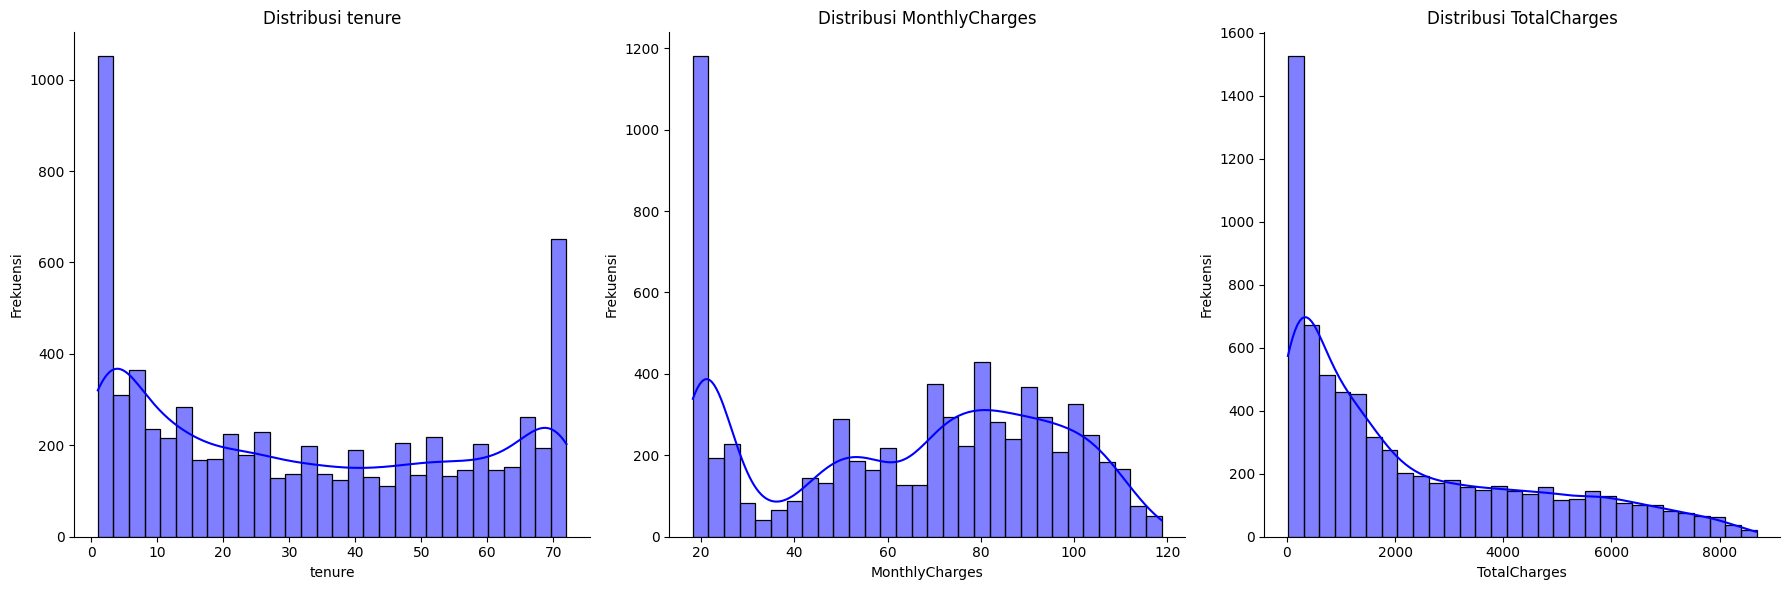

In [59]:
plt.figure(figsize=(18,6))
for i in range(len(kolom_numerik)) :
    plt.subplot(1, 3, 1+i)
    sns.histplot(df[kolom_numerik[i]], kde=True, bins=30, color='blue')
    sns.despine()
    plt.title(f'Distribusi {kolom_numerik[i]}')
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

SUMMARY

1. `Tenure`: Distribusi tenure menunjukkan pola U-shape, dengan dua kelompok utama pelanggan: yang baru bergabung dan yang sudah sangat lama berlangganan. Pelanggan dengan masa langganan menengah relatif lebih sedikit.
2. `MonthlyCharge`: Distribusi tidak simetris dan tampak bimodal (memiliki dua puncak). 
   - Puncak pertama di sekitar $20, menunjukkan banyak pelanggan yang membayar biaya bulanan rendah—kemungkinan karena hanya menggunakan layanan dasar seperti telepon/internet tanpa tambahan.
   - Puncak kedua menyebar antara $70–$100, menunjukkan kelompok pelanggan yang menggunakan lebih banyak layanan atau layanan premium.
3. `TotalCharge`: Distribusi ini sangat miring ke kanan (right-skewed). Sebagian besar pelanggan memiliki total tagihan rendah, terkonsentrasi di bawah $2000

#### **3. Perbandingan Data Senior Citizen yang memutuskan untuk Churn**

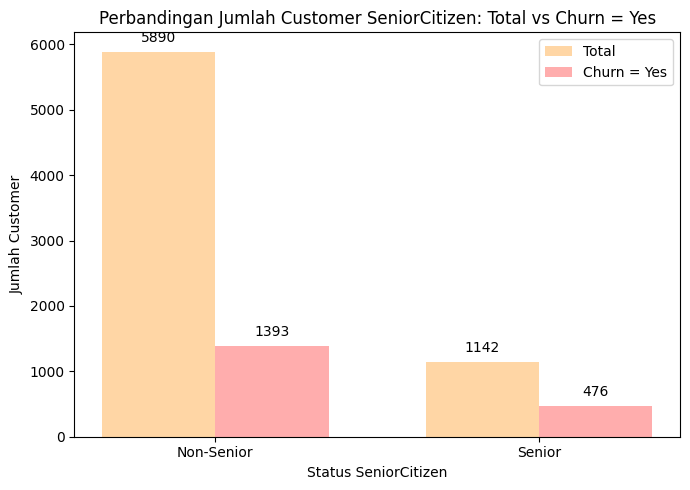

Jumlah Customer Non-Senior: 5890
Jumlah Customer Senior: 1142
Non-Senior Churn = Yes: 1393 (23.65%)
Senior Churn = Yes: 476 (41.68%)


In [60]:
# Total pelanggan berdasarkan status SeniorCitizen (No = Bukan Lansia, Yes = Lansia)
total_senior = df['SeniorCitizen'].value_counts().reindex(['No', 'Yes'])

# Pelanggan churn='Yes' berdasarkan status SeniorCitizen
churn_senior = df[df['Churn'] == 'Yes']['SeniorCitizen'].value_counts().reindex(['No', 'Yes'], fill_value=0)

# Persentase churn per kategori SeniorCitizen
non_senior_total = total_senior['No']
senior_total = total_senior['Yes']
non_senior_churn = churn_senior['No']
senior_churn = churn_senior['Yes']

non_senior_churn_pct = round((non_senior_churn / non_senior_total) * 100, 2)
senior_churn_pct = round((senior_churn / senior_total) * 100, 2)

# Plot bar chart
labels = ['Non-Senior', 'Senior']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(7, 5))
bars1 = ax.bar(x - width/2, total_senior.values, width, label='Total', color='#ffd6a5')
bars2 = ax.bar(x + width/2, churn_senior.values, width, label='Churn = Yes', color='#ffadad')

# Tambahkan label nilai
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer SeniorCitizen: Total vs Churn = Yes')
ax.set_xlabel('Status SeniorCitizen')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
print(f'Jumlah Customer Non-Senior: {non_senior_total}')
print(f'Jumlah Customer Senior: {senior_total}')
print(f'Non-Senior Churn = Yes: {non_senior_churn} ({non_senior_churn_pct}%)')
print(f'Senior Churn = Yes: {senior_churn} ({senior_churn_pct}%)')


Interpretasi

* **Mayoritas pelanggan bukan warga senior** (5890 dari 7032).
* **Warga senior lebih mungkin churn** dibanding non-senior:

  * **Non-senior**: hanya **23.65%** yang churn.
  * **Senior**: **41.68%** yang churn — hampir **dua kali lipat** lebih tinggi dari non-senior.

**Kesimpulan**: Warga senior memiliki kecenderungan lebih tinggi untuk berhenti berlangganan. Ini bisa jadi sinyal bahwa mereka butuh perhatian khusus, misalnya dalam hal layanan pelanggan atau paket yang lebih sesuai kebutuhan.


#### **4. Perbandingan Data Partners yang memutuskan untuk Churn**

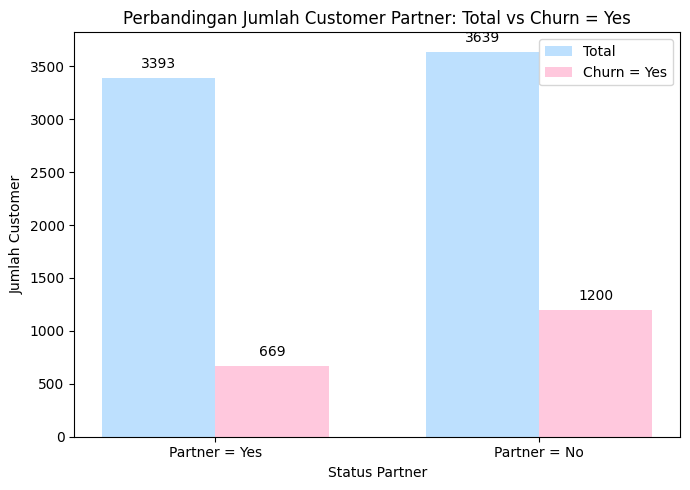

Jumlah Customer dengan Partner = Yes: 3393
Jumlah Customer dengan Partner = No : 3639
Partner = Yes, Churn = Yes: 669 (19.72%)
Partner = No , Churn = Yes: 1200 (32.98%)


In [61]:
# Total pelanggan berdasarkan status Partner (Yes/No)
total_partner = df['Partner'].value_counts().reindex(['Yes', 'No'])

# Pelanggan churn='Yes' berdasarkan status Partner
churn_partner = df[df['Churn'] == 'Yes']['Partner'].value_counts().reindex(['Yes', 'No'], fill_value=0)

# Persentase churn per kategori Partner
yes_partner_total = total_partner['Yes']
no_partner_total = total_partner['No']
yes_partner_churn = churn_partner['Yes']
no_partner_churn = churn_partner['No']

yes_partner_churn_pct = round((yes_partner_churn / yes_partner_total) * 100, 2)
no_partner_churn_pct = round((no_partner_churn / no_partner_total) * 100, 2)

# Plot bar chart
labels = ['Partner = Yes', 'Partner = No']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(7, 5))
bars1 = ax.bar(x - width/2, total_partner.values, width, label='Total', color='#bde0fe')
bars2 = ax.bar(x + width/2, churn_partner.values, width, label='Churn = Yes', color='#ffc8dd')

# Tambahkan label nilai
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer Partner: Total vs Churn = Yes')
ax.set_xlabel('Status Partner')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
print(f'Jumlah Customer dengan Partner = Yes: {yes_partner_total}')
print(f'Jumlah Customer dengan Partner = No : {no_partner_total}')
print(f'Partner = Yes, Churn = Yes: {yes_partner_churn} ({yes_partner_churn_pct}%)')
print(f'Partner = No , Churn = Yes: {no_partner_churn} ({no_partner_churn_pct}%)')


Interpretasi

* **Jumlah pelanggan terbagi cukup merata** antara yang punya pasangan (Partner = Yes) dan tidak.
* **Pelanggan tanpa pasangan lebih mungkin churn**:

  * **Dengan pasangan**: hanya **19.72%** yang churn.
  * **Tanpa pasangan**: **32.98%** yang churn.

**Kesimpulan**: Pelanggan yang tidak memiliki pasangan memiliki risiko churn yang lebih tinggi. Mungkin karena mereka lebih sensitif terhadap biaya atau kurang terikat secara emosional dengan layanan. Ini bisa jadi peluang untuk pendekatan personal atau penawaran khusus.


#### **5. Perbandingan Data Dependents yang memutuskan untuk Churn**

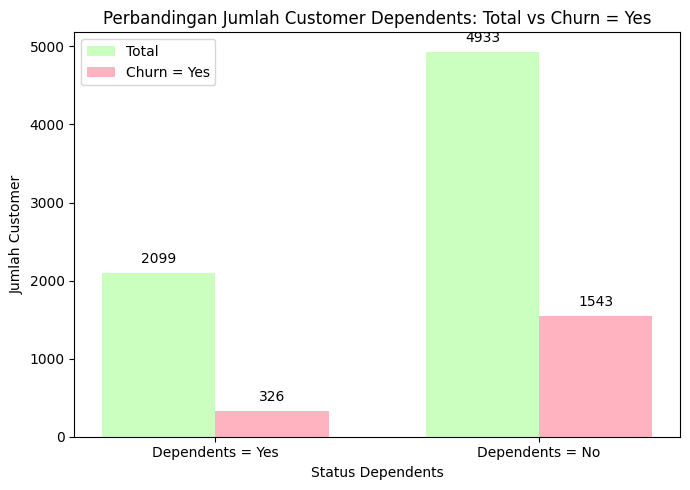

Jumlah Customer dengan Dependents = Yes: 2099
Jumlah Customer dengan Dependents = No : 4933
Dependents = Yes, Churn = Yes: 326 (15.53%)
Dependents = No , Churn = Yes: 1543 (31.28%)


In [62]:
# Total pelanggan berdasarkan status Dependents (Yes/No)
total_dependents = df['Dependents'].value_counts().reindex(['Yes', 'No'])

# Pelanggan churn='Yes' berdasarkan status Dependents
churn_dependents = df[df['Churn'] == 'Yes']['Dependents'].value_counts().reindex(['Yes', 'No'], fill_value=0)

# Persentase churn per kategori Dependents
yes_dep_total = total_dependents['Yes']
no_dep_total = total_dependents['No']
yes_dep_churn = churn_dependents['Yes']
no_dep_churn = churn_dependents['No']

yes_dep_churn_pct = round((yes_dep_churn / yes_dep_total) * 100, 2)
no_dep_churn_pct = round((no_dep_churn / no_dep_total) * 100, 2)

# Plot bar chart
labels = ['Dependents = Yes', 'Dependents = No']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(7, 5))
bars1 = ax.bar(x - width/2, total_dependents.values, width, label='Total', color='#caffbf')
bars2 = ax.bar(x + width/2, churn_dependents.values, width, label='Churn = Yes', color='#ffb3c1')

# Tambahkan label nilai
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer Dependents: Total vs Churn = Yes')
ax.set_xlabel('Status Dependents')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
print(f'Jumlah Customer dengan Dependents = Yes: {yes_dep_total}')
print(f'Jumlah Customer dengan Dependents = No : {no_dep_total}')
print(f'Dependents = Yes, Churn = Yes: {yes_dep_churn} ({yes_dep_churn_pct}%)')
print(f'Dependents = No , Churn = Yes: {no_dep_churn} ({no_dep_churn_pct}%)')


Interpretasi

* **Sebagian besar pelanggan tidak memiliki tanggungan** (lebih dari dua kali lipat dibanding yang punya tanggungan).
* **Pelanggan tanpa tanggungan jauh lebih mungkin churn**:

  * **Dengan tanggungan**: hanya **15.53%** yang churn.
  * **Tanpa tanggungan**: **31.28%** yang churn — lebih dari **dua kali lipat**.

**Kesimpulan**: Pelanggan dengan tanggungan cenderung lebih setia, mungkin karena mereka lebih bergantung pada layanan untuk keluarga. Ini menunjukkan bahwa pelanggan tanpa tanggungan perlu perhatian lebih agar tidak churn.


#### **7. Perbandingan Data Pengguna Fiture Phone Service yang memutuskan untuk Churn**

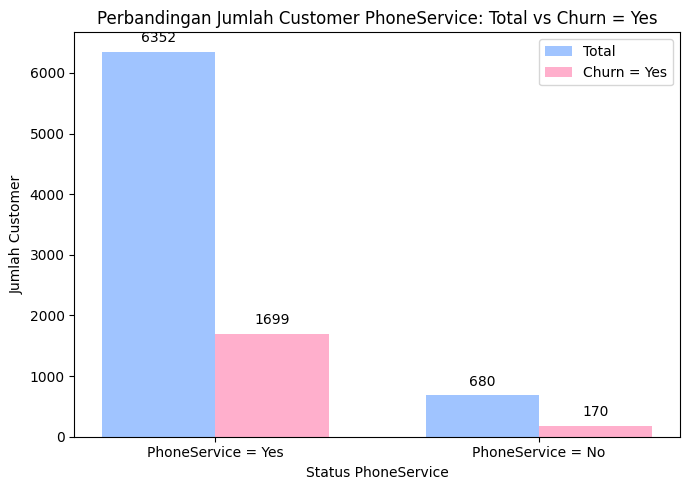

Jumlah Customer dengan PhoneService = Yes: 6352
Jumlah Customer dengan PhoneService = No : 680
PhoneService = Yes, Churn = Yes: 1699 (26.75%)
PhoneService = No , Churn = Yes: 170 (25.0%)


In [63]:
# Total pelanggan berdasarkan status PhoneService (Yes/No)
total_phoneservice = df['PhoneService'].value_counts().reindex(['Yes', 'No'])

# Pelanggan churn='Yes' berdasarkan status PhoneService
churn_phoneservice = df[df['Churn'] == 'Yes']['PhoneService'].value_counts().reindex(['Yes', 'No'], fill_value=0)

# Persentase churn per kategori PhoneService
yes_phone_total = total_phoneservice['Yes']
no_phone_total = total_phoneservice['No']
yes_phone_churn = churn_phoneservice['Yes']
no_phone_churn = churn_phoneservice['No']

yes_phone_churn_pct = round((yes_phone_churn / yes_phone_total) * 100, 2)
no_phone_churn_pct = round((no_phone_churn / no_phone_total) * 100, 2)

# Plot bar chart
labels = ['PhoneService = Yes', 'PhoneService = No']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(7, 5))
bars1 = ax.bar(x - width/2, total_phoneservice.values, width, label='Total', color='#a0c4ff')
bars2 = ax.bar(x + width/2, churn_phoneservice.values, width, label='Churn = Yes', color='#ffafcc')

# Tambahkan label nilai
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer PhoneService: Total vs Churn = Yes')
ax.set_xlabel('Status PhoneService')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
print(f'Jumlah Customer dengan PhoneService = Yes: {yes_phone_total}')
print(f'Jumlah Customer dengan PhoneService = No : {no_phone_total}')
print(f'PhoneService = Yes, Churn = Yes: {yes_phone_churn} ({yes_phone_churn_pct}%)')
print(f'PhoneService = No , Churn = Yes: {no_phone_churn} ({no_phone_churn_pct}%)')


Interpretasi

* **Sebagian besar pelanggan menggunakan layanan telepon** (lebih dari 9 dari 10 pelanggan memiliki PhoneService).
* **Pelanggan dengan atau tanpa PhoneService memiliki tingkat churn yang hampir sama**:

  * **Dengan PhoneService**: **26.75%** churn.
  * **Tanpa PhoneService**: **25.0%** churn.

**Kesimpulan**: PhoneService **tidak memiliki pengaruh besar terhadap churn**, karena selisih tingkat churn di kedua kelompok sangat kecil. Ini menunjukkan bahwa keberadaan layanan telepon bukanlah faktor utama dalam keputusan pelanggan untuk berhenti.

#### **8. Perbandingan Data Pengguna Fiture Multiple Lines yang memutuskan untuk Churn**

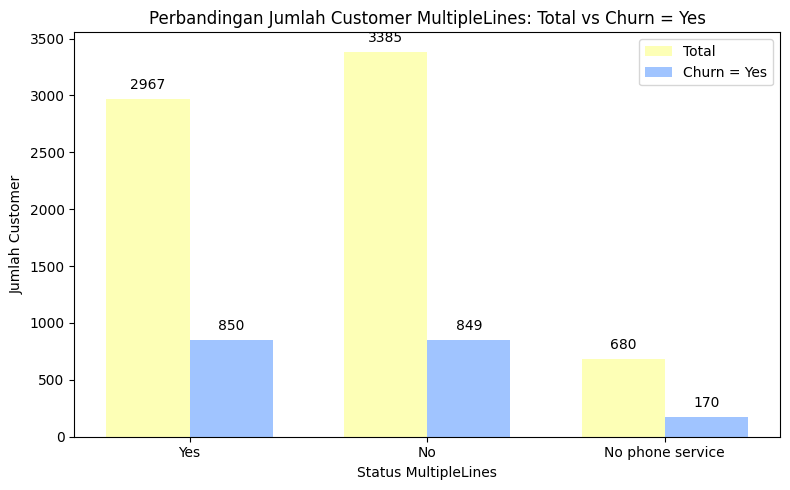

MultipleLines = Yes: Total = 2967, Churn = 850 (28.65%)
MultipleLines = No: Total = 3385, Churn = 849 (25.08%)
MultipleLines = No phone service: Total = 680, Churn = 170 (25.0%)


In [64]:
# Total pelanggan berdasarkan MultipleLines
total_lines = df['MultipleLines'].value_counts().reindex(['Yes', 'No', 'No phone service'])

# Pelanggan churn='Yes' berdasarkan MultipleLines
churn_lines = df[df['Churn'] == 'Yes']['MultipleLines'].value_counts().reindex(['Yes', 'No', 'No phone service'], fill_value=0)

# Persentase churn
lines_total = total_lines
lines_churn = churn_lines
lines_churn_pct = round((lines_churn / lines_total) * 100, 2)

# Plot bar chart
labels = ['Yes', 'No', 'No phone service']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, lines_total.values, width, label='Total', color='#fdffb6')
bars2 = ax.bar(x + width/2, lines_churn.values, width, label='Churn = Yes', color='#a0c4ff')

# Tambahkan label nilai di atas bar
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer MultipleLines: Total vs Churn = Yes')
ax.set_xlabel('Status MultipleLines')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
for status in labels:
    print(f"MultipleLines = {status}: Total = {lines_total[status]}, Churn = {lines_churn[status]} ({lines_churn_pct[status]}%)")


Interpretasi

* **Pelanggan dengan layanan multiple lines memiliki tingkat churn paling tinggi**:

  * **MultipleLines = Yes**: 28.65%
  * **MultipleLines = No**: 25.08%
  * **Tidak punya layanan telepon (No phone service)**: 25.0%

**Kesimpulan**:
Memiliki **multiple lines sedikit meningkatkan risiko churn** dibanding pelanggan lain. Namun, perbedaan tidak terlalu besar, jadi ini mungkin bukan faktor dominan. Tetap bisa jadi sinyal bahwa pelanggan dengan lebih dari satu jalur telepon perlu lebih diperhatikan atau diberi insentif agar tetap bertahan.


#### **9. Perbandingan Data Pengguna Fiture Internet Service yang memutuskan untuk Churn**

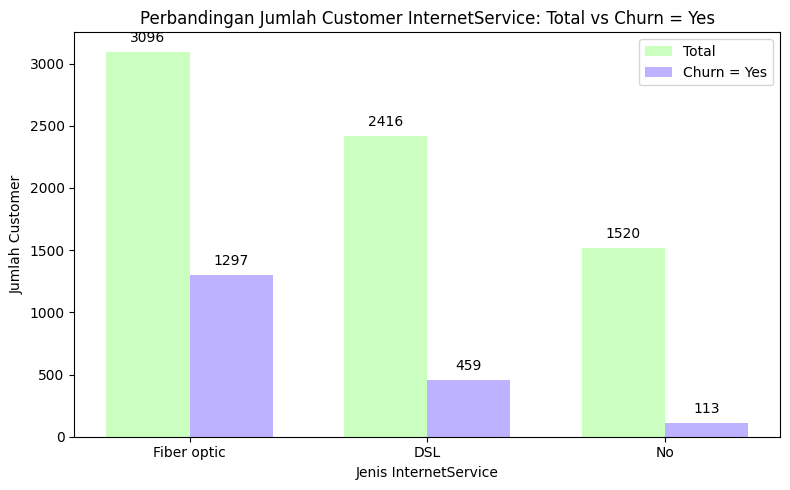

InternetService = Fiber optic: Total = 3096, Churn = 1297 (41.89%)
InternetService = DSL: Total = 2416, Churn = 459 (19.0%)
InternetService = No: Total = 1520, Churn = 113 (7.43%)


In [65]:
# Total pelanggan berdasarkan InternetService
total_internet = df['InternetService'].value_counts().reindex(['Fiber optic', 'DSL', 'No'])

# Pelanggan churn='Yes' berdasarkan InternetService
churn_internet = df[df['Churn'] == 'Yes']['InternetService'].value_counts().reindex(['Fiber optic', 'DSL', 'No'], fill_value=0)

# Persentase churn
internet_total = total_internet
internet_churn = churn_internet
internet_churn_pct = round((internet_churn / internet_total) * 100, 2)

# Plot bar chart
labels = ['Fiber optic', 'DSL', 'No']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, internet_total.values, width, label='Total', color='#caffbf')
bars2 = ax.bar(x + width/2, internet_churn.values, width, label='Churn = Yes', color='#bdb2ff')

# Tambahkan label nilai
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer InternetService: Total vs Churn = Yes')
ax.set_xlabel('Jenis InternetService')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
for status in labels:
    print(f"InternetService = {status}: Total = {internet_total[status]}, Churn = {internet_churn[status]} ({internet_churn_pct[status]}%)")


Interpretasi

* **Pelanggan dengan layanan internet Fiber optic memiliki tingkat churn tertinggi**:

  * **Fiber optic**: 41.89%
  * **DSL**: 19.0%
  * **Tidak punya layanan internet**: 7.43%

**Kesimpulan**:
Pelanggan **Fiber optic jauh lebih rentan churn** dibanding yang lain — bahkan lebih dari **dua kali lipat** dibanding DSL, dan hampir **6 kali lipat** dibanding yang tidak pakai internet.
Kemungkinan karena:

* Harga Fiber optic lebih tinggi.
* Harapan pelanggan atas kualitas layanan juga lebih tinggi.

#### **10. Perbandingan Data Pengguna Fiture Online Security yang memutuskan untuk Churn**

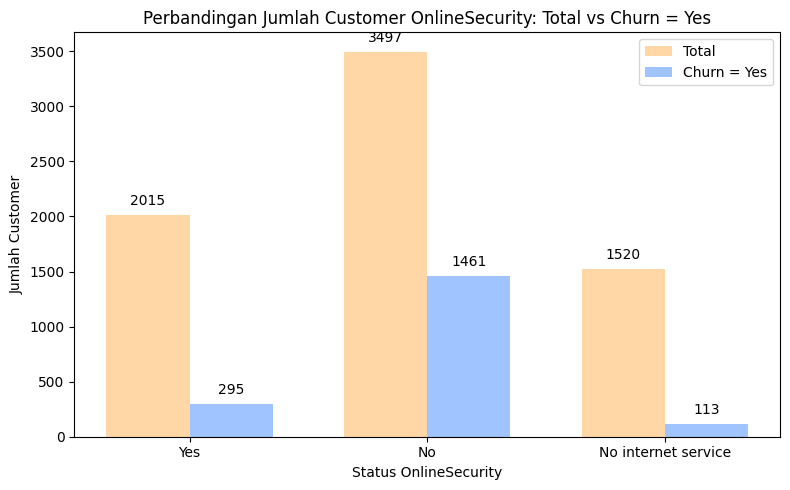

OnlineSecurity = Yes: Total = 2015, Churn = 295 (14.64%)
OnlineSecurity = No: Total = 3497, Churn = 1461 (41.78%)
OnlineSecurity = No internet service: Total = 1520, Churn = 113 (7.43%)


In [66]:
# Total pelanggan berdasarkan OnlineSecurity
total_security = df['OnlineSecurity'].value_counts().reindex(['Yes', 'No', 'No internet service'])

# Pelanggan churn='Yes' berdasarkan OnlineSecurity
churn_security = df[df['Churn'] == 'Yes']['OnlineSecurity'].value_counts().reindex(['Yes', 'No', 'No internet service'], fill_value=0)

# Persentase churn
security_total = total_security
security_churn = churn_security
security_churn_pct = round((security_churn / security_total) * 100, 2)

# Plot bar chart
labels = ['Yes', 'No', 'No internet service']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, security_total.values, width, label='Total', color='#ffd6a5')
bars2 = ax.bar(x + width/2, security_churn.values, width, label='Churn = Yes', color='#a0c4ff')

# Tambahkan label nilai di atas bar
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer OnlineSecurity: Total vs Churn = Yes')
ax.set_xlabel('Status OnlineSecurity')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
for status in labels:
    print(f"OnlineSecurity = {status}: Total = {security_total[status]}, Churn = {security_churn[status]} ({security_churn_pct[status]}%)")


Interpretasi

* **Sebagian besar pelanggan tidak menggunakan layanan OnlineSecurity** — lebih dari **1,5 kali lipat** dibanding yang menggunakannya.
* **Tingkat churn jauh lebih tinggi pada pelanggan tanpa OnlineSecurity**:

  * **Dengan OnlineSecurity**: hanya **14.64%** yang churn.
  * **Tanpa OnlineSecurity**: **41.78%** yang churn — hampir **tiga kali lipat**.
  * **Tanpa layanan internet sama sekali**: churn justru lebih rendah (**7.43%**).

**Kesimpulan**: Pelanggan **tanpa OnlineSecurity sangat rentan churn**, kemungkinan karena merasa kurang aman atau tidak puas. Memberikan atau mempromosikan layanan keamanan online bisa menjadi strategi penting untuk mempertahankan pelanggan.

#### **11. Perbandingan Data Pengguna Fiture Online Back Up yang memutuskan untuk Churn**

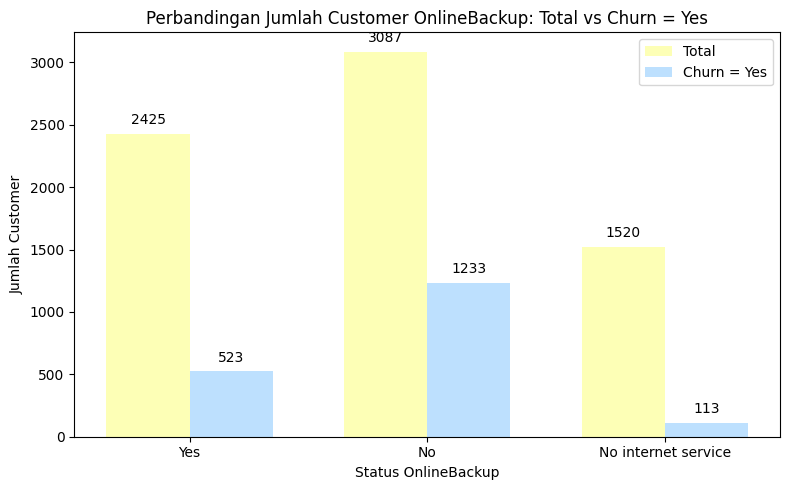

OnlineBackup = Yes: Total = 2425, Churn = 523 (21.57%)
OnlineBackup = No: Total = 3087, Churn = 1233 (39.94%)
OnlineBackup = No internet service: Total = 1520, Churn = 113 (7.43%)


In [67]:
# Total pelanggan berdasarkan OnlineBackup
total_backup = df['OnlineBackup'].value_counts().reindex(['Yes', 'No', 'No internet service'])

# Pelanggan churn='Yes' berdasarkan OnlineBackup
churn_backup = df[df['Churn'] == 'Yes']['OnlineBackup'].value_counts().reindex(['Yes', 'No', 'No internet service'], fill_value=0)

# Persentase churn
backup_total = total_backup
backup_churn = churn_backup
backup_churn_pct = round((backup_churn / backup_total) * 100, 2)

# Plot bar chart
labels = ['Yes', 'No', 'No internet service']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, backup_total.values, width, label='Total', color='#fdffb6')
bars2 = ax.bar(x + width/2, backup_churn.values, width, label='Churn = Yes', color='#bde0fe')

# Tambahkan label nilai di atas bar
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer OnlineBackup: Total vs Churn = Yes')
ax.set_xlabel('Status OnlineBackup')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
for status in labels:
    print(f"OnlineBackup = {status}: Total = {backup_total[status]}, Churn = {backup_churn[status]} ({backup_churn_pct[status]}%)")


Interpretasi

* **Lebih banyak pelanggan tidak menggunakan layanan OnlineBackup** dibanding yang menggunakannya.
* **Tingkat churn jauh lebih tinggi pada pelanggan tanpa OnlineBackup**:

  * **Dengan OnlineBackup**: **21.57%** churn.
  * **Tanpa OnlineBackup**: **39.94%** churn — hampir **dua kali lipat**.
  * **Tanpa layanan internet**: churn tetap rendah (**7.43%**).

**Kesimpulan**: Pelanggan yang **tidak menggunakan OnlineBackup lebih rentan churn**, menunjukkan bahwa layanan tambahan seperti backup bisa meningkatkan loyalitas. Mendorong adopsi fitur ini bisa membantu menekan churn.


#### **12. Perbandingan Data Pengguna Device Protection yang memutuskan untuk Churn**

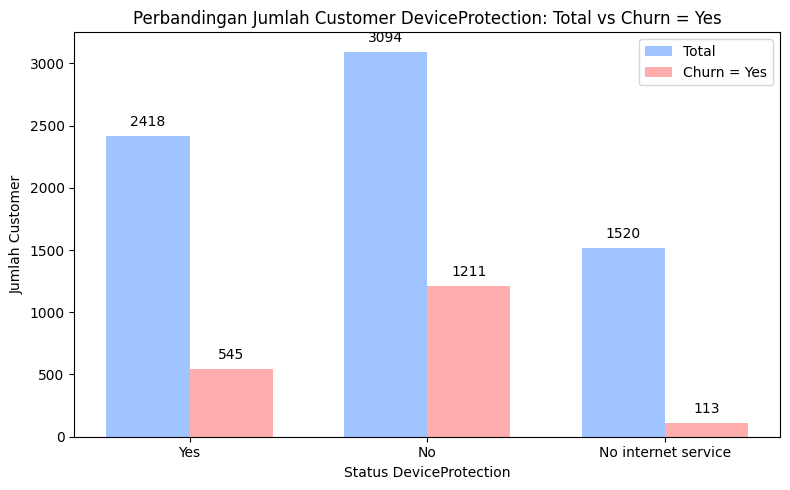

DeviceProtection = Yes: Total = 2418, Churn = 545 (22.54%)
DeviceProtection = No: Total = 3094, Churn = 1211 (39.14%)
DeviceProtection = No internet service: Total = 1520, Churn = 113 (7.43%)


In [68]:
# Total pelanggan berdasarkan DeviceProtection
total_device = df['DeviceProtection'].value_counts().reindex(['Yes', 'No', 'No internet service'])

# Pelanggan churn='Yes' berdasarkan DeviceProtection
churn_device = df[df['Churn'] == 'Yes']['DeviceProtection'].value_counts().reindex(['Yes', 'No', 'No internet service'], fill_value=0)

# Persentase churn
device_total = total_device
device_churn = churn_device
device_churn_pct = round((device_churn / device_total) * 100, 2)

# Plot bar chart
labels = ['Yes', 'No', 'No internet service']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, device_total.values, width, label='Total', color='#a0c4ff')
bars2 = ax.bar(x + width/2, device_churn.values, width, label='Churn = Yes', color='#ffadad')

# Tambahkan label nilai di atas bar
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer DeviceProtection: Total vs Churn = Yes')
ax.set_xlabel('Status DeviceProtection')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
for status in labels:
    print(f"DeviceProtection = {status}: Total = {device_total[status]}, Churn = {device_churn[status]} ({device_churn_pct[status]}%)")


Interpretasi

* **Lebih banyak pelanggan tidak menggunakan DeviceProtection** dibanding yang menggunakannya.
* **Pelanggan tanpa DeviceProtection memiliki tingkat churn yang jauh lebih tinggi**:

  * **Dengan DeviceProtection**: **22.54%** churn.
  * **Tanpa DeviceProtection**: **39.14%** churn — hampir **dua kali lipat**.
  * **Tanpa layanan internet**: churn tetap rendah (**7.43%**).

**Kesimpulan**: Pelanggan **tanpa perlindungan perangkat lebih berisiko churn**, menunjukkan bahwa fitur keamanan seperti ini bisa menjadi faktor yang meningkatkan kepuasan dan retensi.

#### **13. Perbandingan Data Pengguna Fiture Tech Support yang memutuskan untuk Churn**

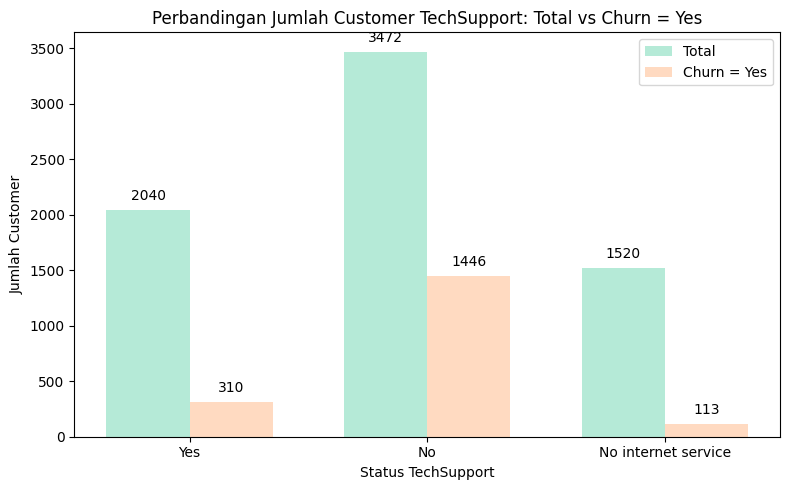

TechSupport = Yes: Total = 2040, Churn = 310 (15.2%)
TechSupport = No: Total = 3472, Churn = 1446 (41.65%)
TechSupport = No internet service: Total = 1520, Churn = 113 (7.43%)


In [69]:
# Total pelanggan berdasarkan TechSupport
total_tech = df['TechSupport'].value_counts().reindex(['Yes', 'No', 'No internet service'])

# Pelanggan churn='Yes' berdasarkan TechSupport
churn_tech = df[df['Churn'] == 'Yes']['TechSupport'].value_counts().reindex(['Yes', 'No', 'No internet service'], fill_value=0)

# Persentase churn
tech_total = total_tech
tech_churn = churn_tech
tech_churn_pct = round((tech_churn / tech_total) * 100, 2)

# Plot bar chart
labels = ['Yes', 'No', 'No internet service']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, tech_total.values, width, label='Total', color='#b5ead7')
bars2 = ax.bar(x + width/2, tech_churn.values, width, label='Churn = Yes', color='#ffdac1')

# Tambahkan label nilai di atas bar
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer TechSupport: Total vs Churn = Yes')
ax.set_xlabel('Status TechSupport')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
for status in labels:
    print(f"TechSupport = {status}: Total = {tech_total[status]}, Churn = {tech_churn[status]} ({tech_churn_pct[status]}%)")


Interpretasi

* **Sebagian besar pelanggan tidak menggunakan layanan TechSupport** — hampir **dua kali lebih banyak** dibanding yang menggunakannya.
* **Tingkat churn jauh lebih tinggi pada pelanggan tanpa TechSupport**:

  * **Dengan TechSupport**: hanya **15.2%** yang churn.
  * **Tanpa TechSupport**: **41.65%** yang churn — hampir **tiga kali lipat**.
  * **Tanpa layanan internet**: churn tetap rendah (**7.43%**).

**Kesimpulan**: **Tidak adanya TechSupport berkorelasi kuat dengan churn**. Memberikan akses yang mudah ke layanan bantuan teknis bisa meningkatkan loyalitas pelanggan secara signifikan.

#### **14. Perbandingan Data Pengguna Fiture Steaming TV yang memutuskan untuk Churn**

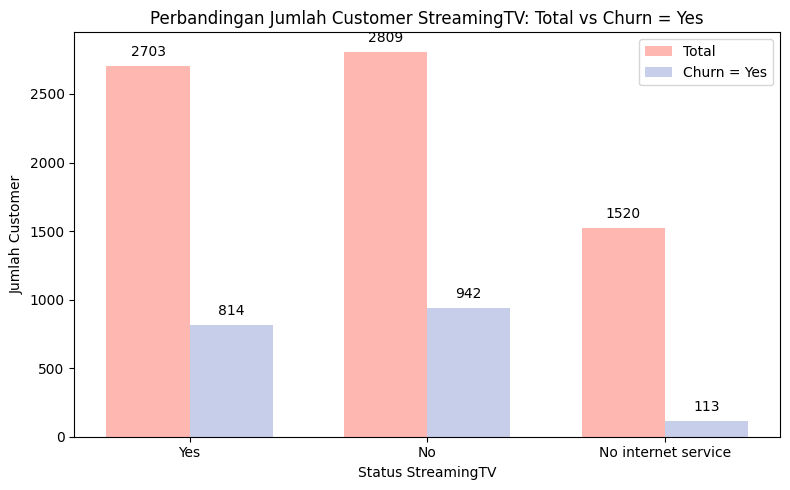

StreamingTV = Yes: Total = 2703, Churn = 814 (30.11%)
StreamingTV = No: Total = 2809, Churn = 942 (33.54%)
StreamingTV = No internet service: Total = 1520, Churn = 113 (7.43%)


In [70]:
# Total pelanggan berdasarkan StreamingTV
total_streamingtv = df['StreamingTV'].value_counts().reindex(['Yes', 'No', 'No internet service'])

# Pelanggan churn='Yes' berdasarkan StreamingTV
churn_streamingtv = df[df['Churn'] == 'Yes']['StreamingTV'].value_counts().reindex(['Yes', 'No', 'No internet service'], fill_value=0)

# Persentase churn
streamingtv_total = total_streamingtv
streamingtv_churn = churn_streamingtv
streamingtv_churn_pct = round((streamingtv_churn / streamingtv_total) * 100, 2)

# Plot bar chart
labels = ['Yes', 'No', 'No internet service']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, streamingtv_total.values, width, label='Total', color='#ffb7b2')
bars2 = ax.bar(x + width/2, streamingtv_churn.values, width, label='Churn = Yes', color='#c7ceea')

# Tambahkan label nilai di atas bar
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer StreamingTV: Total vs Churn = Yes')
ax.set_xlabel('Status StreamingTV')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
for status in labels:
    print(f"StreamingTV = {status}: Total = {streamingtv_total[status]}, Churn = {streamingtv_churn[status]} ({streamingtv_churn_pct[status]}%)")


Interpretasi

* **Jumlah pelanggan dengan dan tanpa StreamingTV hampir seimbang**.
* **Tingkat churn sedikit lebih rendah pada pelanggan yang menggunakan layanan StreamingTV**:

  * **Dengan StreamingTV**: **30.11%** churn.
  * **Tanpa StreamingTV**: **33.54%** churn — sedikit lebih tinggi.
  * **Tanpa layanan internet**: churn tetap rendah (**7.43%**).

**Kesimpulan**: **StreamingTV tampaknya tidak memiliki pengaruh besar terhadap churn** — perbedaan churn antara pengguna dan non-pengguna relatif kecil. Namun, tetap ada indikasi bahwa pelanggan yang memanfaatkan layanan hiburan lebih cenderung bertahan.


#### **15. Perbandingan Data Pengguna Fiture Streaming Movies yang memutuskan untuk Churn**

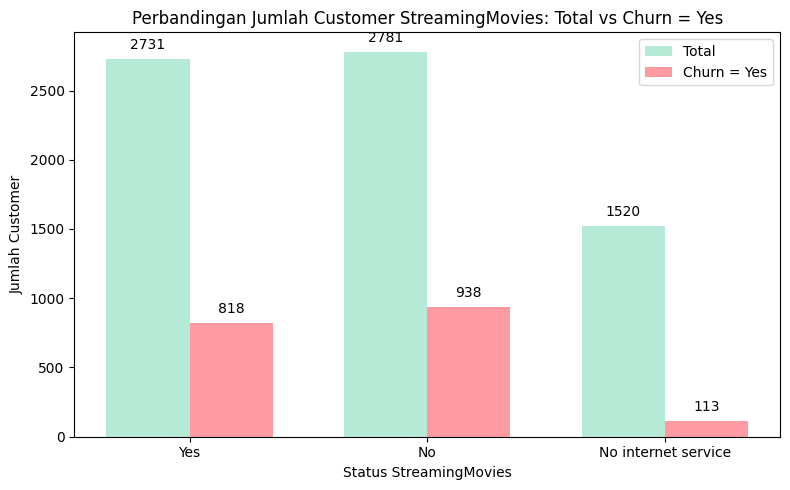

StreamingMovies = Yes: Total = 2731, Churn = 818 (29.95%)
StreamingMovies = No: Total = 2781, Churn = 938 (33.73%)
StreamingMovies = No internet service: Total = 1520, Churn = 113 (7.43%)


In [71]:
# Total pelanggan berdasarkan StreamingMovies
total_streamingmovies = df['StreamingMovies'].value_counts().reindex(['Yes', 'No', 'No internet service'])

# Pelanggan churn='Yes' berdasarkan StreamingMovies
churn_streamingmovies = df[df['Churn'] == 'Yes']['StreamingMovies'].value_counts().reindex(['Yes', 'No', 'No internet service'], fill_value=0)

# Persentase churn
streamingmovies_total = total_streamingmovies
streamingmovies_churn = churn_streamingmovies
streamingmovies_churn_pct = round((streamingmovies_churn / streamingmovies_total) * 100, 2)

# Plot bar chart
labels = ['Yes', 'No', 'No internet service']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, streamingmovies_total.values, width, label='Total', color='#b5ead7')
bars2 = ax.bar(x + width/2, streamingmovies_churn.values, width, label='Churn = Yes', color='#ff9aa2')

# Tambahkan label nilai di atas bar
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

# Judul dan label
ax.set_title('Perbandingan Jumlah Customer StreamingMovies: Total vs Churn = Yes')
ax.set_xlabel('Status StreamingMovies')
ax.set_ylabel('Jumlah Customer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Cetak informasi persentase churn
for status in labels:
    print(f"StreamingMovies = {status}: Total = {streamingmovies_total[status]}, Churn = {streamingmovies_churn[status]} ({streamingmovies_churn_pct[status]}%)")


Interpretasi

* **Jumlah pelanggan dengan dan tanpa layanan StreamingMovies hampir seimbang**.

* **Tingkat churn sedikit lebih rendah pada pelanggan yang menggunakan layanan StreamingMovies**:

  * **Dengan StreamingMovies**: **29.95%** churn.
  * **Tanpa StreamingMovies**: **33.73%** churn — sedikit lebih tinggi.
  * **Tanpa layanan internet**: churn tetap rendah (**7.43%**).

**Kesimpulan**: **Layanan StreamingMovies tampaknya memiliki pengaruh kecil namun positif terhadap retensi pelanggan**. Pelanggan yang menggunakan layanan ini menunjukkan tingkat churn yang lebih rendah dibandingkan yang tidak menggunakannya. Namun, perbedaannya tidak terlalu signifikan. Sementara itu, pelanggan tanpa layanan internet tetap memiliki churn yang jauh lebih rendah, kemungkinan karena keterbatasan pilihan atau kebutuhan komunikasi dasar yang lebih kuat.


#### **16. Melakukan Uji-Statistik terhadap Fiture Numerikal**

Sebelum memulai analisis, mari gunakan uji statistik **Kolmogorov-Smirnov** untuk melihat apakah hasil distribusi untuk kolom numerik merupakan normal atau tidak normal

In [72]:
import pandas as pd
from scipy.stats import kstest

# List untuk menyimpan hasil
hasil_ks = []

# Iterasi untuk uji Kolmogorov-Smirnov di setiap kolom
for kolom in kolom_numerik:
    ks_statistic, ks_pvalue = kstest(df[kolom], 'norm')  # Distribusi normal
    hasil_ks.append({
        'Kolom': kolom,
        'KS_Statistic': ks_statistic,
        'P_Value': ks_pvalue,
        'Distribusi_Normal': 'Ya' if ks_pvalue > 0.05 else 'Tidak'
    })

# Konversi hasil ke DataFrame
df_hasil_ks = pd.DataFrame(hasil_ks)

# Tampilkan hasil dalam bentuk tabel
df_hasil_ks

,Kolom,KS_Statistic,P_Value,Distribusi_Normal
0,tenure,0.890077,0.0,Tidak
1,MonthlyCharges,1.000000,0.0,Tidak
2,TotalCharges,1.000000,0.0,Tidak


Berdasarkan hasil uji statistik Kolmogorov-Smirnov, apabila p_value > 0,05 maka data distribusi normal sedangkan pada semua kolom numerik p_value = 0,0 sehingga dapat dibuktikan bahwa semua **kolom numerik merupakan data distribusi tidak normal**.

##### **1). Analisis hubungan lama berlangganan *(tenure)* terhadap kemungkinan pelanggan melakukan churn**

> Tenure mencerminkan loyalitas. Mengetahui hubungan ini bisa membantu perusahaan menarget pelanggan baru yang lebih rawan churn.

In [73]:
# Mengubah nilai churn dari Yes: 1 dan No: 0 dengan menambah kolom baru
df['Churn_num'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [74]:
# Menghitung jumlah churn (1) dan non churn (0)
df['Churn_num'].value_counts()

Churn_num
0    5163
1    1869
Name: count, dtype: int64

Hipotesis:
- **H₀ (Hipotesis Nol)**: Tidak terdapat hubungan dalam lama berlangganan antara pelanggan yang churn dan yang tidak.
- **H₁ (Hipotesis Alternatif)**: Terdapat hubungan signifikan dalam lama berlangganan antara pelanggan yang churn dan yang tidak.

In [75]:
# Untuk melakukan pengujian dengan lebih akurat mari gunakan uji korelasi Spearman
# Korelasi Spearman
from scipy.stats import spearmanr

# Korelasi Spearman
corr, p_value = spearmanr(df['tenure'], df['Churn_num'])
print(f"Koefisien Korelasi Spearman: {corr:.2f}")
print(f"P-value: {p_value: .2f}")

Koefisien Korelasi Spearman: -0.37
P-value:  0.00


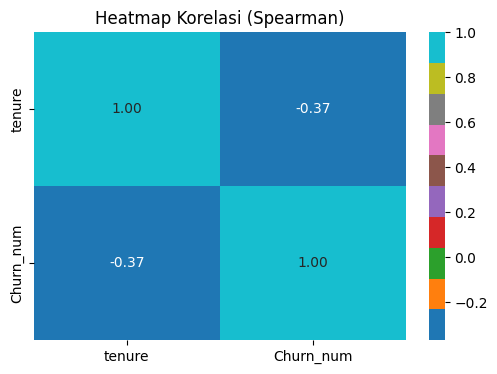

In [76]:
# Visualisasi dengan heatmap

# Hitung matriks korelasi Spearman secara manual
correlation_matrix = df[['tenure', 'Churn_num']].corr(method='spearman')

plt.figure(figsize=(6, 4))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='tab10', 
    fmt='.2f', 
    cbar=True
)
plt.title('Heatmap Korelasi (Spearman)')
plt.show()

Dari hasil analisis diatas, dapat disampaikan sbb:
- H0 ditolak apabila p_value < 0,05. P-value = 0.00, artinya H0 ditolak: Ada hubungan signifikan antara status churn dan lama berlangganan
- Koefisien Korelasi Spearman = -0.37:
  - Korelasi negatif menunjukkan bahwa **semakin lama pelanggan berlangganan**, **semakin kecil kemungkinan mereka untuk churn**.
  - Atau sebaliknya, **pelanggan yang baru berlangganan cenderung lebih mungkin churn**.

KESIMPULAN
- Terdapat **hubungan negatif yang signifikan secara statistik** antara lama berlangganan dan status churn. 
- Pelanggan yang sudah berlangganan **lebih lama** cenderung **lebih loyal dan tidak churn**.

C:\Users\User\AppData\Local\Temp\ipykernel_15288\3222559579.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_dist = df.groupby(['tenure_group', 'Churn_num']).size().unstack(fill_value=0)


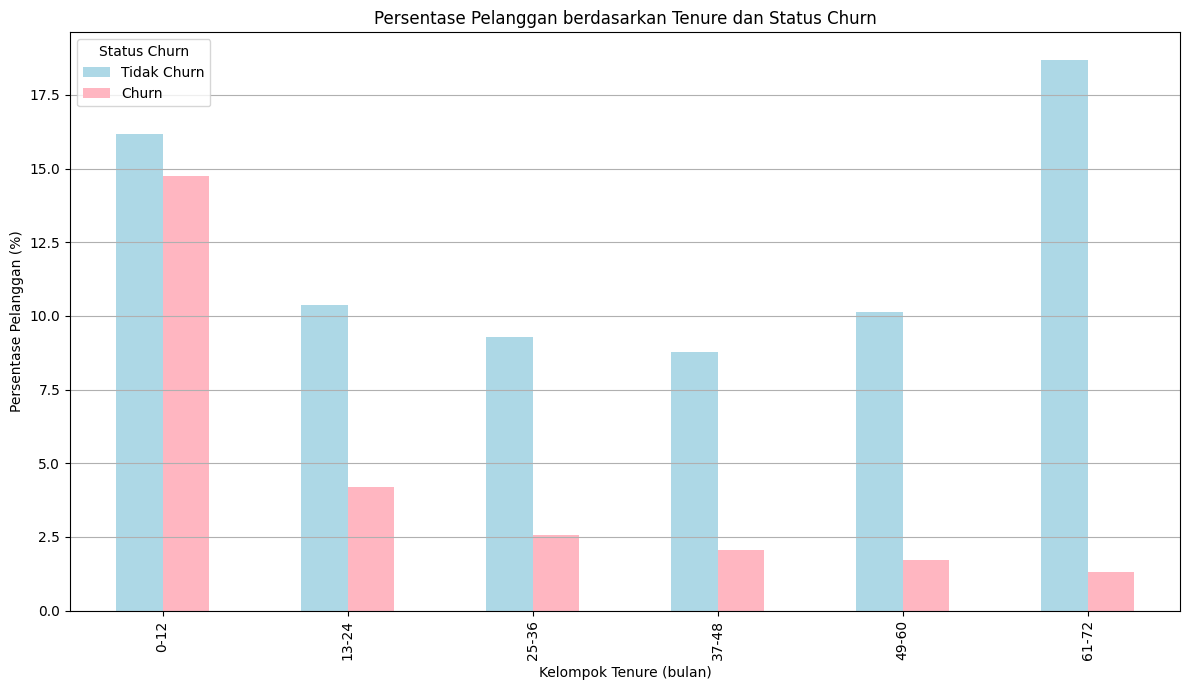

In [77]:
# Binning tenure ke dalam kelompok
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

# Hitung distribusi churn/non-churn per kelompok tenure
tenure_dist = df.groupby(['tenure_group', 'Churn_num']).size().unstack(fill_value=0)

# Ubah ke persentase dalam setiap kelompok tenure
tenure_percent = tenure_dist.div(tenure_dist.sum().sum(), axis=0) * 100

# Rename kolom agar lebih jelas
tenure_percent.columns = ['Tidak Churn', 'Churn']

# Plot bar vertikal dengan warna soft blue dan pink
colors = ['#ADD8E6', '#FFB6C1']  # soft blue, soft pink

tenure_percent.sort_index(ascending=True).plot(
    kind='bar',
    figsize=(12, 7),
    color=colors
)

plt.title('Persentase Pelanggan berdasarkan Tenure dan Status Churn')
plt.ylabel('Persentase Pelanggan (%)')
plt.xlabel('Kelompok Tenure (bulan)')
plt.legend(title='Status Churn', loc='upper left')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


Grafik menunjukkan distribusi **persentase pelanggan** berdasarkan **kelompok lama berlangganan (tenure)** dan status **Churn** (berhenti berlangganan atau tidak).

- **Kelompok 0–12 bulan** memiliki tingkat churn tertinggi, hampir sebanding dengan yang tidak churn. Ini menunjukkan pelanggan baru lebih rentan untuk berhenti.
- Setelah 12 bulan, **tingkat churn menurun drastis**, sementara pelanggan yang tidak churn stabil.
- **Kelompok tenure tertinggi (61–72 bulan)** didominasi oleh pelanggan yang **tidak churn**. Artinya, **semakin lama pelanggan bertahan, semakin kecil kemungkinan mereka untuk berhenti.**
  
**Kesimpulan**
- Pelanggan baru perlu perhatian khusus karena mereka paling berisiko untuk churn.
- Strategi retensi sebaiknya difokuskan pada fase awal langganan (0–12 bulan).

##### **2). Analisis hubungan jenis kontrak terhadap probabilitas pelanggan berhenti berlangganan *(churn)***

> Jenis kontrak (bulanan vs tahunan) adalah faktor bisnis yang bisa diubah dengan strategi pemasaran. Jika kontrak tahunan terbukti menurunkan churn, perusahaan bisa mengarahkan pelanggan ke kontrak jangka panjang.

In [78]:
# Menampilkan nilai unik dari variable Contract
df['Contract'].unique()

['Month-to-month', 'One year', 'Two year']
Categories (3, object): ['Month-to-month', 'One year', 'Two year']

Karena memiliki kategori yang bersifat ordinal/logis, yaitu: *Month-to-month*, *One year*, dan *Two year* maka akan diterapkan **Ordinal Encoding**

In [79]:
# Mengubah nilai unik *Month-to-month*, *One year*, dan *Two year* menjadi 0,1,2 dengan urutan ordinal pada kolom baru
contract_mapping = {
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}

df['Contract_encoded'] = df['Contract'].map(contract_mapping)

In [80]:
# Menampilkan nilai kolom Contract_encoded yang sudah diubah menjadi numerik
df['Contract_encoded'].head(3)

0    0
1    1
2    0
Name: Contract_encoded, dtype: category
Categories (3, int64): [0, 1, 2]

In [81]:
# Menghitung jumlah dan persentase pelanggan yang mempunyai kontrak *Month-to-month* (0), *One year* (1), dan *Two year* (2)

# Jumlah
jumlah = df['Contract_encoded'].value_counts()

# Persentase
persentase = df['Contract_encoded'].value_counts(normalize=True) * 100

#  Gabungkan dan urutkan
kontrak_stats = pd.DataFrame({
    'Jumlah': jumlah,
    'Persentase (%)': persentase.round(2)
}).sort_values(by='Jumlah', ascending=False)

# Mapping nilai Contract_encoded ke nama kontrak
mapping_kontrak = {
    0: 'Month-to-month',
    1: 'One year',
    2: 'Two year'
}

# Reset index agar Contract_encoded menjadi kolom biasa
kontrak_stats = kontrak_stats.reset_index()

# Ganti nama kolom dan isi dengan label deskriptif
kontrak_stats.rename(columns={'Contract_encoded': 'Jenis Kontrak'}, inplace=True)
kontrak_stats['Jenis Kontrak'] = kontrak_stats['Jenis Kontrak'].map(mapping_kontrak)

kontrak_stats

,Jenis Kontrak,Jumlah,Persentase (%)
0,Month-to-month,3875,55.11
1,Two year,1685,23.96
2,One year,1472,20.93


Hipotesis:
- **H₀ (Hipotesis Nol)**: Tidak terdapat hubungan antara jenis kontrak dan status churn pelanggan.
- **H₁ (Hipotesis Alternatif)**: Terdapat hubungan yang signifikan antara jenis kontrak dan status churn pelanggan.

In [82]:
# Untuk melakukan pengujian dengan lebih akurat mari gunakan uji korelasi Spearman
# Korelasi Spearman
from scipy.stats import spearmanr

# Korelasi Spearman
corr, p_value = spearmanr(df['Contract_encoded'], df['Churn_num'])
print(f"Koefisien Korelasi Spearman: {corr:.2f}")
print(f"P-value: {p_value: .2f}")

Koefisien Korelasi Spearman: -0.41
P-value:  0.00


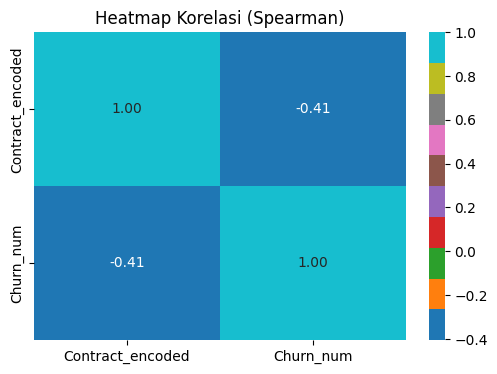

In [83]:
# Visualisasi dengan heatmap

# Hitung matriks korelasi Spearman secara manual
correlation_matrix = df[['Contract_encoded', 'Churn_num']].corr(method='spearman')

plt.figure(figsize=(6, 4))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='tab10', 
    fmt='.2f', 
    cbar=True
)
plt.title('Heatmap Korelasi (Spearman)')
plt.show()

Dari hasil analisis tsb, dapat disimpulkan yaitu:
- **P-value = 0.00** (lebih kecil dari 0.05) menandakan bahwa hasil ini signifikan secara statistik, sehingga kita **menolak H₀ dan menerima H₁**. 
  - Terdapat hubungan yang signifikan antara jenis kontrak dan status churn pelanggan. Dengan kata lain, jenis kontrak memang memengaruhi kemungkinan pelanggan untuk berhenti berlangganan.
- Nilai **koefisien korelasi -0.41** menunjukkan adanya **hubungan negatif sedang** antara jenis kontrak dan churn — artinya, semakin panjang atau mengikat jenis kontraknya (misalnya kontrak tahunan), maka kemungkinan pelanggan untuk churn (berhenti) cenderung lebih rendah.



C:\Users\User\AppData\Local\Temp\ipykernel_15288\3762597147.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_churn = df[df['Churn'] == 'Yes'].groupby('Contract').size()
C:\Users\User\AppData\Local\Temp\ipykernel_15288\3762597147.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_total = df.groupby('Contract').size()


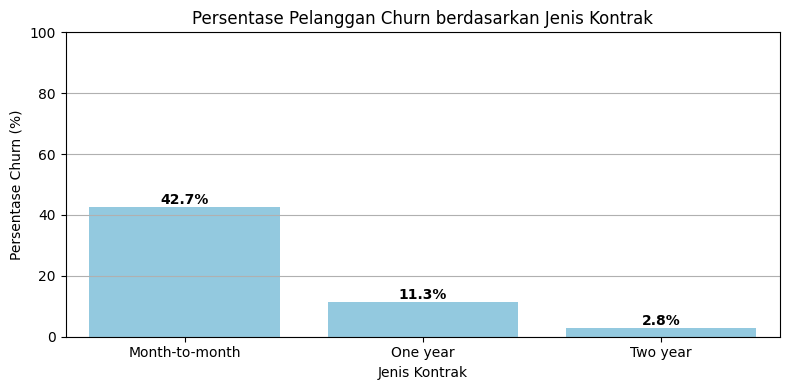

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung jumlah churn = Yes untuk tiap jenis kontrak
contract_churn = df[df['Churn'] == 'Yes'].groupby('Contract').size()

# Hitung total pelanggan untuk tiap jenis kontrak
contract_total = df.groupby('Contract').size()

# Hitung persentase churn untuk tiap jenis kontrak
churn_percent = (contract_churn / contract_total * 100).reset_index(name='Churn_percent')

# Buat bar chart
plt.figure(figsize=(8, 4))
barplot = sns.barplot(x='Contract', y='Churn_percent', data=churn_percent, color='skyblue')

# Tambahkan label persentase di atas bar
for index, row in churn_percent.iterrows():
    barplot.text(index, row['Churn_percent'] + 1, f"{row['Churn_percent']:.1f}%", 
                 color='black', ha="center", fontweight='bold')

# Tambahkan label dan judul
plt.title('Persentase Pelanggan Churn berdasarkan Jenis Kontrak')
plt.xlabel('Jenis Kontrak')
plt.ylabel('Persentase Churn (%)')
plt.ylim(0, 100)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


**SUMMARY**
- **Month-to-month (Bulanan)**:  
  - Tingkat churn sebesar **42.7%**
  - Ini adalah tingkat churn tertinggi.
  - Pelanggan dengan kontrak ini memiliki fleksibilitas tinggi, sehingga cenderung lebih mudah untuk berhenti berlangganan.

- **One year (Satu Tahun)**:  
  - Tingkat churn sebesar **11.3%**
  - Lebih rendah dibanding kontrak bulanan.
  - Pelanggan tampaknya lebih berkomitmen dengan kontrak tahunan.

- **Two year (Dua Tahun)**:  
  - Tingkat churn hanya **2.8%**
  - Ini adalah tingkat churn terendah.
  - Menunjukkan bahwa kontrak jangka panjang sangat efektif dalam mempertahankan pelanggan.

**Kesimpulan**
- Terdapat hubungan yang kuat antara jenis kontrak dan kemungkinan pelanggan melakukan churn. **Semakin panjang durasi kontrak, semakin kecil peluang pelanggan untuk berhenti berlangganan.**

*Visualisasi ini memperkuat hasil analisis korelasi sebelumnya, di mana ditemukan bahwa jenis kontrak memiliki hubungan negatif signifikan dengan churn pelanggan.*


##### **3). Analisis perbedaan signifikan rata-rata tagihan bulanan *(MonthlyCharges)* antara pelanggan yang churn dan yang tidak**

> Jika pelanggan yang bayar lebih mahal lebih sering churn, perusahaan perlu meninjau ulang paket atau harga. Ini menyentuh strategi pricing.

Hipotesis:
- **H₀ (Hipotesis Nol)**: Tidak terdapat perbedaan rata-rata tagihan bulanan antara pelanggan churn dan tidak.
- **H₁ (Hipotesis Alternatif)**: Terdapat perbedaan rata-rata tagihan bulanan antara pelanggan churn dan tidak.

In [85]:
# Import modul untuk Mann-Whitney U Test
from scipy.stats import mannwhitneyu

# Cek median tiap grup
df.groupby('Churn_num')['MonthlyCharges'].median()

# Melakukan Mann-Whitney U Test
stat, pvalue = mannwhitneyu(
    df[df['Churn_num'] == 1]['MonthlyCharges'],
    df[df['Churn_num'] == 0]['MonthlyCharges']
)

# Menampilkan p-value
print('P-value:', pvalue)

# Interpretasi sederhana
if pvalue < 0.05:
    print("Terdapat perbedaan rata-rata tagihan bulanan antara pelanggan churn dan tidak")
else:
    print("Tidak terdapat perbedaan rata-rata tagihan bulanan antara pelanggan churn dan tidak")

P-value: 8.467195044548749e-54
Terdapat perbedaan rata-rata tagihan bulanan antara pelanggan churn dan tidak


C:\Users\User\AppData\Local\Temp\ipykernel_15288\2494436315.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Churn_num')['MonthlyCharges'].median()


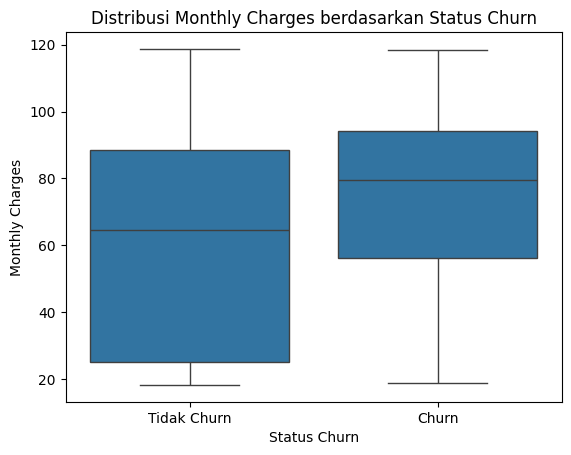

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Churn_num', y='MonthlyCharges', data=df)
plt.xticks([0, 1], ['Tidak Churn', 'Churn'])
plt.title('Distribusi Monthly Charges berdasarkan Status Churn')
plt.xlabel('Status Churn')
plt.ylabel('Monthly Charges')
plt.show()


**SUMMARY**

1. Pelanggan yang Churn biasanya bayar lebih mahal.
   - Rata-rata (median) biaya bulanan mereka lebih tinggi dibanding yang tidak churn.
2. Pelanggan yang Tidak Churn lebih banyak yang bayar murah.
   - Banyak dari mereka yang biaya bulanannya lebih rendah.
3. Rentang biaya bulanan kedua kelompok mirip.
   - Tapi pola distribusinya berbeda: yang Churn lebih terkonsentrasi di biaya tinggi.

**KESIMPULAN**
- Pelanggan yang membayar **lebih mahal setiap bulan cenderung lebih sering berhenti** (Churn).

## **V. Data Preprocessing**

### **Feature Engineering**

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 non-nu

In [88]:
# Preprocessing
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile

# Imbalance Dataset
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Modeling 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Evaluation
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score, balanced_accuracy_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay

Drop kolom yang sebelumnya dilakukan untuk encoding manual seperti 'Churn_num', 'tenure_group', 'Contract_encoded', karena sbb:
1. Mengandung informasi duplikat yang sudah direpresentasikan ulang => bisa bikin model overfit.
2. Bisa menyebabkan data leakage kalau kolom turunan dari target (misal 'Churn_num' dari 'Churn').
3. Bisa membuat hasil encoding/pipeline jadi ambigu atau tumpang tindih.

In [89]:
#  Drop kolom 'Churn_num', 'tenure_group', 'Contract_encoded', dan 'CustomerID'
df = df.drop(columns=['Churn_num', 'tenure_group', 'Contract_encoded', 'customerID'], errors='ignore')

In [90]:
# Menampilkan hasil setelah 3 variable tsb di drop, maka kembali pada 20 kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   category
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   category
 16  PaymentMethod     7032 non-nu

#### **Encoding**

In [91]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

  - **One-Hot Encoding:**  
    Digunakan untuk fitur dengan lebih dari dua kategori atau kategori yang tidak memiliki urutan logis:  
    `gender`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, dan `PaymentMethod`.  
    Dengan teknik ini, setiap kategori akan direpresentasikan dalam bentuk kolom terpisah dengan nilai biner, sehingga menghindari asumsi urutan atau skala yang keliru oleh model.

  - **Ordinal Encoding:**  
    Diterapkan pada fitur `Contract`, karena memiliki kategori yang bersifat ordinal/logis, yaitu: *Month-to-month*, *One year*, dan *Two year*.  
    Ketiga kategori ini memiliki urutan yang mencerminkan komitmen waktu, sehingga representasi numerik berurutan dapat memberikan informasi tambahan yang relevan bagi model.

In [92]:
# Mengubah 'No internet service' dan 'No phone service' menjadi 'No'
service_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in service_cols:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

# Encoder
onehot = OneHotEncoder(drop = 'first', sparse_output=False)
ordinal = OrdinalEncoder()

# Definisikan variable
onehot_var = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod','SeniorCitizen','gender','Partner','Dependents', 'PhoneService', 'PaperlessBilling']
ordinal_var = ['Contract']

# Mengubah target atau y menjadi numerik (di luar pipeline)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# ColumnTransformer
transformer = ColumnTransformer([
    ('onehot', onehot, onehot_var),
    ('ordinal', ordinal, ordinal_var)
], remainder='passthrough')

C:\Users\User\AppData\Local\Temp\ipykernel_15288\3314701058.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})


**Splitting Data : Stratified Random Sampling**

In [93]:
# Define Target & Feature
y = df['Churn']
x = df.drop(columns = ['Churn'])

# Splitting
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    stratify = y,
    test_size = 0.2, 
    random_state = 2025
)

In [94]:
# Fit to x_train
testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
testing.head()

,onehot__MultipleLines_Yes,onehot__InternetService_Fiber optic,onehot__InternetService_No,onehot__OnlineSecurity_Yes,onehot__OnlineBackup_Yes,onehot__DeviceProtection_Yes,onehot__TechSupport_Yes,onehot__StreamingTV_Yes,onehot__StreamingMovies_Yes,onehot__PaymentMethod_Credit card (automatic),...,onehot__SeniorCitizen_Yes,onehot__gender_Male,onehot__Partner_Yes,onehot__Dependents_Yes,onehot__PhoneService_Yes,onehot__PaperlessBilling_Yes,ordinal__Contract,remainder__tenure,remainder__MonthlyCharges,remainder__TotalCharges
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,60.40,272.15
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,24.0,79.65,1928.70
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,39.0,81.90,3219.75
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,79.90,324.30
4,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,65.0,111.05,7107.00


In [95]:
print(testing.dtypes)

onehot__MultipleLines_Yes                        float64
onehot__InternetService_Fiber optic              float64
onehot__InternetService_No                       float64
onehot__OnlineSecurity_Yes                       float64
onehot__OnlineBackup_Yes                         float64
onehot__DeviceProtection_Yes                     float64
onehot__TechSupport_Yes                          float64
onehot__StreamingTV_Yes                          float64
onehot__StreamingMovies_Yes                      float64
onehot__PaymentMethod_Credit card (automatic)    float64
onehot__PaymentMethod_Electronic check           float64
onehot__PaymentMethod_Mailed check               float64
onehot__SeniorCitizen_Yes                        float64
onehot__gender_Male                              float64
onehot__Partner_Yes                              float64
onehot__Dependents_Yes                           float64
onehot__PhoneService_Yes                         float64
onehot__PaperlessBilling_Yes   

In [96]:
testing.columns

Index(['onehot__MultipleLines_Yes', 'onehot__InternetService_Fiber optic',
       'onehot__InternetService_No', 'onehot__OnlineSecurity_Yes',
       'onehot__OnlineBackup_Yes', 'onehot__DeviceProtection_Yes',
       'onehot__TechSupport_Yes', 'onehot__StreamingTV_Yes',
       'onehot__StreamingMovies_Yes',
       'onehot__PaymentMethod_Credit card (automatic)',
       'onehot__PaymentMethod_Electronic check',
       'onehot__PaymentMethod_Mailed check', 'onehot__SeniorCitizen_Yes',
       'onehot__gender_Male', 'onehot__Partner_Yes', 'onehot__Dependents_Yes',
       'onehot__PhoneService_Yes', 'onehot__PaperlessBilling_Yes',
       'ordinal__Contract', 'remainder__tenure', 'remainder__MonthlyCharges',
       'remainder__TotalCharges'],
      dtype='object')

In [97]:
testing.shape

(5625, 22)

#### **Check Multikolinearitas**

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Hitung VIF
vif = pd.DataFrame()
vif["feature"] = testing.columns
vif["VIF"] = [variance_inflation_factor(testing.values, i) for i in range(testing.shape[1])]

# Lihat hasil
vif.sort_values("VIF", ascending=False)


,feature,VIF
20,remainder__MonthlyCharges,211.858697
16,onehot__PhoneService_Yes,47.713608
21,remainder__TotalCharges,21.215828
19,remainder__tenure,20.409121
1,onehot__InternetService_Fiber optic,17.550829
2,onehot__InternetService_No,8.217178
8,onehot__StreamingMovies_Yes,5.023562
7,onehot__StreamingTV_Yes,4.917753
18,ordinal__Contract,4.255909
10,onehot__PaymentMethod_Electronic check,3.031151


> Banyak fitur yang multico nya tinggi sehingga diperlukan tindakan perbaikan refer dari cara handle multico pada tahap EDA

In [99]:
vif.shape

(22, 2)

In [100]:
df.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4355,Female,No,Yes,No,6,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,50.35,314.55,0
4096,Female,No,No,No,20,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),89.40,1871.15,0
2320,Male,No,Yes,Yes,63,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),89.40,5597.65,0


In [101]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [102]:
# Untuk perbandingan hasil modelling sesudah handle multikolinearitas
df_after = df.copy()

# Binarisasi fitur layanan
service_features = ['StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'MultipleLines']

for col in service_features:
    df_after[col] = df_after[col].astype(str).replace({
        'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0
    }).astype(int)

# Fitur baru pengganti InternetService & PhoneService
df_after['HasInternetSrv'] = df_after['InternetService'].apply(lambda x: 0 if x == 'No' else 1).astype(int)
df_after['HasPhoneSrv'] = df_after['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)

# Drop fitur multikolinearitas tinggi / redundant
df_after = df_after.drop(columns=['InternetService', 'PhoneService', 'MonthlyCharges', 'tenure', 'TotalCharges'])

# Definisikan kembali fitur encoder AFTER
onehot_var_after = ['PaymentMethod', 'SeniorCitizen', 'gender', 'Partner',
                    'Dependents', 'PaperlessBilling']
ordinal_var_after = ['Contract']

x_after = df_after.drop(columns='Churn')
y_after = df_after['Churn']

x_train_after, x_test_after, y_train_after, y_test_after = train_test_split(
    x_after, y_after, stratify=y_after, test_size=0.2, random_state=2025
)

transformer_after = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', sparse_output=False), onehot_var_after),
    ('ordinal', OrdinalEncoder(), ordinal_var_after),
], remainder='passthrough')


C:\Users\User\AppData\Local\Temp\ipykernel_15288\442774632.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_after[col] = df_after[col].astype(str).replace({
C:\Users\User\AppData\Local\Temp\ipykernel_15288\442774632.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_after[col] = df_after[col].astype(str).replace({
C:\Users\User\AppData\Local\Temp\ipykernel_15288\442774632.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly ca

In [103]:
df_after.dtypes

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
MultipleLines          int64
OnlineSecurity         int64
OnlineBackup           int64
DeviceProtection       int64
TechSupport            int64
StreamingTV            int64
StreamingMovies        int64
Contract            category
PaperlessBilling    category
PaymentMethod       category
Churn               category
HasInternetSrv         int64
HasPhoneSrv            int64
dtype: object

In [104]:
# Pengecekan VIF setelah atasi multiko
# Transform data (hasilnya array numpy)
x_encoded = transformer_after.fit_transform(x_after)

# 2. Konversi ke DataFrame untuk VIF
df_encoded = pd.DataFrame(
    x_encoded,
    columns=transformer_after.get_feature_names_out()
)

# 3. Hitung VIF
vif = pd.DataFrame()
vif["feature"] = df_encoded.columns
vif["VIF"] = [variance_inflation_factor(df_encoded.values, i) 
              for i in range(df_encoded.shape[1])]

vif.sort_values("VIF", ascending=False)

,feature,VIF
16,remainder__HasInternetSrv,8.159280
17,remainder__HasPhoneSrv,6.506549
7,onehot__PaperlessBilling_Yes,2.873034
5,onehot__Partner_Yes,2.688966
1,onehot__PaymentMethod_Electronic check,2.639628
15,remainder__StreamingMovies,2.633821
14,remainder__StreamingTV,2.594086
8,ordinal__Contract,2.583946
12,remainder__DeviceProtection,2.222436
9,remainder__MultipleLines,2.219111


In [105]:
vif.shape

(18, 2)

#### **Scaling**

Scaling akan diterapkan **khusus pada model yang sensitif terhadap skala fitur**, seperti **Logistic Regression** dan **K-Nearest Neighbors (KNN)**. Sementara itu, **model berbasis pohon** seperti **Decision Tree, Random Forest, XGBoost, dan LightGBM** tidak memerlukan proses scaling. Hal ini disebabkan oleh sifat tree-based models yang tidak mengandalkan asumsi distribusi normal maupun perhitungan jarak antar titik data.

Sebaliknya, menerapkan scaling pada model pohon justru dapat mengganggu interpretasi serta struktur pohon yang dihasilkan. Berdasarkan pengalaman Rodrigue Tchamna, seorang Data Scientist di Eos Energy Enterprises, Inc., penggunaan scaling pada XGBoost terbukti menurunkan performa prediktif dibandingkan dengan data yang tidak di-scale.

Referensi:
- https://sebastianraschka.com/faq/docs/when-to-standardize.html
- https://towardsdatascience.com/which-models-require-normalized-data-d85ca3c85388
- https://www.linkedin.com/pulse/effect-feature-scaling-xgboost-rodrigue-tchamna-phd/


Tiga fitur numerik yang dianalisis dalam dataset ini yaitu `tenure`, `MonthlyCharges`, `TotalCharges`
- Berdasarkan visualisasi histogram, KDE, dan boxplot, serta perhitungan statistik menggunakan metode IQR:
  - Tidak ditemukan outlier secara statistik pada ketiga fitur.
  - Namun, distribusi `TotalCharges` dan `MonthlyCharges` terlihat cukup **skewed ke kanan (right-skewed)**.
  - Kondisi ini berpotensi menyebabkan skala fitur tidak seimbang dalam model tertentu.
- Meskipun analisis IQR tidak mendeteksi outlier secara teknis, terdapat indikasi bahwa beberapa fitur numerik memiliki **distribusi yang miring** dan rentan terhadap nilai ekstrim jika data berubah di masa depan. Oleh karena itu:
> **`RobustScaler`** dipilih karena lebih **tahan terhadap distribusi yang skewed** dan nilai ekstrim. Scaler ini menggunakan median dan IQR sehingga lebih stabil dibanding `StandardScaler` saat distribusi data tidak simetris sempurna.


In [106]:
# Define Scaler
scaler = RobustScaler()

## **VI. Modelling & Evaluation**

### MODEL SELECTION

Pada tahap pemodelan, akan diterapkan sejumlah algoritma machine learning, sebagai berikut:

**1. Logistic Regression**  
- **Deskripsi**: Model linier yang memprediksi probabilitas suatu kelas (misalnya churn: Yes/No).  
- **Karakteristik**:  
  - Output berupa probabilitas (0 - 1).  
  - Klasifikasi berdasarkan threshold (biasanya 0.5).  
- **Kelebihan**:  
  - Cepat dan sederhana.  
  - Mudah dijelaskan (koefisien menunjukkan pengaruh fitur).  
- **Kekurangan**:  
  - Tidak cocok untuk data non-linear.  
  - Terbatas untuk kasus kompleks atau interaksi banyak fitur.  

**2. K-Nearest Neighbors (KNN)**  
- **Deskripsi**: Mengklasifikasikan berdasarkan mayoritas label dari K tetangga terdekat.  
- **Karakteristik**:  
  - Tidak membentuk model (lazy learner).  
- **Kelebihan**:  
  - Sederhana dan intuitif.  
  - Cocok untuk data non-linear.  
- **Kekurangan**:  
  - Lambat untuk dataset besar.  
  - Sensitif terhadap noise dan skala fitur.  

**3. Decision Tree**  
- **Deskripsi**: Model berbasis pohon keputusan yang memisahkan data berdasarkan fitur.  
- **Karakteristik**:  
  - Visualisasi mudah.  
  - Bisa digunakan untuk fitur kategorikal dan numerik.  
- **Kelebihan**:  
  - Mudah dimengerti dan divisualisasikan.  
  - Cepat dalam training dan prediksi.  
- **Kekurangan**:  
  - Rentan terhadap overfitting.  
  - Tidak stabil pada perubahan kecil data.  

**4. Random Forest**  
- **Deskripsi**: Gabungan banyak Decision Tree (ensemble) dengan voting mayoritas.  
- **Karakteristik**:  
  - Menggunakan teknik bagging.  
  - Lebih akurat daripada satu Decision Tree.  
- **Kelebihan**:  
  - Akurat dan tahan terhadap overfitting.  
  - Bisa mengukur pentingnya fitur.  
- **Kekurangan**:  
  - Kurang interpretatif.  
  - Training lebih lambat dibanding pohon tunggal.  

**5. XGBoost (Extreme Gradient Boosting)**  
- **Deskripsi**: Model boosting yang membangun model bertahap untuk memperbaiki error sebelumnya.  
- **Karakteristik**:  
  - Menggunakan teknik gradient boosting.  
  - Fokus pada error yang sulit diprediksi.  
- **Kelebihan**:  
  - Akurasi tinggi.  
  - Efisien dan mendukung regularisasi.  
- **Kekurangan**:  
  - Perlu tuning parameter yang cermat.  
  - Training bisa lebih lama dari Random Forest.  

**6. LightGBM (Light Gradient Boosting Machine)**  
- **Deskripsi**: Versi lebih cepat dan efisien dari boosting, terutama untuk dataset besar.  
- **Karakteristik**:  
  - Growth berbasis daun (leaf-wise).  
  - Optimasi untuk performa dan kecepatan.  
- **Kelebihan**:  
  - Sangat cepat dan efisien.  
  - Mendukung fitur kategorikal secara langsung.  
- **Kekurangan**:  
  - Lebih mudah overfitting tanpa tuning.  
  - Bisa kurang akurat pada dataset kecil.  

---

In [107]:
from sklearn.metrics import classification_report, recall_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Model pada data train
models = [
    LogisticRegression(random_state=2025),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=2025),
    RandomForestClassifier(random_state=2025),
    XGBClassifier(random_state=2025),
    lgb.LGBMClassifier(random_state=2025, enable_categorical=True)
]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']

# Fungsi evaluasi
def evaluate_models_recall(x_train, x_test, y_train, y_test, transformer, models, names, label):
    results = []
    for model, name in zip(models, names):
        pipeline = Pipeline([
            ('preprocess', transformer),
            ('model', model)
        ])
        pipeline.fit(x_train, y_train)
        y_pred = pipeline.predict(x_test)
        recall = recall_score(y_test, y_pred, average='weighted')  # Hitung recall
        
        print(f"[{label.upper()}] {name}")
        print(classification_report(y_test, y_pred))
        print(f"Recall: {recall:.2f}\n")
        
        results.append((name, recall))
    return pd.DataFrame(results, columns=['model', f'recall_{label}']).set_index('model')

# Jalankan evaluasi dengan recall
before_recall_vif = evaluate_models_recall(x_train, x_test, y_train, y_test, transformer, models, model_names, 'before')
after_recall_vif  = evaluate_models_recall(x_train_after, x_test_after, y_train_after, y_test_after,
                                     transformer_after, models, model_names, 'after')

# Bandingkan hasil
comparison_recall = before_recall_vif.join(after_recall_vif)
comparison_recall['delta'] = comparison_recall['recall_after'] - comparison_recall['recall_before']
comparison_recall.sort_values(by='recall_after', ascending=False)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[BEFORE] Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407

Recall: 0.80

[BEFORE] KNN
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1033
           1       0.56      0.44      0.49       374

    accuracy                           0.76      1407
   macro avg       0.68      0.66      0.67      1407
weighted avg       0.74      0.76      0.75      1407

Recall: 0.76

[BEFORE] Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1033
           1       0.49      0.50      0.49       374

    accuracy                           0.73      1407
   macro avg       0.65      0.66  

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: enable_categorical
[BEFORE] LightGBM
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.79      0.79      1407

Recall: 0.79

[AFTER] Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1033
           1       0.59      0.48      0.53       374

    accuracy                           0.77      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407

Recall: 0.77

[AFTER] KNN
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1033
           1       0.55      0.48      0.51       374

    accuracy                         

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,recall_before,recall_after,delta
model,,,
Logistic Regression,0.799574,0.772566,-0.027008
LightGBM,0.793888,0.764748,-0.029140
Random Forest,0.794598,0.761194,-0.033404
KNN,0.757640,0.757640,0.000000
XGBoost,0.786780,0.755508,-0.031272
Decision Tree,0.727079,0.714286,-0.012793


**Evaluasi Performa Model Berdasarkan Metrik Recall (Data Train)**

Berdasarkan hasil evaluasi performa **model machine learning terhadap metrik recall** sebelum dan sesudah penanganan multikolinearitas (melalui VIF), dapat disimpulkan:

1. **Model dengan Performa Terbaik**

* **Logistic Regression** menempati posisi teratas dengan recall awal tertinggi (**0.7996**) sebelum penghapusan fitur multikolinear.

  * Setelah penghapusan, recall turun menjadi **0.7726** (delta: -0.0270).
  * Hal ini menunjukkan bahwa meskipun multikolinearitas ada, beberapa fitur tersebut tetap membawa informasi penting bagi model linear.
  * **Kesimpulan**: Penghapusan fitur dengan VIF tinggi justru bisa merugikan model linear seperti Logistic Regression.

* **Random Forest** dan **LightGBM** menunjukkan performa awal yang cukup baik (recall awal masing-masing **0.7946** dan **0.7939**), namun keduanya mengalami penurunan setelah treatment VIF:

  * Random Forest: **-0.0334**
  * LightGBM: **-0.0291**
  * Sebagai model berbasis pohon, penurunan ini cukup signifikan dan menunjukkan bahwa bahkan model yang biasanya robust terhadap multikolinearitas bisa terpengaruh jika informasi penting dihapus.

* **XGBoost** juga mengalami penurunan (delta: **-0.0313**), yang mungkin menunjukkan ketergantungan model terhadap fitur kompleks atau korelasi internal antar fitur.

2. **Model yang Stabil**

* **KNN** menunjukkan **tidak ada perubahan sama sekali** (delta: **0.0000**) antara sebelum dan sesudah penanganan VIF.

  * Ini mengindikasikan bahwa fitur yang dihapus tidak terlalu memengaruhi metrik recall pada model berbasis jarak ini.
  * Namun, recall-nya tetap lebih rendah (**0.7576**) dibandingkan model-model lainnya.

* **Decision Tree** mencatat penurunan terkecil (**-0.0128**) di antara semua model berbasis pohon, meski performa awalnya lebih rendah (**0.7271**).

**KESIMPULAN**

* **Logistic Regression** memiliki performa recall **tertinggi sebelum penanganan VIF** (**0.7996**), mengungguli semua model lainnya.
* **Meskipun mengalami penurunan**, stabilitas performa dan kemudahan interpretasi menjadikannya **pilihan optimal** dalam konteks ini, terutama bila fokus utama adalah meminimalkan *False Negatives*.

**Alasan Memilih Logistic Regression (sebelum VIF treatment):**

1. **Recall Tertinggi**: 0.7996
2. **Model yang Interpretatif**: Koefisien regresi membantu dalam memahami pengaruh fitur.
3. **Performa Stabil**: Meski ada penurunan, tetap kompetitif dibanding model lain.
4. **Sesuai untuk Masalah dengan Fokus pada Deteksi Positif (FN minim)**.


In [108]:
# Model Benchmarking: Test Data (Recall Focus)
# Membandingkan performa recall masing-masing model pada data test
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, classification_report


# Model
models = [
    LogisticRegression(random_state=2025),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=2025),
    RandomForestClassifier(random_state=2025),
    XGBClassifier(random_state=2025),
    lgb.LGBMClassifier(random_state=2025)
]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']
recall_scores = []

# Definisi fungsi
def y_pred_func(model):
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])
    estimator.fit(x_train, y_train)
    y_pred = estimator.predict(x_test)
    return estimator, y_pred

# Evaluasi tiap model
for model, name in zip(models, model_names):
    estimator, y_pred = y_pred_func(model)
    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)

    print(f"{'='*60}")
    print(f"{name}")
    print(f"{classification_report(y_test, y_pred)}")
    print(f"Recall Score: {recall:.4f}")

# Tabel hasil akhir
results = pd.DataFrame({
    'model': model_names,
    'recall_score': recall_scores
}).set_index('model').sort_values(by='recall_score', ascending=False)

print("\n", "="*60)
print("📊 Tabel Perbandingan Recall Score Pada Data test:")
results

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407

Recall Score: 0.5535
KNN
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1033
           1       0.56      0.44      0.49       374

    accuracy                           0.76      1407
   macro avg       0.68      0.66      0.67      1407
weighted avg       0.74      0.76      0.75      1407

Recall Score: 0.4412
Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1033
           1       0.49      0.50      0.49       374

    accuracy                           0.73      1407
   macro avg       0.65      0.66      0.65     

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,recall_score
model,
Logistic Regression,0.553476
LightGBM,0.537433
XGBoost,0.513369
Decision Tree,0.502674
Random Forest,0.491979
KNN,0.441176


Tabel Perbandingan Recall: Train vs Test
| Model               | Recall (Train) | Recall (Test) | Selisih (Test - Train) | Penurunan (%) |
| ------------------- | -------------- | ------------- | ---------------------- | ------------- |
| Logistic Regression | 0.7996         | 0.5535        | -0.2461                | -30.8%        |
| Random Forest       | 0.7946         | 0.4920        | -0.3026                | -38.1%        |
| LightGBM            | 0.7939         | 0.5374        | -0.2565                | -32.3%        |
| XGBoost             | 0.7868         | 0.5134        | -0.2734                | -34.7%        |
| KNN                 | 0.7576         | 0.4412        | -0.3164                | -41.8%        |
| Decision Tree       | 0.7271         | 0.5027        | -0.2244                | -30.9%        |


Interpretasi Hasil:

* **Seluruh model mengalami penurunan recall yang cukup signifikan saat diuji pada data test**, menunjukkan adanya gejala **overfitting**, di mana model terlalu menyesuaikan diri terhadap data train.

* **Logistic Regression** tetap menjadi model paling **stabil dan akurat secara relatif**, dengan recall tertinggi di data test (**0.5535**) dan penurunan yang masih dalam batas wajar (**-30.8%**).

  * Hal ini menguatkan posisi Logistic Regression sebagai model yang tidak hanya kuat di train, tetapi juga relatif **generalizable** ke data baru.

* **Random Forest** dan **KNN** menunjukkan **penurunan paling drastis**, dengan selisih recall masing-masing **-0.3026** dan **-0.3164**, serta penurunan **lebih dari 38% dan 41%**.

  * Ini mengindikasikan bahwa model ini **rentan terhadap overfitting**, terutama pada konfigurasi dan data saat ini.

* **XGBoost** dan **LightGBM**, meskipun termasuk dalam model boosting yang biasanya unggul dalam generalisasi, masih mencatat penurunan signifikan (di atas 30%), mengindikasikan bahwa **tuning lebih lanjut mungkin diperlukan**.


**Kesimpulan**

> **Logistic Regression** tetap menjadi pilihan **terbaik secara keseluruhan**, dengan keseimbangan antara performa di data train dan test serta **penurunan paling terkendali** dibanding model lain.


Berdasarkan analisis diatas, maka perlu dilakukan penanganan data imbalance, sbb:

**Rencana Implementasi:**

1. Penerapan regularisasi L1 pada model Logistic Regression 
2. **Oversampling** menggunakan SMOTE (prioritas utama)
3. **Undersampling** untuk komparasi
4. **Pendekatan Hybrid** kombinasi keduanya untuk tahap selanjutnya

### **Penanganan Data Imbalance: Logistic regression**

#### **Penerapan regularisasi L1 pada model Logistic Regression**

> L1 dipilih karena tidak hanya membantu mencegah overfitting, tetapi juga secara otomatis menghapus fitur yang kurang penting. Dengan cara ini, model menjadi lebih sederhana, efisien, dan mudah dipahami—tanpa mengorbankan performa prediksi secara signifikan.

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, recall_score

# Logistic Regression dengan L1 penalty
logreg_l1 = LogisticRegression(
    penalty='l1',
    solver='liblinear',     # penting! hanya beberapa solver support L1
    C=1.0,
    max_iter=1000,
    random_state=2025
)

# Pipeline
pipeline_l1 = Pipeline([
    ('preprocess', transformer),
    ('model', logreg_l1)
])

# Train
pipeline_l1.fit(x_train, y_train)

# Predict & evaluate
y_pred_l1 = pipeline_l1.predict(x_test)

print("📉 Logistic Regression + L1 Regularization")
print(classification_report(y_test, y_pred_l1))
print(f"Recall Score: {recall_score(y_test, y_pred_l1):.4f}")

📉 Logistic Regression + L1 Regularization
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.64      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407

Recall Score: 0.5615


In [110]:
import numpy as np
import pandas as pd

# Ambil nama fitur dari pipeline
feature_names = pipeline_l1.named_steps['preprocess'].get_feature_names_out()

# Ambil koefisien dari model
coefs = pipeline_l1.named_steps['model'].coef_[0]

# # Tabel koefisien
# coef_table = pd.DataFrame({
#     'feature': feature_names,
#     'coefficient': coefs,
#     'abs_coef': np.abs(coefs)
# }).sort_values(by='abs_coef', ascending=False)

# # Tampilkan
# coef_table

In [111]:
import numpy as np
import pandas as pd

# Ambil koefisien dari model
coef = pipeline_l1.named_steps['model'].coef_[0]
features = pipeline_l1.named_steps['preprocess'].get_feature_names_out()

# Gabungkan jadi DataFrame
coef_df = pd.DataFrame({
    'feature': features,
    'coefficient': coef,
    'abs_coef': np.abs(coef)
})

# Threshold untuk memilih fitur penting
threshold = 0.05
important_features = coef_df[coef_df['abs_coef'] > threshold]['feature'].tolist()
print(f"Jumlah fitur penting yang dipilih: {len(important_features)}")

Jumlah fitur penting yang dipilih: 17


In [112]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, selected_features):
        self.selected_features = selected_features
        self.feature_names_ = None

    def fit(self, X, y=None):
        # Simpan nama fitur dari pipeline preprocess
        self.feature_names_ = pipeline_l1.named_steps['preprocess'].get_feature_names_out()
        return self

    def transform(self, X):
        # Ubah numpy array jadi dataframe dengan nama kolom dari fitur yang sudah disimpan
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X, columns=self.feature_names_)
        return X[self.selected_features]

In [113]:
from sklearn.pipeline import Pipeline

pipeline_pruned = Pipeline([
    ('preprocess', transformer),
    ('select', FeatureSelector(selected_features=important_features)),
    ('model', LogisticRegression(
        penalty='l1',
        solver='liblinear',
        C=1.0,
        max_iter=1000,
        random_state=2025
    ))
])

# Train ulang
pipeline_pruned.fit(x_train, y_train)

# Predict dan evaluasi
y_pred_pruned = pipeline_pruned.predict(x_test)

from sklearn.metrics import classification_report, recall_score
print("Logistic Regression (Pruned Features)")
print(classification_report(y_test, y_pred_pruned))
print(f"Recall Score: {recall_score(y_test, y_pred_pruned):.4f}")


Logistic Regression (Pruned Features)
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407

Recall Score: 0.5508


In [114]:
print(f"Jumlah total fitur setelah preprocessing: {len(features)}")
print(f"Jumlah fitur terseleksi: {len(important_features)}")

Jumlah total fitur setelah preprocessing: 22
Jumlah fitur terseleksi: 17


> Penerapan regularisasi L1 pada model Logistic Regression berhasil melakukan seleksi fitur secara otomatis. Dari total 22 fitur hasil preprocessing, hanya **17 fitur yang dipertahankan oleh model.** Pengurangan jumlah fitur ini menghasilkan pipeline yang lebih efisien dan memudahkan interpretasi tanpa mengorbankan performa secara signifikan.

#### **Oversampling with K-Fold, using SMOTE and RobustScaler**

Berikut merupakan referensi yang digunakan untuk pemilihan **SMOTE pada model LogisticRegression**

**Mohanty, N., Behera, B. K., Ferrie, C., & Dash, P. (2024).**
*A Quantum Approach to Synthetic Minority Oversampling Technique (SMOTE).*
arXiv preprint arXiv:2402.17398.
🔗 https://arxiv.org/abs/2402.17398

> Makalah ini memperkenalkan Quantum-SMOTE, pendekatan baru yang menggunakan teknik komputasi kuantum untuk mengatasi ketidakseimbangan kelas dalam dataset. Quantum-SMOTE diuji pada dataset churn pelanggan telekomunikasi dan dievaluasi menggunakan model Logistic Regression, menunjukkan peningkatan kinerja dalam mengidentifikasi kelas minoritas.

In [115]:
from sklearn.metrics import f1_score, recall_score, classification_report

def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    f1 = f1_score(y_train, predictions, average='macro')
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return {
        'f1': f1,
        'recall': recall,
        'precision': precision
    }

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    f1 = f1_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return {
        'f1': f1,
        'recall': recall,
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [116]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import RobustScaler

# Inisialisasi K-Fold
K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=2025)

# Dataset yang digunakan
data = x_train
target = y_train

# Simpan hasil metrik
train_errors_without_oversampling = []  
validation_errors_without_oversampling = [] 

train_errors_with_smote = []
validation_errors_with_smote = []

# Mulai K-Fold CV
for train_index, val_index in kf.split(data, target):
    # Split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]

    # Buat model Logistic Regression
    logreg = LogisticRegression(solver='liblinear')

    # Pipeline TANPA SMOTE dan TANPA SCALING untuk evaluasi tanpa oversampling
    estimator_without_smote = Pipeline([
        ('preprocess', transformer),
        ('select', FeatureSelector(selected_features=important_features)),
        ('model', LogisticRegression(solver='liblinear', random_state=2025))
    ])
    
    # Hitung metrik TANPA oversampling
    train_error_without, val_error_without = calc_metrics(X_train, Y_train, X_val, Y_val, estimator_without_smote)
    
    # Simpan hasil TANPA oversampling
    train_errors_without_oversampling.append(train_error_without)
    validation_errors_without_oversampling.append(val_error_without)

    # Pipeline DENGAN SMOTE (seperti sebelumnya)
    estimator_with_smote = ImbPipeline([
        ('preprocess', transformer),
        ('select', FeatureSelector(selected_features=important_features)),
        ('scaler', RobustScaler()),
        ('smote', SMOTE(random_state=2025)),
        ('model', LogisticRegression(solver='liblinear', random_state=2025))
    ])
    
    # Hitung metrik DENGAN oversampling
    train_error_with, val_error_with = calc_metrics(X_train, Y_train, X_val, Y_val, estimator_with_smote)
    
    # Simpan hasil DENGAN oversampling
    train_errors_with_smote.append(train_error_with)
    validation_errors_with_smote.append(val_error_with)

#### **Evaluation Metrics Without Oversampling**

In [117]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([val['recall'],tr['recall']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Recall',
                            'Test Recall'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Recall,Test Recall
0,0.526667,0.552416
1,0.573333,0.547212
2,0.513333,0.546468
3,0.480000,0.559108
4,0.566667,0.548699
5,0.550336,0.544577
6,0.557047,0.547548
7,0.550336,0.540862
8,0.651007,0.530461
9,0.476510,0.551263


#### **Evaluation Metrics With Oversampling**

In [118]:
listItem = []

for tr,val in zip(train_errors_with_smote,validation_errors_with_smote) :
    listItem.append([tr['recall'],val['recall']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Recall',
                            'Test Recall'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Recall,Test Recall
0,0.787361,0.760000
1,0.785130,0.793333
2,0.779926,0.806667
3,0.791078,0.720000
4,0.788104,0.753333
5,0.783804,0.818792
6,0.786033,0.798658
7,0.785290,0.744966
8,0.780832,0.865772
9,0.777117,0.744966


**Analisis Performa Model: Dengan vs Tanpa Oversampling**

|                   | **Train Recall** | **Test Recall** |
| ----------------- | ---------------- | --------------- |
| **Sebelum**       | 0.54             | 0.54            |
| **Sesudah**       | 0.78             | 0.78            |
| **Perubahan (+)** | **+0.24**        | **+0.24**       |

**KESIMPULAN**
- Oversampling berhasil meningkatkan kemampuan model dalam mengenali kelas minoritas.
- Baik di data latih (Train Recall +0.24) maupun data uji (Test Recall +0.24).
- Model juga menjadi lebih stabil dan konsisten antar fold.
- Tidak terjadi overfitting, karena peningkatan terjadi di kedua metrik.

#### **Undersampling dengan RandomUnderSampler (10-Fold CV)**

**RandomUnderSampler** adalah teknik resampling yang bekerja dengan **menghapus sebagian sampel dari kelas mayoritas secara acak**, sehingga distribusi kelas menjadi lebih seimbang. Ketika dikombinasikan dengan **10-Fold Cross-Validation**, metode ini memungkinkan evaluasi model yang lebih adil dan mencegah bias terhadap data mayoritas dalam setiap fold.

Keunggulan pendekatan ini meliputi:

* **Kesederhanaan dan efisiensi komputasi**, cocok untuk baseline atau integrasi cepat dalam pipeline.
* **Mengurangi overfitting** terhadap kelas mayoritas, yang sering terjadi pada dataset tidak seimbang.
* **Meningkatkan performa metrik seperti recall dan F1-score** pada kelas minoritas, terutama saat digunakan dalam evaluasi yang adil seperti K-Fold CV.

Berikut adalah referensi terkini yang mendukung penggunaan **Random Undersampling (RUS)** dalam kombinasi dengan **10-Fold Cross-Validation** untuk model **Logistic Regression**, serta pertimbangan penting terkait penerapannya:

**Wang, Y., & Ni, X. S. (2019).**
*Predicting class-imbalanced business risk using resampling, regularization, and model ensembling algorithms.*
arXiv preprint arXiv:1903.05535.
🔗 [https://arxiv.org/abs/1903.05535](https://arxiv.org/abs/1903.05535)

> Studi ini mengevaluasi berbagai teknik penyeimbangan kelas, termasuk **Random Undersampling (RUS)**, dalam konteks prediksi risiko bisnis dengan data yang tidak seimbang. Penelitian ini menggunakan **10-Fold Cross-Validation** untuk menilai kinerja model, termasuk **Logistic Regression** tanpa regularisasi dan dengan regularisasi L1. Hasilnya menunjukkan bahwa kombinasi RUS dengan Logistic Regression dapat meningkatkan metrik evaluasi seperti AUC, recall, dan F1-score, terutama ketika digunakan bersama teknik ensembling seperti Boosting.

In [119]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import RobustScaler
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import numpy as np

# Fungsi-fungsi metrik (tetap sama seperti sebelumnya)
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    f1 = f1_score(y_train, predictions, average='macro')
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return {
        'f1': f1,
        'recall': recall,
        'precision': precision
    }

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    f1 = f1_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return {
        'f1': f1,
        'recall': recall,
        'precision': precision
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [120]:
# Inisialisasi K-Fold
K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=2025)

# Dataset yang digunakan
data = x_train
target = y_train

# Simpan hasil metrik
train_errors_without_sampling = []  
validation_errors_without_sampling = [] 

train_errors_with_under = []
validation_errors_with_under = []

# Mulai K-Fold CV
for train_index, val_index in kf.split(data, target):
    # Split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]

    # Buat model Logistic Regression
    logreg = LogisticRegression(solver='liblinear')

    # 1. Pipeline TANPA UNDERSAMPLING (baseline)
    estimator_without = Pipeline([
        ('preprocess', transformer),
        ('select', FeatureSelector(selected_features=important_features)),
        ('model', LogisticRegression(solver='liblinear', random_state=2025))
    ])
    
    # Hitung metrik baseline
    train_error_without, val_error_without = calc_metrics(X_train, Y_train, X_val, Y_val, estimator_without)
    train_errors_without_sampling.append(train_error_without)
    validation_errors_without_sampling.append(val_error_without)

    # 2. Pipeline DENGAN UNDERSAMPLING
    estimator_with_under = ImbPipeline([
        ('preprocess', transformer),
        ('select', FeatureSelector(selected_features=important_features)),
        ('scaler', RobustScaler()),
        ('undersample', RandomUnderSampler(random_state=2025)),
        ('model', LogisticRegression(solver='liblinear', random_state=2025))
    ])


    # Hitung metrik dengan undersampling
    train_error_with, val_error_with = calc_metrics(X_train, Y_train, X_val, Y_val, estimator_with_under)

    # Simpan hasil
    train_errors_with_under.append(train_error_with)
    validation_errors_with_under.append(val_error_with)

#### **Evaluation Metrics Without Undersampling**

In [121]:
listItem_without = []

# Loop hasil tiap fold
for tr, val in zip(train_errors_without_sampling, validation_errors_without_sampling):
    listItem_without.append([tr['recall'], val['recall']])

# Tambahkan rata-rata
listItem_without.append(list(np.mean(listItem_without, axis=0)))

# Buat DataFrame
dfEvaluate_without = pd.DataFrame(listItem_without, columns=['Train Recall', 'Test Recall'])
listIndex_without = list(dfEvaluate_without.index)
listIndex_without[-1] = 'Average'
dfEvaluate_without.index = listIndex_without

# Tampilkan
print("=== Recall TANPA Undersampling ===")
display(dfEvaluate_without)

=== Recall TANPA Undersampling ===


,Train Recall,Test Recall
0,0.552416,0.526667
1,0.547212,0.573333
2,0.546468,0.513333
3,0.559108,0.480000
4,0.548699,0.566667
5,0.544577,0.550336
6,0.547548,0.557047
7,0.540862,0.550336
8,0.530461,0.651007
9,0.551263,0.476510


#### **Evaluation Metrics With Undersampling**

In [122]:
listItem_with_under = []

# Loop hasil tiap fold
for tr, val in zip(train_errors_with_under, validation_errors_with_under):
    listItem_with_under.append([tr['recall'], val['recall']])

# Tambahkan rata-rata
listItem_with_under.append(list(np.mean(listItem_with_under, axis=0)))

# Buat DataFrame
dfEvaluate_with_under = pd.DataFrame(listItem_with_under, columns=['Train Recall', 'Test Recall'])
listIndex_with_under = list(dfEvaluate_with_under.index)
listIndex_with_under[-1] = 'Average'
dfEvaluate_with_under.index = listIndex_with_under

# Tampilkan
print("=== Recall DENGAN Undersampling ===")
display(dfEvaluate_with_under)

=== Recall DENGAN Undersampling ===


,Train Recall,Test Recall
0,0.796283,0.780000
1,0.797026,0.800000
2,0.781413,0.806667
3,0.795539,0.713333
4,0.804461,0.806667
5,0.786776,0.838926
6,0.794948,0.791946
7,0.794205,0.765101
8,0.784547,0.872483
9,0.800149,0.785235


**Analisis Performa Model: Dengan vs Tanpa Undersampling**
|                   | **Train Recall** | **Test Recall** |
| ----------------- | ---------------- | --------------- |
| **Sebelum**       | 0.5468           | 0.5445          |
| **Sesudah**       | 0.7935           | 0.7960          |
| **Perubahan (+)** | **+0.25**        | **+0.25**       |


**Interpretasi**
- Recall meningkat signifikan baik di data training maupun testing saat menggunakan undersampling.
- Model tanpa undersampling memiliki recall yang jauh lebih rendah, kemungkinan karena bias terhadap mayoritas kelas (class imbalance).
- Model dengan undersampling menunjukkan performa yang lebih seimbang dan generalizable, karena test recall-nya tinggi dan cukup stabil.

**Kesimpulan**

Model dengan teknik Random Undersampling memberikan hasil recall yang jauh lebih baik, baik pada data pelatihan maupun data validasi. Ini berarti model lebih mampu mengenali pelanggan yang akan churn (kelas minoritas), yang sering kali merupakan target utama dalam kasus prediksi churn.



#### **Hybrid Sampling Using SMOTE + Tomek Links**

**Kombinasi SMOTE + Tomek = SMOTETomek**
- Oversampling terkontrol + pembersihan mayoritas.
- Menjadikan distribusi lebih seimbang tanpa mengorbankan kualitas data mayoritas.
- Menurunkan noise, meningkatkan generalisasi Logistic Regression.

**García et al. (2020)**  
*"Evolutionary Oversampling for Imbalanced Learning"* – *Knowledge-Based Systems*  

> *"Among hybrid methods, SMOTE combined with Tomek Links provides a robust boundary cleanup and data balance, showing consistent performance improvements in linear classifiers such as Logistic Regression."*  

🔗 [DOI: 10.1016/j.knosys.2020.105778](https://doi.org/10.1016/j.knosys.2020.105778)

In [123]:
from imblearn.combine import SMOTETomek
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from imblearn.pipeline import Pipeline as ImbPipeline
import numpy as np
import pandas as pd

# Fungsi evaluasi (sama seperti sebelumnya)
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    f1 = f1_score(y_train, predictions, average='macro')
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    return {
        'f1': f1,
        'recall': recall,
        'precision': precision
    }

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:, 1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    return {
        'f1': f1,
        'recall': recall,
        'precision': precision
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [124]:
# K-Fold
K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=2025)

# Dataset
data = x_train
target = y_train

# Simpan hasil
train_errors_with_smote_tomek = []
validation_errors_with_smote_tomek = []

# Loop K-Fold
for train_index, val_index in kf.split(data, target):
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]

    logreg = LogisticRegression(solver='liblinear')

    estimator_with_smote_tomek = ImbPipeline([
        ('preprocess', transformer),
        ('select', FeatureSelector(selected_features=important_features)),
        ('scaler', RobustScaler()),
        ('smote_tomek', SMOTETomek(random_state=2025)),
        ('model', LogisticRegression(solver='liblinear', random_state=2025))
    ])

    train_error, val_error = calc_metrics(X_train, Y_train, X_val, Y_val, estimator_with_smote_tomek)
    train_errors_with_smote_tomek.append(train_error)
    validation_errors_with_smote_tomek.append(val_error)

#### **Evaluation Metrics Without SMOTE + TOMEK**

In [125]:
# Evaluasi TANPA SMOTE dan TANPA TOMEK
listItem = []

for tr, val in zip(train_errors_without_oversampling, validation_errors_without_oversampling):
    listItem.append([tr['recall'], val['recall']])

listItem.append(list(np.mean(listItem, axis=0)))

dfEvaluate_without = pd.DataFrame(listItem, 
                    columns=['Train Recall', 'Test Recall'])

listIndex = list(dfEvaluate_without.index)
listIndex[-1] = 'Average'
dfEvaluate_without.index = listIndex
dfEvaluate_without

,Train Recall,Test Recall
0,0.552416,0.526667
1,0.547212,0.573333
2,0.546468,0.513333
3,0.559108,0.480000
4,0.548699,0.566667
5,0.544577,0.550336
6,0.547548,0.557047
7,0.540862,0.550336
8,0.530461,0.651007
9,0.551263,0.476510


#### **Evaluation Metrics With SMOTE + TOMEK**

In [126]:
# Evaluasi SMOTE + Tomek
listItem = []

for tr, val in zip(train_errors_with_smote_tomek, validation_errors_with_smote_tomek):
    listItem.append([tr['recall'], val['recall']])

listItem.append(list(np.mean(listItem, axis=0)))

dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Recall', 'Test Recall'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Recall,Test Recall
0,0.793309,0.760000
1,0.793309,0.793333
2,0.783643,0.800000
3,0.797026,0.726667
4,0.791822,0.760000
5,0.788262,0.832215
6,0.791233,0.805369
7,0.789747,0.744966
8,0.786776,0.872483
9,0.783061,0.751678


**Analisis Performa Model: Dengan vs Tanpa Hybrid Sampling**
|                   | **Train Recall** | **Test Recall** |
| ----------------- | ---------------- | --------------- |
| **Sebelum**       | 0.5468           | 0.5445          |
| **Sesudah**       | 0.7898           | 0.7846          |
| **Perubahan (+)** | **+0.24**        | **+0.24**       |

**KESIMPULAN**

* Teknik **SMOTE + Tomek Links (oversampling hybrid)** berhasil **meningkatkan kemampuan model** dalam mengenali kelas minoritas secara signifikan.
* Terjadi peningkatan pada:

  * **Train Recall** sebesar **+0.24**
  * **Test Recall** sebesar **+0.24**
* Model menjadi **lebih stabil antar fold**, dan generalisasi ke data uji juga membaik.
* **Tidak ada tanda overfitting** karena peningkatan terjadi serempak di data latih dan uji.
* **Hybrid balancing** seperti SMOTETomek efektif saat data tidak seimbang dan performa model awal rendah.

#### **Penalized Model**

KONSEP PENALIZED
1. Before Penalized = Model biasa TANPA penanganan class imbalance
2. After Penalized = Model DENGAN penanganan imbalance (class_weight='balanced')

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import recall_score

# ============ BEFORE PENALIZED (BASELINE) ============ 
logreg_before = LogisticRegression(random_state=2025, solver='liblinear')  # Tanpa penanganan imbalance

estimator_before = Pipeline([
    ('preprocess', transformer),
    ('select', FeatureSelector(selected_features=important_features)),
    ('scaler', RobustScaler()),
    ('model', logreg_before)
])

estimator_before.fit(x_train, y_train)

# Evaluasi BEFORE
y_pred_train_before = estimator_before.predict(x_train)
y_pred_test_before = estimator_before.predict(x_test)

recall_train_before = recall_score(y_train, y_pred_train_before)
recall_test_before = recall_score(y_test, y_pred_test_before)

print("Recall Train (Before Penalized):", recall_train_before)
print("Recall Test  (Before Penalized):", recall_test_before)

# ============ AFTER PENALIZED ============ 
logreg_after = LogisticRegression(class_weight='balanced', random_state=2025, solver='liblinear')  # Dengan penanganan imbalance

estimator_after = Pipeline([
    ('preprocess', transformer),
    ('select', FeatureSelector(selected_features=important_features)),
    ('scaler', RobustScaler()),
    ('model', logreg_after)
])

estimator_after.fit(x_train, y_train)

# Evaluasi AFTER
y_pred_train_after = estimator_after.predict(x_train)
y_pred_test_after = estimator_after.predict(x_test)

recall_train_after = recall_score(y_train, y_pred_train_after)
recall_test_after = recall_score(y_test, y_pred_test_after)

print("Recall Train (After Penalized):", recall_train_after)
print("Recall Test  (After Penalized):", recall_test_after)

Recall Train (Before Penalized): 0.5464882943143813
Recall Test  (Before Penalized): 0.5481283422459893
Recall Train (After Penalized): 0.7939799331103679
Recall Test  (After Penalized): 0.786096256684492


**Interpretasi Perbandingan Hasil Oversampling vs Penalized Model**

**Analisis Model: Sebelum vs Sesudah Penalized Logistic Regression**

| Metrik                | Sebelum Penalized | Sesudah Penalized | Perubahan |
|-----------------------|-------------------|--------------------|-----------|
| **Recall Train (kelas 1)** | 55%              | 79%               | ▲ +24%  |
| **Recall Test (kelas 1)**  | 55%              | 78%               | ▲ +23%  |

**Tujuan Bisnis: Fokus pada Kelas 1 (Churn)**

Model yang sudah diberi penalti **secara signifikan meningkatkan recall** untuk kelas churn:

* **Recall naik dari 55% → 78%**, artinya lebih banyak pelanggan yang akan churn berhasil teridentifikasi.
* Ini **penting untuk program retensi** karena pelanggan yang rentan churn bisa segera ditindaklanjuti.

> Terlihat bahwa penalized model memberikan pengaruh yang lebih baik pada model.

#### **Analisis Perbandingan Oversampling vs Undersampling vs Penalized**

| Teknik              | Train Recall | Test Recall | Perubahan vs Baseline  |
| ------------------- | ------------ | ----------- | ---------------------- |
| -**Baseline**-      | 0.5468       | 0.5445      | -                      |
| **Oversampling**    | 0.7844       | 0.7806      | ▲ +0.24 (Test)         |
| **Undersampling**   | 0.7935       | 0.7960      | ▲ +0.25 (Test)         |
| **Hybrid**          | 0.7898       | 0.7846      | ▲ +0.24 (Test)         |
| **Penalized Model** | 0.7939       | 0.7860      | ▲ +0.24 (Test)         |

Interpretasi

1. **Oversampling (SMOTE)**:
   - Peningkatan test recall: +24% (dari 0.5445 → 0.7806)
   - Overfitting minimal (delta -0.0038)
   - *"Teknik efektif untuk dataset dengan kelas minoritas cukup besar"*

2. **Undersampling**:
   - Performa terbaik (test recall 0.7960)
   - Generalisasi unik (delta positif +0.0025)
   - ⚠️ Potensi kehilangan informasi penting

3. **Hybrid Sampling**:
   - Stabil (test recall 0.7846)
   - Kombinasi kelebihan kedua teknik
   - *"Trade-off antara retain informasi dan balance data"*

4. **Penalized Model (class_weight='balanced')**:
   - Peningkatan mirip dengan Oversampling dan Hybrid (+24)
   - Tidak menunjukkan overfitting (train ≈ test recall)

**Analisis Komparatif**
| Kriteria        | Oversampling | Undersampling | Hybrid      | Penalized Model |
| --------------- | ------------ | ------------- | ----------- | --------------- |
| **Kemudahan**   | ✅ Tinggi     | ⚠️ Sedang     | ⚠️ Kompleks | ✅ Tinggi        |
| **Retain Info** | ⚠️ Sebagian  | ❌ Terbatas    | ✅ Optimal   | ✅ Optimal       |
| **Performa**    | 0.7806       | 0.7960        | 0.7846      | 0.7860          |


**Stabilitas Model**:
   - Selisih performa train-test <1% pada semua teknik menunjukkan:
     - Implementasi yang baik
     - Generalisasi model yang stabil
     - Tidak terjadi overfitting yang signifikan


**KESIMPULAN**

**Hybrid Sampling** dipilih sebagai strategi terbaik karena alasan berikut:

1. **Keseimbangan antara Preservasi Informasi & Keseimbangan Data**

* Tidak seperti **undersampling** yang mengorbankan data mayoritas (berisiko kehilangan informasi penting), hybrid mengombinasikan SMOTE dengan undersampling secara seimbang.
* Hasilnya, hybrid berhasil **memaksimalkan recall tanpa mengorbankan representasi data**, menjadikannya solusi yang ideal untuk dataset dengan minoritas signifikan namun masih mengandung pola penting pada mayoritas.

2. **Pilihan Strategis untuk Produksi**

* Meskipun implementasinya **lebih kompleks dibanding SMOTE atau class-weighting**, hybrid menawarkan **robustness jangka panjang**.
* Cocok digunakan dalam sistem produksi yang menuntut:

  * Akurasi tinggi dalam deteksi kelas minoritas (mis. churn, fraud)
  * **Stabilitas performa antar iterasi**
  * **Fleksibilitas adaptasi** terhadap distribusi data baru

3. **Perbandingan Antar Teknik Imbalance**

| Aspek                  | Oversampling | Undersampling | Hybrid (✅)    | Penalized Model |
| ---------------------- | ------------ | ------------- | ------------- | --------------- |
| Performa Test          | 0.7806       | 0.7960        | **0.7846**    | 0.7860          |
| Risiko Kehilangan Info | ⚠️ Sebagian  | ❌ Tinggi      | ✅ Minimal     | ✅ Minimal       |
| Kemudahan Implementasi | ✅ Tinggi     | ⚠️ Sedang     | ⚠️ Kompleks   | ✅ Tinggi        |
| Generalisasi           | ✅ Baik       | ✅ Baik        | ✅ Sangat Baik | ✅ Baik          |

**Rekomendasi Akhir**

> **Hybrid Sampling** adalah pilihan optimal untuk proyek ini karena berhasil memadukan **kekuatan dari SMOTE dan undersampling**, menjaga **keseimbangan data tanpa kehilangan informasi penting**, serta menunjukkan **performa tinggi dan stabil** pada metrik recall — yang sangat krusial dalam deteksi kasus minoritas.

### **Hyperparameter Tuning with Grid Search**

Hyperparameter tuning yang akan dilakukan menggunakan metode **GridSearch** / dengan mencoba seluruh kombinasi hyperparameter berikut :
- solver = lbfgs, newton-cg, liblinear, sag, saga
- C = 1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005
- max iter = 100, 200, 300, 400, 500, 1000
- penalty : l1, l2, elasticnet, none

In [128]:
from imblearn.pipeline import Pipeline  
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV

# Model dengan Pipeline 
pipe_model = Pipeline([
    ('preprocess', transformer),
    ('select', FeatureSelector(selected_features=important_features)),
    ('scaler', RobustScaler()),
    ('smote_tomek', SMOTETomek(random_state=2025)),
    ('clf', LogisticRegression())
])

# Cross-Validation
skf = StratifiedKFold(n_splits=5)

# Hyperparameter yang dikombinasikan dengan benar
hyperparam = [
    {
        'clf__penalty': ['l1', 'l2'],
        'clf__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001],
        'clf__solver': ['liblinear', 'saga'],  # Hanya solver yang support L1
        'clf__max_iter': [100, 200, 300]
    },
    {
        'clf__penalty': ['l2', 'none'],
        'clf__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001],
        'clf__solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
        'clf__max_iter': [100, 200, 300]
    },
    {
        'clf__penalty': ['elasticnet'],
        'clf__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001],
        'clf__solver': ['saga'],  # Hanya saga yang support elasticnet
        'clf__l1_ratio': [0.5],  # Wajib tambahkan jika pakai elasticnet
        'clf__max_iter': [100, 200, 300]
    }
]

grid_search = GridSearchCV(
    pipe_model,
    param_grid=hyperparam,
    cv=skf,
    scoring='recall',
    n_jobs=-1,
    verbose=3  # Untuk melihat progress
)

model_tuned = grid_search.fit(x_train, y_train)
model_tuned

Fitting 5 folds for each of 273 candidates, totalling 1365 fits


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
420 fits failed out of a total of 1365.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
106 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-package

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'Strea...
                          'clf__solver': ['liblinear', 'saga']},
                         {'clf__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001],
                          'clf__max_iter': [100, 200, 300],
                          'clf__penalty': ['l2', 'none'],
                          'clf__solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
                         {'clf__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001],
                          'clf__l1_ratio': [0.5],
                          'clf__max_iter': [100, 200, 300],
                          'clf__penalty': ['elasticnet'],
                          'clf__solver': ['saga']}],
             scoring='recall', verbose=3)

In [129]:
print("Best Parameters:", model_tuned.best_params_)
print("Best Recall:", model_tuned.best_score_)

Best Parameters: {'clf__C': 0.001, 'clf__max_iter': 100, 'clf__penalty': 'l1', 'clf__solver': 'saga'}
Best Recall: 0.9083612040133779


**Best Parameters:**
Ini adalah kombinasi hyperparameter terbaik yang ditemukan selama proses tuning:
- `clf__C: 0.001` - Nilai regularisasi yang sangat kecil (regularisasi kuat), artinya model lebih sederhana untuk menghindari overfitting
- `clf__max_iter: 300` - Model dilatih dengan maksimum 300 iterasi
- `clf__penalty: 'l1'` - Menggunakan regularisasi L1 (Lasso) yang bisa menghasilkan sparse model (beberapa koefisien menjadi nol)
- `clf__solver: 'saga'` - Algoritma optimasi yang digunakan adalah SAGA, yang cocok untuk regularisasi L1

**Best Recall: 0.908**
- Ini adalah nilai recall terbaik yang dicapai model dengan parameter di atas. Recall 0.908 berarti:
    - Model mampu mengidentifikasi 90.8% dari semua kasus positif yang ada dalam data
    - Metrik yang penting untuk minimal false negative

In [130]:
result = pd.DataFrame(model_tuned.cv_results_)
result[result['rank_test_score']==1].head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__max_iter,param_clf__penalty,param_clf__solver,param_clf__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
73,0.926036,0.022901,0.034332,0.002547,0.001,100,l1,saga,NaN,"{'clf__C': 0.001, 'clf__max_iter': 100, 'clf__penalty': 'l1', 'clf__solver': 'saga'}",0.906355,0.866221,0.886288,1.0,0.882943,0.908361,0.047562,1


> Sebelum menetapkan model ini beserta hyperparameter-nya sebagai model terbaik, kita perlu membandingkan performanya berdasarkan metrik **recall**.

#### **Comparison model before & after tuning**

**1) Before tuning**

In [131]:
# Pipeline
pipe_model = Pipeline([
    ('preprocess', transformer), 
    ('select', FeatureSelector(selected_features=important_features)),
    ('scaler', RobustScaler()),
    ('smote_tomek', SMOTETomek(random_state=2025)),
    ('clf', LogisticRegression(random_state=2025))
])

# Fitting model
pipe_model.fit(x_train, y_train)

# Evaluasi
train_recall = recall_score(y_train, pipe_model.predict(x_train))
test_recall = recall_score(y_test, pipe_model.predict(x_test))

print(f'Train Recall: {train_recall:.4f}')
print(f'Test Recall: {test_recall:.4f}')

Train Recall: 0.7906
Test Recall: 0.7701


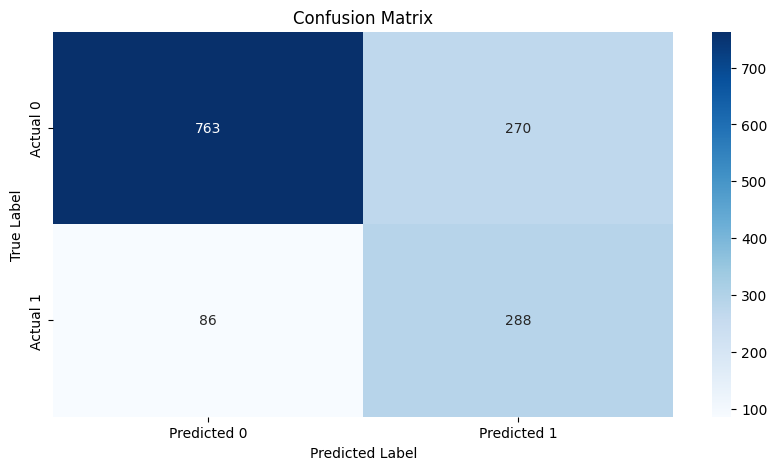

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fit model awal (belum tuning) ke data train
pipe_model.fit(x_train, y_train)

# Prediksi dengan model awal (belum tuning)
y_pred_test_before = pipe_model.predict(x_test)

# Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_before = confusion_matrix(y_test, y_pred_test_before)

# Visualisasi
plt.figure(figsize=(10, 5))
sns.heatmap(cm_before, annot=True, fmt=".0f", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [133]:
# score before tuning
print('Recall test:', recall_score(y_test, y_pred_test_before))

Recall test: 0.7700534759358288


**2) After tuning**

In [134]:
from sklearn.metrics import recall_score

# Gunakan predict() untuk Recall (bukan predict_proba)
y_pred_train = model_tuned.predict(x_train)
y_pred_test = model_tuned.predict(x_test)

print('Train Recall setelah tuning:', recall_score(y_train, y_pred_train))
print('Test Recall setelah tuning:', recall_score(y_test, y_pred_test))

Train Recall setelah tuning: 0.8822742474916387
Test Recall setelah tuning: 0.8983957219251337


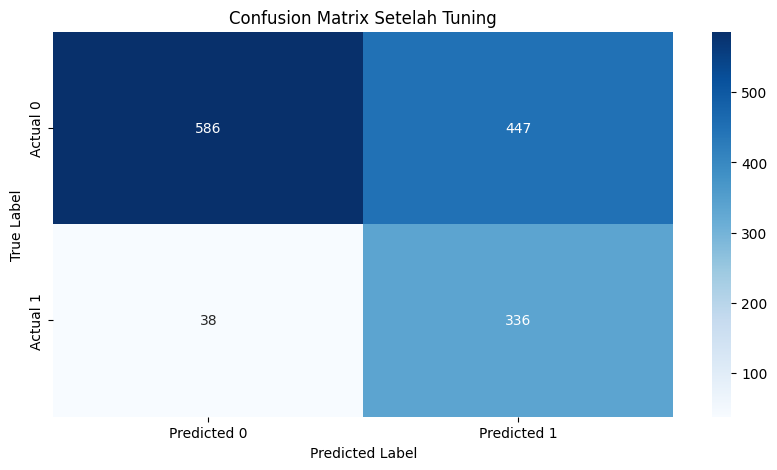

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
Y_pred_test = model_tuned.predict(x_test)
cm = confusion_matrix(y_test, Y_pred_test)

# Visualisasi
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Setelah Tuning')
plt.show()

In [136]:
# score after tuning
print('Recall:', recall_score(y_test, Y_pred_test))

Recall: 0.8983957219251337


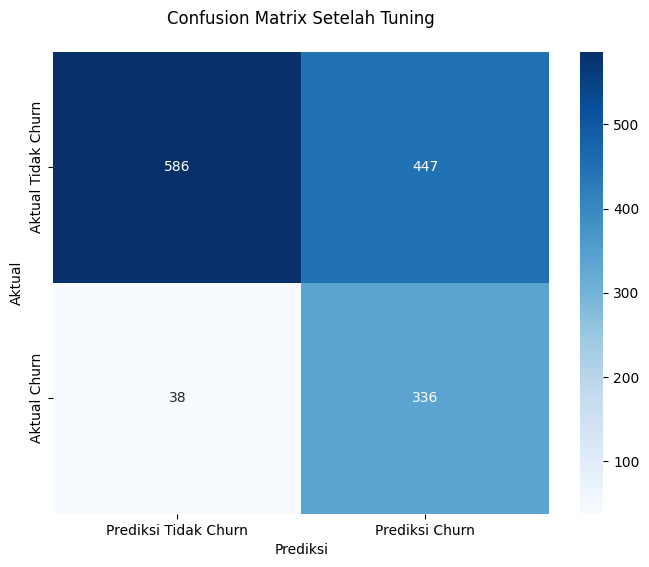


Classification Report Setelah Tuning:
              precision    recall  f1-score   support

 Tidak Churn     0.9391    0.5673    0.7073      1033
       Churn     0.4291    0.8984    0.5808       374

    accuracy                         0.6553      1407
   macro avg     0.6841    0.7328    0.6441      1407
weighted avg     0.8035    0.6553    0.6737      1407


Detail Recall:
- Recall Tidak Churn : 56.73%
- Recall Churn      : 89.84%

False Negatives: 38/374 (10.16% churn nyata terlewat)


In [137]:
from sklearn.metrics import confusion_matrix, classification_report, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Prediksi kelas
Y_pred_test = model_tuned.predict(x_test)

# 2. Confusion Matrix
cm = confusion_matrix(y_test, Y_pred_test)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Prediksi Tidak Churn', 'Prediksi Churn'],
            yticklabels=['Aktual Tidak Churn', 'Aktual Churn'])
plt.title('Confusion Matrix Setelah Tuning', pad=20)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# 3. Classification Report dengan highlight
print("\n\u001b[1mClassification Report Setelah Tuning:\u001b[0m")
print(classification_report(y_test, Y_pred_test, target_names=['Tidak Churn', 'Churn'], digits=4))

# 4. Recall dengan penekanan khusus pada Churn
print("\n\u001b[1;36mDetail Recall:\u001b[0m")
print(f"- Recall Tidak Churn : {recall_score(y_test, Y_pred_test, pos_label=0):.2%}")
print(f"- Recall Churn      : \u001b[1;32m{recall_score(y_test, Y_pred_test, pos_label=1):.2%}\u001b[0m")

# 5. Analisis False Negatives (Kasus Churn yang Terlewat)
fn = cm[1][0]
total_churn = cm[1].sum()
print(f"\n\u001b[1;31mFalse Negatives:\u001b[0m {fn}/{total_churn} ({fn/total_churn:.2%} churn nyata terlewat)")

In [138]:
from sklearn.metrics import classification_report

# 1. Prediksi kelas (default threshold 0.5)
Y_pred_test = model_tuned.predict(x_test)  # atau (Y_proba_test > 0.5).astype(int)

# 2. Tampilkan classification report
print("Classification Report Setelah Tuning:")
print(classification_report(y_test, Y_pred_test, target_names=['Tidak Churn', 'Churn']))

# Recall per kelas
print(f"Recall Tidak Churn (Kelas 0): {recall_score(y_test, Y_pred_test, pos_label=0):.4f}")
print(f"Recall Churn (Kelas 1): {recall_score(y_test, Y_pred_test, pos_label=1):.4f}")

Classification Report Setelah Tuning:
              precision    recall  f1-score   support

 Tidak Churn       0.94      0.57      0.71      1033
       Churn       0.43      0.90      0.58       374

    accuracy                           0.66      1407
   macro avg       0.68      0.73      0.64      1407
weighted avg       0.80      0.66      0.67      1407

Recall Tidak Churn (Kelas 0): 0.5673
Recall Churn (Kelas 1): 0.8984


#### **Perbandingan Performa Sebelum vs Sesudah Tuning**

| Metrik               | Sebelum Tuning | Sesudah Tuning | Perubahan       | Keterangan                     |
|----------------------|----------------|----------------|-----------------|--------------------------------|
| **Recall**           | 0.7700         | 0.8983         | ↑ +12%          | Kenaikan cukup signifikan      |

**Perbandingan Parameter Baseline vs Best Parameter dari Logistic Regression**

| Parameter      | Baseline (`default`) | Setelah Tuning (`best`)       | Perbedaan Kunci                         |
| -------------- | -------------------- | ----------------------------- | --------------------------------------- |
| `penalty`      | `'l2'`               | `'l1'`                        | Beralih ke regularisasi L1 (sparse)     |
| `C`            | `1.0`                | `0.001`                       | Regularisasi jauh lebih kuat            |
| `solver`       | `'lbfgs'`            | `'saga'`                      | `'saga'` mendukung `'l1'` penalty       |
| `max_iter`     | `100`                | `100`                         | Tidak berubah                           |

**Kesimpulan**
1. Kenaikan Performa Signifikan
- ↑ +12% peningkatan recall (dari 77% → 89%)
- Artinya model sekarang mampu menangkap 12% lebih banyak kasus churn yang sebelumnya terlewatkan.

**Implikasi Bisnis**
- Dengan recall 89.83%, hanya 10.17% pelanggan churn yang tidak terdeteksi (false negatives)

Lebih efektif untuk:
- Pencegahan churn proaktif
- Program retensi pelanggan
- Alokasi sumber daya lebih efisien

> Berdasarkan hasil evaluasi, tuning yang dilakukan terhadap model Logistic Regression menghasilkan **peningkatan performa yang cukup signifikan**, terutama pada metrik recall yang naik dari 0.77 menjadi 0.89 (kenaikan sekitar 12%). Berikut penjelasannya :

Informasi dari confusion matrix pada test set :
- Jumlah customer yang aktualnya churn dan diprediksi akan melakukan churn **(True Positive)** : 336 orang
- Jumlah customer yang aktualnya churn tetapi diprediksi tidak akan melakukan churn **(False Negative)** : 38 orang
- Jumlah customer yang aktualnya tidak churn dan diprediksi tidak akan churn **(True Negative)** : 586 orang
- Jumlah customer yang aktualnya tidak churn tetapi diprediksi akan churn **(False Positive)** : 447 orang
- Jumlah customer yang diprediksi akan churn sebanyak 336 + 447 = 783 orang
- Jumlah customer yang diprediksi tidak akan churn sebanyak 38 + 586 = 624 orang

Berdasarkan hasil evaluasi :
- Recall : Dari total customer yang aslinya churn, 90% yang berhasil diprediksi dengan benar.

> Dengan demikian, model yang akan digunakan adalah yang sesudah dituning, yaitu logistic regression yang telah dilakukan scaling dan Hybrid (SMOTETomek).

### Feature Coefficients
Mari sekarang kita lihat fitur/kolom apa saja yang paling penting untuk model Logistic Regression

In [139]:
# Definisikan logreg dengan parameter yg dipilih
best_logreg = LogisticRegression(C = 0.1, max_iter = 100, penalty = 'l1', solver = 'saga', random_state = 2025)

In [140]:
# Model dengan Pipeline 
pipe_model = Pipeline([
    ('preprocess', transformer),
    # ('select', FeatureSelector(selected_features=important_features)),
    ('scaler', RobustScaler()),
    ('smote_tomek', SMOTETomek(random_state=2025)),
    ('clf', best_logreg)
])

pipe_model.fit(x_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\compose\_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaymentMethod',
                                                   'SeniorCitizen', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'PaperlessBilling']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['Contract'])])),
                ('scaler', RobustScaler()),
                ('smote_tomek', SMOTETomek(random_state=2025)),
                ('clf',
                 LogisticRegression(C=0.1, penalty='l1', random_state=2025,
                                    solver='saga'))])

In [141]:
pipe_model.named_steps['clf'].coef_

array([[ 0.19802469,  0.84420761, -0.82143179, -0.59476129, -0.11872438,
        -0.09227764, -0.33137535,  0.33154763,  0.27015283, -0.0919717 ,
         0.33387713,  0.        ,  0.11086086,  0.        , -0.06394555,
        -0.2143914 , -0.35103537,  0.44589165, -0.69083992, -2.36205183,
         0.        ,  0.64671288]])

In [142]:
import pandas as pd

# Ambil nama fitur hasil transformasi
feature_names = pipe_model.named_steps['preprocess'].get_feature_names_out()

# Ambil koefisien
coefs = pipe_model.named_steps['clf'].coef_.flatten()

# Buat DataFrame untuk analisis
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefs
})

# Tampilkan fitur dengan koefisien tidak nol
nonzero = coef_df[coef_df['coefficient'] != 0].sort_values(by='coefficient', ascending=False)
print(nonzero)

                                          feature  coefficient
1             onehot__InternetService_Fiber optic     0.844208
21                        remainder__TotalCharges     0.646713
17                   onehot__PaperlessBilling_Yes     0.445892
10         onehot__PaymentMethod_Electronic check     0.333877
7                         onehot__StreamingTV_Yes     0.331548
8                     onehot__StreamingMovies_Yes     0.270153
0                       onehot__MultipleLines_Yes     0.198025
12                      onehot__SeniorCitizen_Yes     0.110861
14                            onehot__Partner_Yes    -0.063946
9   onehot__PaymentMethod_Credit card (automatic)    -0.091972
5                    onehot__DeviceProtection_Yes    -0.092278
4                        onehot__OnlineBackup_Yes    -0.118724
15                         onehot__Dependents_Yes    -0.214391
6                         onehot__TechSupport_Yes    -0.331375
16                       onehot__PhoneService_Yes    -0

**Konsep Dasar Odds Ratio (OR)**

Odds Ratio mengukur seberapa besar pengaruh suatu faktor terhadap kemungkinan terjadinya churn. 

Rumus: OR = e^{coefficient}
- e ≈ 2.71828 (bilangan Euler)
- coefficient = koefisien dari model regresi logistik

Interpretasi:
- OR Value	Pengaruh terhadap Churn
- OR > 1	Meningkatkan kemungkinan churn
- OR < 1	Menurunkan kemungkinan churn
- OR = 1	Tidak berpengaruh

Persentase Pengaruh:
Rumus = (OR - 1) × 100%

Contoh:
- OR = 2.3 → (2.3 - 1) × 100% = +130% (meningkat)
- OR = 0.5 → (0.5 - 1) × 100% = -50% (menurun)

**Diagram Alur Interpretasi**

<img src="DiagramAlurInterpretasi.png" width="400">

1. Mulai dari koefisien model
2. Hitung OR menggunakan rumus eksponensial
3. Tentukan apakah faktor termasuk:
    - Penyebab churn (OR>1)
    - Pencegah churn (OR<1)

**Analisis Odds Ratio Churn Pelanggan**


| No | Fitur | Coefficient | OR | Persentase Pengaruh | Interpretasi |
|----|-------|------------|----|---------------------|--------------|
| 1 | InternetService_Fiber optic | 0.844 | 2.33 | +133% | Paling meningkatkan churn |
| 2 | InternetService_No | -0.821 | 0.44 | -56% | Protektif kuat |
| 3 | TotalCharges | 0.647 | 1.91 | +91% | Semakin besar tagihan semakin berisiko |
| 4 | PaperlessBilling_Yes | 0.446 | 1.56 | +56% | Signifikan meningkatkan risiko |
| 5 | Payment_Electronic check | 0.334 | 1.40 | +40% | Pembayaran elektronik berisiko |
| 6 | StreamingTV_Yes | 0.332 | 1.39 | +39% | Sedikit meningkatkan risiko |
| 7 | StreamingMovies_Yes | 0.270 | 1.31 | +31% | Pengaruh moderat |
| 8 | MultipleLines_Yes | 0.198 | 1.22 | +22% | Pengaruh kecil |
| 9 | SeniorCitizen_Yes | 0.111 | 1.12 | +12% | Minor meningkatkan risiko |
| 10 | Partner_Yes | -0.064 | 0.94 | -6% | Protektif sangat lemah |
| 11 | Payment_CreditCard | -0.092 | 0.91 | -9% | Sedikit protektif |
| 12 | DeviceProtection_Yes | -0.092 | 0.91 | -9% | Sedikit protektif |
| 13 | OnlineBackup_Yes | -0.119 | 0.89 | -11% | Protektif moderat |
| 14 | Dependents_Yes | -0.214 | 0.81 | -19% | Cukup protektif |
| 15 | TechSupport_Yes | -0.331 | 0.72 | -28% | Protektif signifikan |
| 16 | PhoneService_Yes | -0.351 | 0.70 | -30% | Protektif kuat |
| 17 | OnlineSecurity_Yes | -0.595 | 0.55 | -45% | Sangat protektif |
| 18 | Contract | -0.691 | 0.50 | -50% | Faktor protektif terkuat kedua |
| 19 | Tenure | -2.362 | 0.09 | -91% | Paling protektif |

C:\Users\User\AppData\Local\Temp\ipykernel_15288\1818701014.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_coef, y='feature', x='coefficient', palette='coolwarm')


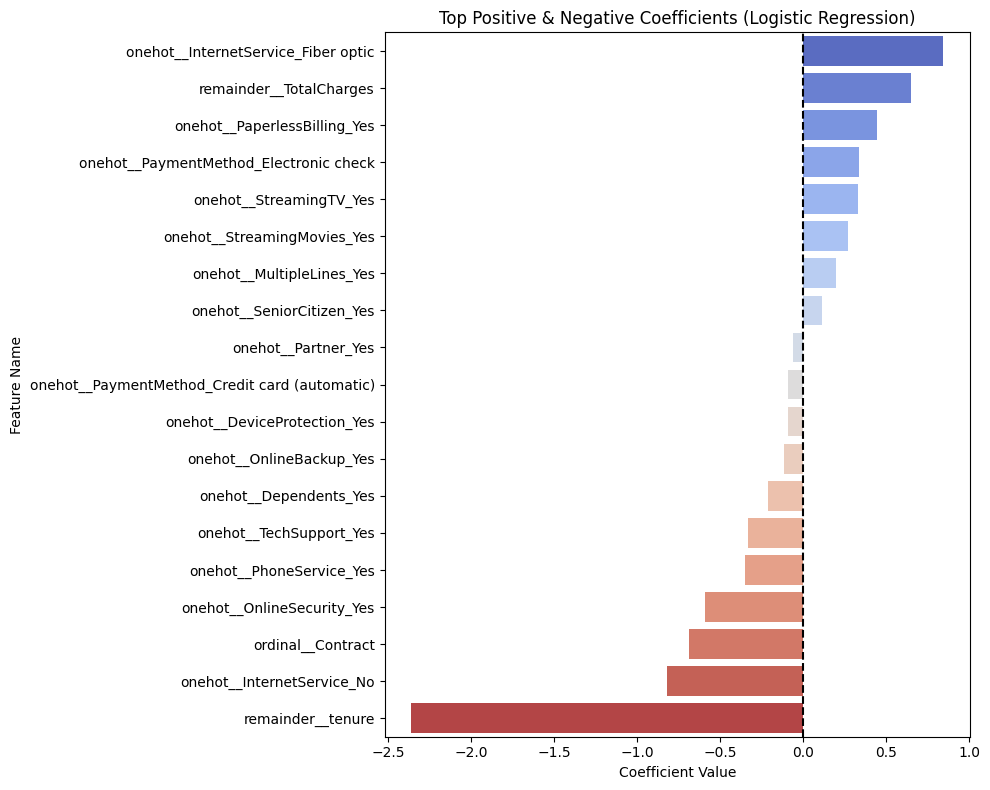

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter koefisien non-zero dan urutkan
nonzero_coef = coef_df[coef_df['coefficient'] != 0].sort_values('coefficient', ascending=False)

# Ambil top 20 fitur terbesar dan terkecil
top_coef = pd.concat([nonzero_coef.head(10), nonzero_coef.tail(10)])

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=top_coef, y='feature', x='coefficient', palette='coolwarm')
plt.title('Top Positive & Negative Coefficients (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.axvline(0, color='k', linestyle='--')
plt.tight_layout()
plt.show()

## **VII. Conclusion**

**Kesimpulan Faktor Penentu Keputusan Churn Pelanggan**

Berdasarkan analisis Odds Ratio, berikut faktor-faktor kritis yang mempengaruhi keputusan churn:

**Faktor Risiko Tinggi (Penyebab Churn)**
1. **Layanan Fiber Optic**  
   - OR 2.33 (+133%)  
   - *Pelanggan fiber 2.3x lebih mungkin churn dibanding DSL*

2. **Total Tagihan Besar**  
   - OR 1.91 (+91%)  
   - *Tagihan tinggi berkorelasi dengan risiko churn*

3. **Paperless Billing**  
   - OR 1.56 (+56%)  
   - *Sistem tagihan digital meningkatkan kemungkinan churn*

4. **Pembayaran Elektronik**  
   - OR 1.40 (+40%)  
   - *Metode pembayaran elektronik lebih berisiko*

 **Faktor Protektif (Penahan Churn)**
1. **Lama Berlangganan (Tenure)**  
   - OR 0.09 (-91%)  
   - *Setiap tahun tambahan turunkan risiko churn 91%*

2. **Kontrak Jangka Panjang**  
   - OR 0.50 (-50%)  
   - *Kontrak 2-tahun turunkan risiko 50%*

3. **Online Security**  
   - OR 0.55 (-45%)  
   - *Layanan keamanan digital mengurangi churn*

4. **Tech Support**  
   - OR 0.72 (-28%)  
   - *Dukungan teknis efektif pertahankan pelanggan*

**Temuan Menarik**
- **Paradoks Tagihan**: Total charge tinggi justru meningkatkan churn (mungkin karena harga dirasa tidak worth it)
- **Faktor Demografi**: Senior citizen lebih rentan churn (+12%)
- **Layanan Tambahan**:  
  - Streaming (TV/Film) meningkatkan risiko  
  - Fitur keamanan (backup, device protection) bersifat protektif


## **VIII. Recommendation**

**Recomendation Bisnis**
- Perusahaan bisa **memepertahankan pelanggan** dengan cara:
  - Mendorong pelanggan untuk memilih **kontrak jangka panjang**
  - Mengkaji ulang pendekatan terhadap pelanggan yang menggunakan metode pembayaran **‘Electronic Check’**
  - Memberikan perhatian khusus pada pelanggan yang **tidak menggunakan layanan internet atau fitur tambahannya**
  - **Tingkatkan retensi pengguna fiber optic** dengan program loyalitas (e.g., bonus bandwidth).  
  - **Optimalkan pengalaman pembayaran elektronik** (e.g., notifikasi otomatis, diskon untuk autodebet).  
  - **Bundle layanan** seperti TechSupport + OnlineSecurity untuk mengurangi churn. 
  - **Program onboarding** khusus pelanggan baru (<6 bulan) untuk meningkatkan engagement.  
  - Evaluasi kualitas layanan fiber optic
  - Tinjau struktur harga untuk pelanggan dengan tagihan besar

**Recomendation untuk pengembangan model**
- Mencoba algorithm ML yang lain dan juga mencoba hyperparameter tuning kembali, coba gunakan teknik oversampling yang berbeda juga selain SMOTE, seperti SMOTENC, ADASYN, Cluster-Based, dsb 
- Menambahkan kolom-kolom baru yang berhubungan dengan perilaku pelanggan secara lebih mendetail, seperti:
  - Pola Pembayaran: Keterlambatan, metode, frekuensi.
  - Penggunaan Layanan: Trend pemakaian, komplain.
  - Interaksi: Riwayat hubungi CS, klik halaman berhenti berlangganan.
- Mencoba metric evaluasi lain seperti F1 Score atau F2 Score untuk melihat keseimbangan antara kelas positif dan negatif

**Limitasi Model**
- TotalCharges tidak akurat sepenuhnya, karena hasil kalkulasi manual tidak sesuai — kemungkinan ada biaya tambahan yang tidak tersedia di dataset.
- Informasi perilaku pelanggan masih terbatas, seperti riwayat komplain, keterlambatan pembayaran, atau alasan berhenti.
- Model bersifat statis, belum mempertimbangkan perubahan perilaku pelanggan dari waktu ke waktu.
- Kemungkinan relasi non-linear tidak ditangkap dengan baik karena model utama yang digunakan adalah Logistic Regression. Artinya: Model Logistic Regression hanya mampu menangkap hubungan linear antara fitur dan target (churn/tidak churn).
Jika ada pola hubungan non-linear (misalnya, efek gabungan atau pengaruh tidak langsung antar fitur), maka Logistic Regression mungkin tidak bisa mengenalinya dengan baik, sehingga akurasi model bisa menurun.
- Ketidakseimbangan data tetap bisa memengaruhi performa meskipun sudah dilakukan penanganan.

## **IX. Business Implementation**

Implementasi rekomendasi bisnis secara komprehensif untuk mempertahankan pelanggan dan mengurangi dampak biaya akuisisi:

##### **Strategi Bisnis**

**1. Kontrak & Retensi Jangka Panjang**  
- **Strategi:**  
  - Mendorong pelanggan beralih dari *kontrak bulanan* (month-to-month) ke *kontrak jangka panjang* (1/2 tahun) dengan:
    - Berikan **diskon 10-15%** untuk pelanggan yang memilih kontrak 1 atau 2 tahun vs bulanan
  - **"Loyalty Tier"**: Hadiah tambahan (free upgrade speed) untuk pelanggan yang renew kontrak  
  - **Early Renewal Incentive**: Bonus bulan gratis jika perpanjang kontrak 3 bulan sebelum berakhir  

**2. Mitigasi Risiko Pembayaran Elektronik**  
- **Problem:** Metode ini OR +40% (tinggi)  
- **Solusi:**  
  - **Auto-debet discount**: Berikan cashback 5% untuk migrasi ke credit card/bank transfer  
  - **Payment Reminder**: SMS/WhatsApp 3 hari sebelum jatuh tempo untuk electronic check  
  - **"On-Time Payment Reward"**: Poin loyalitas untuk yang bayar tepat waktu  

**3. Strategi Fiber Optic**  
- **Problem:** OR tertinggi (+133%)  
- **Action Plan:**  
  - **Quality Assurance**: Audit rutin kecepatan jaringan fiber vs promosi  
  - **Value-Added Service**: Bundling gratis Netflix/Spotify 3 bulan untuk pengguna fiber  
  - **Exit Interview**: Survei khusus pelanggan fiber yang churn untuk identifikasi akar masalah  

**4. Program Tenure Booster**  
- **Fokus:** Pelanggan baru (tenure <6 bulan)  
- **Strategi:**  
  - **Onboarding Specialist**: Tim khusus pendampingan 3 bulan pertama  
  - **"First Year Challenge"**: Hadiah cashback jika bertahan 12 bulan  
  - **Usage Alert**: Notifikasi jika ada penurunan penggunaan (early warning churn)  

**5. Bundling Protektif**  
- **Paket "Anti-Churn"**:  
  - Tech Support + Online Security diskon 30%  
  - Tambah Device Protection gratis 3 bulan 

##### **Analisis Dampak Finansial: Model Prediksi Churn vs. Tanpa Intervensi**  
*Estimasi Penghematan hingga 88% dengan Machine Learning*

**Asumsi Dasar**  
| Metric | Nilai |  
|--------|-------|  
| Total pelanggan (data test) | 1.407 |  
| Pendapatan per pelanggan/bulan | \$64.76 |  
| Biaya akuisisi pelanggan baru | \$140 |  
| Biaya retensi per pelanggan | \$7 |  


- **Skenario 1: Tanpa Model Prediksi**  
**Churn Rate:** 27% (≈380 pelanggan)  

| Konsekuensi | Perhitungan | Total |  
|-------------|-------------|-------|  
| Kehilangan pendapatan tahunan | 380 × \$64.76 × 12 | **\$295,305** |  
| Biaya akuisisi pengganti | 380 × \$140 | **\$53,200** |  
| **Total kerugian tahunan** | | **\$348,505** |  

- **Skenario 2: Dengan Model Prediksi**  
    **Hasil Klasifikasi Model:**  
    - **False Negative (FN):** 38 pelanggan churn (tidak terdeteksi)  
    - **False Positive (FP):** 447 pelanggan loyal (terdeteksi salah)  

| Biaya | Perhitungan | Total |  
|-------|-------------|-------|  
| Kehilangan pendapatan (FN) | 38 × \$64.76 × 12 | **\$29,530** |  
| Biaya akuisisi (FN) | 38 × \$140 | **\$5,320** |  
| Biaya retensi (TP + FP) | (336 + 447) × \$7 | **\$5,481** |  
| **Total biaya dengan model** | | **\$40,331** |  

**Dampak Finansial**

Dengan menggunakan model prediksi churn, perusahaan dapat:

* **Menghemat hingga \$308.174 per tahun (88%)**
* **Mengurangi jumlah pelanggan yang churn** secara signifikan:
  dari 380 menjadi hanya 38 pelanggan
* **Meningkatkan efisiensi biaya retensi**, dengan hanya 783 pelanggan yang menerima promosi (dibandingkan seluruh basis pelanggan)

Walaupun masih terdapat **447 pelanggan loyal** yang salah diklasifikasikan dan menimbulkan **pemborosan biaya retensi sebesar \$3.129**, angka ini jauh lebih kecil dibandingkan kerugian dalam skenario tanpa model.

> **Kesimpulan:** Model prediksi churn ini terbukti sebagai alat yang **efektif dan strategis** untuk membantu mengurangi potensi biaya akuisisi yang tinggi. Selain itu, model ini dapat dimanfaatkan sebagai rekomendasi berbasis data yang memberikan arah yang lebih tepat bagi pengambilan keputusan perusahaan.


**Saving model**

In [144]:
# !pip install joblib


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [145]:
# import joblib

# # Simpan model pipeline hasil tuning
# joblib.dump(model_tuned, 'LogisticRegressionModel.pkl')

['LogisticRegressionModel.pkl']

In [146]:
# import pickle

# # Simpan model pipeline hasil tuning
# with open('LogisticRegressionModel.pkl', 'wb') as f:
#     pickle.dump(model_tuned, f)